# *+ Processing with CHM & RN & biomass data +*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
biomass_data = '/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/Main_CHM_spectral_Site2020.csv'
df = pd.read_csv(biomass_data)
df.head()

Site #    WGS84 N   WGS 84 E Origin  Origin_ID Dominant_specias  Species_ID  \
0      1  51.435741  30.107979      n          0            Birch           2   
1      2  51.434093  30.108523      a          1             Pine           0   
2      3  51.434163  30.109196      a          1             Pine           0   
3      4  51.434217  30.110484      a          1             Pine           0   
4      5  51.434056  30.111980      a          1             Pine           0   

   Cs_wood_Bq/kg  ln_Cs_wood  Sr_wood_Bq/kg  ...  idm_g_Q25 idm_g_Q50  \
0            920       6.824          10300  ...   0.042167  0.050549   
1           3600       8.189          15100  ...   0.040919  0.048889   
2           4360       8.380          14600  ...   0.042397  0.050463   
3           3420       8.137          12700  ...   0.043719  0.052974   
4           2200       7.696          12100  ...   0.040659  0.049303   

   idm_g_Q75  idm_b_MIN  idm_b_MAX  idm_b_MEAN  idm_b_STD  idm_b_Q25  \
0   0.062270   0.017730   0.408966    0.059749   0.030217   0.043539   
1   0.060698   0.020078   0.258602    0.057223   0.025515   0.043035   
2   0.060603   0.020761   0.156265    0.056571   0.016629   0.045142   
3   0.066027   0.017239   0.327465    0.060880   0.023964   0.046111   
4   0.061803   0.014276   0.274420    0.057902   0.024283   0.043045   

   idm_b_Q50  idm_b_Q75  
0   0.052312   0.064544  
1   0.050941   0.062608  
2   0.053495   0.064635  
3   0.055601   0.069182  
4   0.051566   0.065078  

[5 rows x 159 columns]

# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood',
'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth',
'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2',
'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
'%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 
'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 
'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 
'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 
'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 
'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 
'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 
'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 
'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 
'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 
'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 
'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 
'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 
'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 
'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 
'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 
'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
                                    '%_cover', 'mf_chm_MEAN', 'mf_chm_MAX', 'g_MAX', 'contr_g_MAX'])
            


# Show the first five columns
select.head()

ln_Gs_cub_m  ln_M_stem_kg_m2  ln_M_stem_bark_kg_m2  ln_M_crown_kg_m2  \
0       4.8122           1.7630               -0.3147           -0.1590   
1       5.7589           2.4570               -0.2485            0.3429   
2       5.8464           2.5153               -0.1054            0.5493   
3       5.7526           2.6304               -0.0834            0.3900   
4       5.9480           2.6748                0.0000            0.5715   

   ln_M_foliage_kg_m2  ln_M_AG_kg_m2  %_cover  mf_chm_MEAN  mf_chm_MAX  g_MAX  \
0             -2.4418         1.9125     0.85    12.233545   19.097736    243   
1             -0.1997         2.6319     1.00    14.964220   17.704655    248   
2             -0.2144         2.7020     1.00    15.329449   17.559893    240   
3             -0.3510         2.7763     0.97    15.392742   20.676994    244   
4             -0.3711         2.8314     1.00    17.944009   21.851387    243   

   contr_g_MAX  
0  2961.898193  
1  2218.239746  
2  2220.297119  
3  3033.770752  
4  3003.818848

# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ln_Gs_cub_m           103 non-null    float64
 1   ln_M_stem_kg_m2       103 non-null    float64
 2   ln_M_stem_bark_kg_m2  103 non-null    float64
 3   ln_M_crown_kg_m2      103 non-null    float64
 4   ln_M_foliage_kg_m2    103 non-null    float64
 5   ln_M_AG_kg_m2         103 non-null    float64
 6   %_cover               103 non-null    float64
 7   mf_chm_MEAN           103 non-null    float64
 8   mf_chm_MAX            103 non-null    float64
 9   g_MAX                 103 non-null    int64  
 10  contr_g_MAX           103 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 9.0 KB


In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_specias"])["M_crown_kg_m2", "M_foliage_kg_m2"].describe()

/tmp/ipykernel_134150/4127234604.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Dominant_specias"])["M_crown_kg_m2", "M_foliage_kg_m2"].describe()


M_crown_kg_m2                                             \
                         count      mean       std    min      25%    50%   
Dominant_specias                                                            
Alder                      4.0  1.059000  0.593217  0.476  0.68825  0.958   
Aspen                      1.0  1.173000       NaN  1.173  1.17300  1.173   
Birch                     23.0  1.039609  0.409105  0.303  0.77850  1.049   
Oak                        3.0  2.085000  1.209736  1.344  1.38700  1.430   
Pine                      71.0  1.272141  0.638357  0.211  0.82000  1.381   
Spruce                     1.0  4.105000       NaN  4.105  4.10500  4.105   

                                 M_foliage_kg_m2                             \
                      75%    max           count      mean       std    min   
Dominant_specias                                                              
Alder             1.32875  1.844             4.0  0.312000  0.145801  0.130   
Aspen             1.17300  1.173             1.0  0.168000       NaN  0.168   
Birch             1.29450  1.816            23.0  0.189304  0.080503  0.054   
Oak               2.45550  3.481             3.0  0.294333  0.078621  0.205   
Pine              1.67050  2.735            71.0  0.569746  0.267121  0.059   
Spruce            4.10500  4.105             1.0  1.043000       NaN  1.043   

                                                   
                      25%     50%      75%    max  
Dominant_specias                                   
Alder             0.26875  0.3155  0.35875  0.487  
Aspen             0.16800  0.1680  0.16800  0.168  
Birch             0.12500  0.1850  0.25450  0.399  
Oak               0.26500  0.3250  0.33900  0.353  
Pine              0.41950  0.6390  0.74550  1.121  
Spruce            1.04300  1.0430  1.04300  1.043

In [6]:
# Descriptive statistics of main parameters
select.describe()

ln_Gs_cub_m  ln_M_stem_kg_m2  ln_M_stem_bark_kg_m2  ln_M_crown_kg_m2  \
count   103.000000       103.000000            103.000000         103.00000   
mean      4.969534         1.827923             -0.239481           0.05436   
std       1.323782         1.325853              0.893398           0.66008   
min       0.693100        -2.995700             -3.912000          -1.55590   
25%       4.672800         1.588100             -0.335500          -0.20955   
50%       5.337500         2.286500             -0.040800           0.24450   
75%       5.908100         2.730800              0.190600           0.49195   
max       6.508800         3.220500              1.654400           1.41220   

       ln_M_foliage_kg_m2  ln_M_AG_kg_m2     %_cover  mf_chm_MEAN  mf_chm_MAX  \
count          103.000000     103.000000  103.000000   103.000000  103.000000   
mean            -1.021247       2.095454    0.808738    13.045021   17.907784   
std              0.803748       1.079203    0.276653     6.609366    7.523377   
min             -2.918800      -0.798500    0.090000     1.293138    2.733019   
25%             -1.629700       1.801400    0.745000     8.206727   11.615798   
50%             -0.719500       2.458700    0.960000    13.072916   18.269344   
75%             -0.358800       2.862800    1.000000    17.432255   22.751595   
max              0.114200       3.366600    1.000000    28.916548   36.355442   

            g_MAX  contr_g_MAX  
count  103.000000   103.000000  
mean   240.572816  3008.938899  
std      9.358442   876.023529  
min    194.000000   815.342712  
25%    236.500000  2464.687256  
50%    243.000000  2994.793701  
75%    247.000000  3464.970947  
max    253.000000  6230.940918

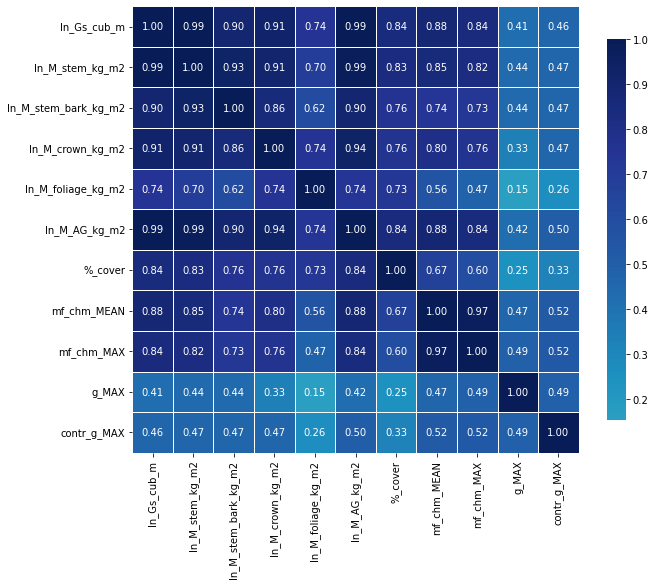

In [7]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [8]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['%_cover', 'mf_chm_MEAN', 'mf_chm_MAX', 'g_MAX', 'contr_g_MAX'])
y = pd.DataFrame(select, columns= ['ln_M_foliage_kg_m2'])

In [9]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): No


Selected "No"!!! A new column with random values was not created.


In [10]:
# Columns in "X" data collections
X.head()

%_cover  mf_chm_MEAN  mf_chm_MAX  g_MAX  contr_g_MAX
0     0.85    12.233545   19.097736    243  2961.898193
1     1.00    14.964220   17.704655    248  2218.239746
2     1.00    15.329449   17.559893    240  2220.297119
3     0.97    15.392742   20.676994    244  3033.770752
4     1.00    17.944009   21.851387    243  3003.818848

In [11]:
# Columns in "y" data collections
y.head()

ln_M_foliage_kg_m2
0             -2.4418
1             -0.1997
2             -0.2144
3             -0.3510
4             -0.3711

# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.1875870155688948, 0.4751893952507644, 0.23359211198595975]
    Mean: 0.299
    Std: 0.126

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.78012753 0.65236496 0.68685055]
    Mean: 0.706
    Std: 0.054

 --------------------
Mean absolute error (MAE): 

    Scores: [0.5041027575878587, 0.4647692907186116, 0.5911452765696188]
    Mean: 0.520
    Std: 0.053

 --------------------


# Find optimal hyperparameters for XGBoost model

In [16]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [17]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=3000, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
Model with rank: 1
Mean validation score: 0.433 (std: 0.133)
Parameters: {'colsample_bytree': 0.6164078606364067, 'gamma': 0.46457263110215186, 'learning_rate': 0.026157819305236585, 'max_depth': 4, 'n_estimators': 151, 'subsample': 0.458494354105843}



In [18]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.59528966, 0.19520125, 0.47870846, ..., 0.346492  , 0.36388288,
       0.32884688]), 'std_fit_time': array([0.35147488, 0.04124906, 0.01337526, ..., 0.01829928, 0.02920578,
       0.00514235]), 'mean_score_time': array([0.00800924, 0.00657277, 0.00607419, ..., 0.00660477, 0.00663056,
       0.00667357]), 'std_score_time': array([3.61438492e-03, 9.79027097e-04, 7.98169001e-05, ...,
       3.89869712e-05, 3.30650039e-05, 8.73074383e-05]), 'param_colsample_bytree': masked_array(data=[0.42676288293839354, 0.4681873450747208,
                   0.33361755428832435, ..., 0.7178550756098159,
                   0.7439544862570652, 0.05737781288399858],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.08943053848224025, 0.011274712564443956,
                   0.32006230984363165, ..., 0.18329105480341984,
                   0.3281600244137463, 0.186322541553182],
  

In [19]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.6164078606364067
Gamma: 0.46457263110215186
Learning_rate: 0.026157819305236585
Max_depth: 4
N_estimators: 151
Subsample: 0.458494354105843


# Estimation of a basic XGBoost model using Loops

In [20]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [21]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:1.69334	validation_1-rmse:1.64139
[1]	validation_0-rmse:1.65705	validation_1-rmse:1.60933


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.62257	validation_1-rmse:1.57486
[3]	validation_0-rmse:1.58843	validation_1-rmse:1.54014
[4]	validation_0-rmse:1.55781	validation_1-rmse:1.50793
[5]	validation_0-rmse:1.52679	validation_1-rmse:1.47620
[6]	validation_0-rmse:1.49527	validation_1-rmse:1.44550
[7]	validation_0-rmse:1.46012	validation_1-rmse:1.41127
[8]	validation_0-rmse:1.43134	validation_1-rmse:1.38326
[9]	validation_0-rmse:1.40492	validation_1-rmse:1.35539
[10]	validation_0-rmse:1.37659	validation_1-rmse:1.32957
[11]	validation_0-rmse:1.34888	validation_1-rmse:1.30117
[12]	validation_0-rmse:1.32278	validation_1-rmse:1.27707
[13]	validation_0-rmse:1.29275	validation_1-rmse:1.24739
[14]	validation_0-rmse:1.26927	validation_1-rmse:1.22435
[15]	validation_0-rmse:1.24423	validation_1-rmse:1.20037
[16]	validation_0-rmse:1.21823	validation_1-rmse:1.17487
[17]	validation_0-rmse:1.19205	validation_1-rmse:1.14814
[18]	validation_0-rmse:1.17059	validation_1-rmse:1.12773
[19]	validation_0-rmse:1.14793	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.52886	validation_1-rmse:1.59926
[5]	validation_0-rmse:1.50216	validation_1-rmse:1.57629
[6]	validation_0-rmse:1.47139	validation_1-rmse:1.54190
[7]	validation_0-rmse:1.43895	validation_1-rmse:1.50999
[8]	validation_0-rmse:1.40812	validation_1-rmse:1.48355
[9]	validation_0-rmse:1.38063	validation_1-rmse:1.45869
[10]	validation_0-rmse:1.35448	validation_1-rmse:1.43290
[11]	validation_0-rmse:1.32767	validation_1-rmse:1.40454
[12]	validation_0-rmse:1.30045	validation_1-rmse:1.38120
[13]	validation_0-rmse:1.27433	validation_1-rmse:1.35664
[14]	validation_0-rmse:1.24602	validation_1-rmse:1.32572
[15]	validation_0-rmse:1.21994	validation_1-rmse:1.29820
[16]	validation_0-rmse:1.19736	validation_1-rmse:1.27148
[17]	validation_0-rmse:1.17528	validation_1-rmse:1.24871
[18]	validation_0-rmse:1.15040	validation_1-rmse:1.22386
[19]	validation_0-rmse:1.12808	validation_1-rmse:1.20027
[20]	validation_0-rmse:1.10911	validation_1-rmse:1.18694
[21]	validation_0-rmse:1.08751	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.62995	validation_1-rmse:1.35913
[4]	validation_0-rmse:1.59420	validation_1-rmse:1.32998
[5]	validation_0-rmse:1.55946	validation_1-rmse:1.30079
[6]	validation_0-rmse:1.52598	validation_1-rmse:1.26946
[7]	validation_0-rmse:1.49102	validation_1-rmse:1.24183
[8]	validation_0-rmse:1.45936	validation_1-rmse:1.21161
[9]	validation_0-rmse:1.43130	validation_1-rmse:1.19005
[10]	validation_0-rmse:1.40024	validation_1-rmse:1.16356
[11]	validation_0-rmse:1.37252	validation_1-rmse:1.13983
[12]	validation_0-rmse:1.34722	validation_1-rmse:1.11855
[13]	validation_0-rmse:1.32020	validation_1-rmse:1.09839
[14]	validation_0-rmse:1.29257	validation_1-rmse:1.07321
[15]	validation_0-rmse:1.26961	validation_1-rmse:1.04996
[16]	validation_0-rmse:1.24720	validation_1-rmse:1.03140
[17]	validation_0-rmse:1.22234	validation_1-rmse:1.01390
[18]	validation_0-rmse:1.19617	validation_1-rmse:0.98942
[19]	validation_0-rmse:1.17228	validation_1-rmse:0.97240
[20]	validation_0-rmse:1.15014	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.15860	validation_1-rmse:1.20757
[18]	validation_0-rmse:1.13776	validation_1-rmse:1.18835
[19]	validation_0-rmse:1.11516	validation_1-rmse:1.16772
[20]	validation_0-rmse:1.09528	validation_1-rmse:1.15042
[21]	validation_0-rmse:1.07387	validation_1-rmse:1.13175
[22]	validation_0-rmse:1.05160	validation_1-rmse:1.11140
[23]	validation_0-rmse:1.03053	validation_1-rmse:1.08995
[24]	validation_0-rmse:1.01153	validation_1-rmse:1.07220
[25]	validation_0-rmse:0.99241	validation_1-rmse:1.05379
[26]	validation_0-rmse:0.97374	validation_1-rmse:1.03863
[27]	validation_0-rmse:0.95796	validation_1-rmse:1.02484
[28]	validation_0-rmse:0.93889	validation_1-rmse:1.00707
[29]	validation_0-rmse:0.92542	validation_1-rmse:0.99499
[30]	validation_0-rmse:0.90925	validation_1-rmse:0.98036
[31]	validation_0-rmse:0.89397	validation_1-rmse:0.96754
[32]	validation_0-rmse:0.87796	validation_1-rmse:0.95510
[33]	validation_0-rmse:0.86146	validation_1-rmse:0.94665
[34]	validation_0-rmse:0.84804	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.55949	validation_1-rmse:1.44470
[5]	validation_0-rmse:1.52531	validation_1-rmse:1.41262
[6]	validation_0-rmse:1.49422	validation_1-rmse:1.38132
[7]	validation_0-rmse:1.46031	validation_1-rmse:1.34878
[8]	validation_0-rmse:1.43350	validation_1-rmse:1.32139
[9]	validation_0-rmse:1.40622	validation_1-rmse:1.29541
[10]	validation_0-rmse:1.37890	validation_1-rmse:1.27007
[11]	validation_0-rmse:1.35227	validation_1-rmse:1.24406
[12]	validation_0-rmse:1.32278	validation_1-rmse:1.21507
[13]	validation_0-rmse:1.29647	validation_1-rmse:1.19269
[14]	validation_0-rmse:1.26957	validation_1-rmse:1.16789
[15]	validation_0-rmse:1.24569	validation_1-rmse:1.14459
[16]	validation_0-rmse:1.22208	validation_1-rmse:1.12210
[17]	validation_0-rmse:1.19727	validation_1-rmse:1.10143
[18]	validation_0-rmse:1.17161	validation_1-rmse:1.07671
[19]	validation_0-rmse:1.14982	validation_1-rmse:1.05520
[20]	validation_0-rmse:1.13091	validation_1-rmse:1.03848
[21]	validation_0-rmse:1.10750	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.21593	validation_1-rmse:1.31011
[16]	validation_0-rmse:1.19060	validation_1-rmse:1.28777
[17]	validation_0-rmse:1.17197	validation_1-rmse:1.26758
[18]	validation_0-rmse:1.14473	validation_1-rmse:1.24130
[19]	validation_0-rmse:1.12292	validation_1-rmse:1.22148
[20]	validation_0-rmse:1.10014	validation_1-rmse:1.19838
[21]	validation_0-rmse:1.08189	validation_1-rmse:1.17925
[22]	validation_0-rmse:1.06188	validation_1-rmse:1.15824
[23]	validation_0-rmse:1.04254	validation_1-rmse:1.13999
[24]	validation_0-rmse:1.02624	validation_1-rmse:1.12403
[25]	validation_0-rmse:1.00903	validation_1-rmse:1.10704
[26]	validation_0-rmse:0.99159	validation_1-rmse:1.09003
[27]	validation_0-rmse:0.97042	validation_1-rmse:1.06831
[28]	validation_0-rmse:0.95278	validation_1-rmse:1.04918
[29]	validation_0-rmse:0.93698	validation_1-rmse:1.03573
[30]	validation_0-rmse:0.92128	validation_1-rmse:1.02021
[31]	validation_0-rmse:0.90449	validation_1-rmse:1.00267
[32]	validation_0-rmse:0.88723	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.17082	validation_1-rmse:1.63172
[15]	validation_0-rmse:1.14888	validation_1-rmse:1.60571
[16]	validation_0-rmse:1.12684	validation_1-rmse:1.58172
[17]	validation_0-rmse:1.10661	validation_1-rmse:1.56024
[18]	validation_0-rmse:1.08609	validation_1-rmse:1.53746
[19]	validation_0-rmse:1.06332	validation_1-rmse:1.51114
[20]	validation_0-rmse:1.04208	validation_1-rmse:1.48504
[21]	validation_0-rmse:1.02156	validation_1-rmse:1.46006
[22]	validation_0-rmse:1.00067	validation_1-rmse:1.43904
[23]	validation_0-rmse:0.98304	validation_1-rmse:1.42008
[24]	validation_0-rmse:0.96273	validation_1-rmse:1.39761
[25]	validation_0-rmse:0.94623	validation_1-rmse:1.38142
[26]	validation_0-rmse:0.93101	validation_1-rmse:1.36768
[27]	validation_0-rmse:0.91607	validation_1-rmse:1.35065
[28]	validation_0-rmse:0.89920	validation_1-rmse:1.33458
[29]	validation_0-rmse:0.88397	validation_1-rmse:1.32160
[30]	validation_0-rmse:0.87112	validation_1-rmse:1.30590
[31]	validation_0-rmse:0.85606	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.21188	validation_1-rmse:1.17157
[17]	validation_0-rmse:1.18839	validation_1-rmse:1.14943
[18]	validation_0-rmse:1.16985	validation_1-rmse:1.13046
[19]	validation_0-rmse:1.14785	validation_1-rmse:1.10725
[20]	validation_0-rmse:1.12635	validation_1-rmse:1.08555
[21]	validation_0-rmse:1.10488	validation_1-rmse:1.06518
[22]	validation_0-rmse:1.08024	validation_1-rmse:1.04050
[23]	validation_0-rmse:1.06069	validation_1-rmse:1.02131
[24]	validation_0-rmse:1.03921	validation_1-rmse:1.00198
[25]	validation_0-rmse:1.02200	validation_1-rmse:0.98411
[26]	validation_0-rmse:1.00500	validation_1-rmse:0.96931
[27]	validation_0-rmse:0.98848	validation_1-rmse:0.95470
[28]	validation_0-rmse:0.97075	validation_1-rmse:0.93766
[29]	validation_0-rmse:0.95443	validation_1-rmse:0.91901
[30]	validation_0-rmse:0.93734	validation_1-rmse:0.90511
[31]	validation_0-rmse:0.91944	validation_1-rmse:0.88757
[32]	validation_0-rmse:0.90248	validation_1-rmse:0.87073
[33]	validation_0-rmse:0.88624	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.32685	validation_1-rmse:1.24103
[13]	validation_0-rmse:1.29935	validation_1-rmse:1.21786
[14]	validation_0-rmse:1.27261	validation_1-rmse:1.19337
[15]	validation_0-rmse:1.24806	validation_1-rmse:1.17115
[16]	validation_0-rmse:1.22336	validation_1-rmse:1.14448
[17]	validation_0-rmse:1.19996	validation_1-rmse:1.12642
[18]	validation_0-rmse:1.17814	validation_1-rmse:1.10356
[19]	validation_0-rmse:1.15583	validation_1-rmse:1.08341
[20]	validation_0-rmse:1.13673	validation_1-rmse:1.06743
[21]	validation_0-rmse:1.11776	validation_1-rmse:1.04974
[22]	validation_0-rmse:1.09951	validation_1-rmse:1.03368
[23]	validation_0-rmse:1.07873	validation_1-rmse:1.01311
[24]	validation_0-rmse:1.05752	validation_1-rmse:0.99367
[25]	validation_0-rmse:1.03953	validation_1-rmse:0.97704
[26]	validation_0-rmse:1.02219	validation_1-rmse:0.96428
[27]	validation_0-rmse:1.00569	validation_1-rmse:0.95194
[28]	validation_0-rmse:0.98805	validation_1-rmse:0.93600
[29]	validation_0-rmse:0.97207	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.35079	validation_1-rmse:1.29837
[12]	validation_0-rmse:1.32531	validation_1-rmse:1.27366
[13]	validation_0-rmse:1.29911	validation_1-rmse:1.24899
[14]	validation_0-rmse:1.27128	validation_1-rmse:1.22140
[15]	validation_0-rmse:1.24829	validation_1-rmse:1.19576
[16]	validation_0-rmse:1.22473	validation_1-rmse:1.17153
[17]	validation_0-rmse:1.20082	validation_1-rmse:1.14606
[18]	validation_0-rmse:1.18007	validation_1-rmse:1.12765
[19]	validation_0-rmse:1.15680	validation_1-rmse:1.10381
[20]	validation_0-rmse:1.13390	validation_1-rmse:1.08237
[21]	validation_0-rmse:1.11306	validation_1-rmse:1.06300
[22]	validation_0-rmse:1.08983	validation_1-rmse:1.03700
[23]	validation_0-rmse:1.06987	validation_1-rmse:1.01981
[24]	validation_0-rmse:1.04716	validation_1-rmse:1.00092
[25]	validation_0-rmse:1.03001	validation_1-rmse:0.98059
[26]	validation_0-rmse:1.01096	validation_1-rmse:0.95867
[27]	validation_0-rmse:0.99295	validation_1-rmse:0.93688
[28]	validation_0-rmse:0.97249	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.16326	validation_1-rmse:1.23109
[19]	validation_0-rmse:1.14064	validation_1-rmse:1.21271
[20]	validation_0-rmse:1.11809	validation_1-rmse:1.19386
[21]	validation_0-rmse:1.09447	validation_1-rmse:1.17409
[22]	validation_0-rmse:1.07549	validation_1-rmse:1.15662
[23]	validation_0-rmse:1.05495	validation_1-rmse:1.13815
[24]	validation_0-rmse:1.03280	validation_1-rmse:1.11798
[25]	validation_0-rmse:1.01282	validation_1-rmse:1.10111
[26]	validation_0-rmse:0.99240	validation_1-rmse:1.08920
[27]	validation_0-rmse:0.97735	validation_1-rmse:1.07600
[28]	validation_0-rmse:0.96061	validation_1-rmse:1.05977
[29]	validation_0-rmse:0.94565	validation_1-rmse:1.04537
[30]	validation_0-rmse:0.92816	validation_1-rmse:1.03017
[31]	validation_0-rmse:0.91417	validation_1-rmse:1.01738
[32]	validation_0-rmse:0.89760	validation_1-rmse:1.00811
[33]	validation_0-rmse:0.88333	validation_1-rmse:0.99857
[34]	validation_0-rmse:0.86930	validation_1-rmse:0.98710
[35]	validation_0-rmse:0.85460	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.35465	validation_1-rmse:1.70818
[9]	validation_0-rmse:1.32632	validation_1-rmse:1.68004
[10]	validation_0-rmse:1.30319	validation_1-rmse:1.65598
[11]	validation_0-rmse:1.27700	validation_1-rmse:1.62766
[12]	validation_0-rmse:1.25030	validation_1-rmse:1.60208
[13]	validation_0-rmse:1.22854	validation_1-rmse:1.57937
[14]	validation_0-rmse:1.20246	validation_1-rmse:1.55235
[15]	validation_0-rmse:1.18318	validation_1-rmse:1.53223
[16]	validation_0-rmse:1.16057	validation_1-rmse:1.51037
[17]	validation_0-rmse:1.13638	validation_1-rmse:1.48864
[18]	validation_0-rmse:1.11549	validation_1-rmse:1.46769
[19]	validation_0-rmse:1.09444	validation_1-rmse:1.44606
[20]	validation_0-rmse:1.07375	validation_1-rmse:1.41943
[21]	validation_0-rmse:1.05363	validation_1-rmse:1.39689
[22]	validation_0-rmse:1.03046	validation_1-rmse:1.37308
[23]	validation_0-rmse:1.01103	validation_1-rmse:1.35121
[24]	validation_0-rmse:0.99337	validation_1-rmse:1.33464
[25]	validation_0-rmse:0.97736	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.18130	validation_1-rmse:0.99366
[19]	validation_0-rmse:1.15737	validation_1-rmse:0.97291
[20]	validation_0-rmse:1.13443	validation_1-rmse:0.95477
[21]	validation_0-rmse:1.11378	validation_1-rmse:0.93920
[22]	validation_0-rmse:1.09136	validation_1-rmse:0.92432
[23]	validation_0-rmse:1.07225	validation_1-rmse:0.90921
[24]	validation_0-rmse:1.05358	validation_1-rmse:0.89525
[25]	validation_0-rmse:1.03578	validation_1-rmse:0.88299
[26]	validation_0-rmse:1.01953	validation_1-rmse:0.86797
[27]	validation_0-rmse:1.00396	validation_1-rmse:0.85638
[28]	validation_0-rmse:0.98379	validation_1-rmse:0.84014
[29]	validation_0-rmse:0.96469	validation_1-rmse:0.82630
[30]	validation_0-rmse:0.94707	validation_1-rmse:0.81594
[31]	validation_0-rmse:0.93167	validation_1-rmse:0.80149
[32]	validation_0-rmse:0.91612	validation_1-rmse:0.78989
[33]	validation_0-rmse:0.89905	validation_1-rmse:0.77875
[34]	validation_0-rmse:0.88292	validation_1-rmse:0.76957
[35]	validation_0-rmse:0.86591	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.18078	validation_1-rmse:1.12290
[19]	validation_0-rmse:1.15644	validation_1-rmse:1.10398
[20]	validation_0-rmse:1.13649	validation_1-rmse:1.08452
[21]	validation_0-rmse:1.11283	validation_1-rmse:1.06193
[22]	validation_0-rmse:1.08881	validation_1-rmse:1.04182
[23]	validation_0-rmse:1.06957	validation_1-rmse:1.02302
[24]	validation_0-rmse:1.05401	validation_1-rmse:1.00911
[25]	validation_0-rmse:1.03631	validation_1-rmse:0.99370
[26]	validation_0-rmse:1.01796	validation_1-rmse:0.97821
[27]	validation_0-rmse:1.00663	validation_1-rmse:0.96990
[28]	validation_0-rmse:0.98887	validation_1-rmse:0.95714
[29]	validation_0-rmse:0.96994	validation_1-rmse:0.93837
[30]	validation_0-rmse:0.95326	validation_1-rmse:0.92224
[31]	validation_0-rmse:0.93877	validation_1-rmse:0.90837
[32]	validation_0-rmse:0.91998	validation_1-rmse:0.89141
[33]	validation_0-rmse:0.90413	validation_1-rmse:0.87740
[34]	validation_0-rmse:0.89081	validation_1-rmse:0.86874
[35]	validation_0-rmse:0.87323	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.09357	validation_1-rmse:1.11059
[22]	validation_0-rmse:1.07267	validation_1-rmse:1.08724
[23]	validation_0-rmse:1.05170	validation_1-rmse:1.06487
[24]	validation_0-rmse:1.03272	validation_1-rmse:1.04482
[25]	validation_0-rmse:1.01408	validation_1-rmse:1.02840
[26]	validation_0-rmse:0.99811	validation_1-rmse:1.01539
[27]	validation_0-rmse:0.98213	validation_1-rmse:1.00443
[28]	validation_0-rmse:0.96422	validation_1-rmse:0.98778
[29]	validation_0-rmse:0.94535	validation_1-rmse:0.96952
[30]	validation_0-rmse:0.92784	validation_1-rmse:0.95148
[31]	validation_0-rmse:0.91418	validation_1-rmse:0.93791
[32]	validation_0-rmse:0.89871	validation_1-rmse:0.92478
[33]	validation_0-rmse:0.88543	validation_1-rmse:0.91331
[34]	validation_0-rmse:0.86862	validation_1-rmse:0.89747
[35]	validation_0-rmse:0.85653	validation_1-rmse:0.88800
[36]	validation_0-rmse:0.84260	validation_1-rmse:0.87531
[37]	validation_0-rmse:0.82742	validation_1-rmse:0.86133
[38]	validation_0-rmse:0.81415	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.20815	validation_1-rmse:1.11948
[18]	validation_0-rmse:1.18573	validation_1-rmse:1.10143
[19]	validation_0-rmse:1.16149	validation_1-rmse:1.08360
[20]	validation_0-rmse:1.14131	validation_1-rmse:1.07117
[21]	validation_0-rmse:1.11964	validation_1-rmse:1.05404
[22]	validation_0-rmse:1.09586	validation_1-rmse:1.03932
[23]	validation_0-rmse:1.07367	validation_1-rmse:1.02236
[24]	validation_0-rmse:1.05241	validation_1-rmse:1.00700
[25]	validation_0-rmse:1.03369	validation_1-rmse:0.99055
[26]	validation_0-rmse:1.01060	validation_1-rmse:0.97220
[27]	validation_0-rmse:0.99534	validation_1-rmse:0.96157
[28]	validation_0-rmse:0.97924	validation_1-rmse:0.95174
[29]	validation_0-rmse:0.96098	validation_1-rmse:0.93523
[30]	validation_0-rmse:0.94662	validation_1-rmse:0.92234
[31]	validation_0-rmse:0.93120	validation_1-rmse:0.91050
[32]	validation_0-rmse:0.91413	validation_1-rmse:0.89798
[33]	validation_0-rmse:0.89867	validation_1-rmse:0.88537
[34]	validation_0-rmse:0.88466	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.26887	validation_1-rmse:1.55297
[13]	validation_0-rmse:1.24414	validation_1-rmse:1.52680
[14]	validation_0-rmse:1.22015	validation_1-rmse:1.50290
[15]	validation_0-rmse:1.19544	validation_1-rmse:1.47657
[16]	validation_0-rmse:1.17298	validation_1-rmse:1.45258
[17]	validation_0-rmse:1.15172	validation_1-rmse:1.43033
[18]	validation_0-rmse:1.12961	validation_1-rmse:1.40718
[19]	validation_0-rmse:1.10743	validation_1-rmse:1.38166
[20]	validation_0-rmse:1.08627	validation_1-rmse:1.36196
[21]	validation_0-rmse:1.06500	validation_1-rmse:1.33915
[22]	validation_0-rmse:1.04841	validation_1-rmse:1.32187
[23]	validation_0-rmse:1.03176	validation_1-rmse:1.30190
[24]	validation_0-rmse:1.00970	validation_1-rmse:1.28020
[25]	validation_0-rmse:0.99174	validation_1-rmse:1.26102
[26]	validation_0-rmse:0.97146	validation_1-rmse:1.23984
[27]	validation_0-rmse:0.95184	validation_1-rmse:1.21992
[28]	validation_0-rmse:0.93538	validation_1-rmse:1.20365
[29]	validation_0-rmse:0.92020	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.09178	validation_1-rmse:1.29833
[21]	validation_0-rmse:1.07065	validation_1-rmse:1.27541
[22]	validation_0-rmse:1.05054	validation_1-rmse:1.25248
[23]	validation_0-rmse:1.02773	validation_1-rmse:1.22968
[24]	validation_0-rmse:1.00677	validation_1-rmse:1.20637
[25]	validation_0-rmse:0.98912	validation_1-rmse:1.18827
[26]	validation_0-rmse:0.97205	validation_1-rmse:1.16830
[27]	validation_0-rmse:0.95403	validation_1-rmse:1.14738
[28]	validation_0-rmse:0.93587	validation_1-rmse:1.12661
[29]	validation_0-rmse:0.91997	validation_1-rmse:1.11486
[30]	validation_0-rmse:0.90576	validation_1-rmse:1.09909
[31]	validation_0-rmse:0.88960	validation_1-rmse:1.08528
[32]	validation_0-rmse:0.87468	validation_1-rmse:1.06923
[33]	validation_0-rmse:0.86255	validation_1-rmse:1.05613
[34]	validation_0-rmse:0.84784	validation_1-rmse:1.04134
[35]	validation_0-rmse:0.83303	validation_1-rmse:1.02578
[36]	validation_0-rmse:0.81581	validation_1-rmse:1.00885
[37]	validation_0-rmse:0.80348	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.09901	validation_1-rmse:1.26211
[21]	validation_0-rmse:1.07556	validation_1-rmse:1.23541
[22]	validation_0-rmse:1.05697	validation_1-rmse:1.21364
[23]	validation_0-rmse:1.03855	validation_1-rmse:1.19094
[24]	validation_0-rmse:1.01909	validation_1-rmse:1.17113
[25]	validation_0-rmse:1.00140	validation_1-rmse:1.15042
[26]	validation_0-rmse:0.98147	validation_1-rmse:1.13004
[27]	validation_0-rmse:0.96381	validation_1-rmse:1.10992
[28]	validation_0-rmse:0.94750	validation_1-rmse:1.09445
[29]	validation_0-rmse:0.93155	validation_1-rmse:1.07763
[30]	validation_0-rmse:0.91916	validation_1-rmse:1.06620
[31]	validation_0-rmse:0.90400	validation_1-rmse:1.05451
[32]	validation_0-rmse:0.88772	validation_1-rmse:1.03950
[33]	validation_0-rmse:0.87461	validation_1-rmse:1.02794
[34]	validation_0-rmse:0.86245	validation_1-rmse:1.01529
[35]	validation_0-rmse:0.84667	validation_1-rmse:1.00133
[36]	validation_0-rmse:0.83381	validation_1-rmse:0.99070
[37]	validation_0-rmse:0.82011	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.12453	validation_1-rmse:1.04653
[21]	validation_0-rmse:1.10289	validation_1-rmse:1.02607
[22]	validation_0-rmse:1.08237	validation_1-rmse:1.00626
[23]	validation_0-rmse:1.06181	validation_1-rmse:0.98822
[24]	validation_0-rmse:1.04343	validation_1-rmse:0.97085
[25]	validation_0-rmse:1.02369	validation_1-rmse:0.95395
[26]	validation_0-rmse:1.01243	validation_1-rmse:0.94092
[27]	validation_0-rmse:0.99533	validation_1-rmse:0.92682
[28]	validation_0-rmse:0.97887	validation_1-rmse:0.91234
[29]	validation_0-rmse:0.96168	validation_1-rmse:0.89809
[30]	validation_0-rmse:0.94954	validation_1-rmse:0.89066
[31]	validation_0-rmse:0.93282	validation_1-rmse:0.87850
[32]	validation_0-rmse:0.92143	validation_1-rmse:0.86667
[33]	validation_0-rmse:0.90342	validation_1-rmse:0.85342
[34]	validation_0-rmse:0.88788	validation_1-rmse:0.83992
[35]	validation_0-rmse:0.87294	validation_1-rmse:0.82746
[36]	validation_0-rmse:0.85885	validation_1-rmse:0.81482
[37]	validation_0-rmse:0.84500	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.33226	validation_1-rmse:1.41154
[12]	validation_0-rmse:1.30717	validation_1-rmse:1.38862
[13]	validation_0-rmse:1.28393	validation_1-rmse:1.36580
[14]	validation_0-rmse:1.25580	validation_1-rmse:1.33837
[15]	validation_0-rmse:1.23321	validation_1-rmse:1.31560
[16]	validation_0-rmse:1.20998	validation_1-rmse:1.29523
[17]	validation_0-rmse:1.18694	validation_1-rmse:1.27471
[18]	validation_0-rmse:1.16209	validation_1-rmse:1.25279
[19]	validation_0-rmse:1.13825	validation_1-rmse:1.23204
[20]	validation_0-rmse:1.11890	validation_1-rmse:1.21355
[21]	validation_0-rmse:1.09967	validation_1-rmse:1.19500
[22]	validation_0-rmse:1.08051	validation_1-rmse:1.17519
[23]	validation_0-rmse:1.05881	validation_1-rmse:1.15786
[24]	validation_0-rmse:1.03998	validation_1-rmse:1.13982
[25]	validation_0-rmse:1.02188	validation_1-rmse:1.12332
[26]	validation_0-rmse:1.00481	validation_1-rmse:1.10877
[27]	validation_0-rmse:0.98798	validation_1-rmse:1.09554
[28]	validation_0-rmse:0.97056	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.14780	validation_1-rmse:1.04257
[21]	validation_0-rmse:1.12582	validation_1-rmse:1.03017
[22]	validation_0-rmse:1.10355	validation_1-rmse:1.01841
[23]	validation_0-rmse:1.08240	validation_1-rmse:0.99859
[24]	validation_0-rmse:1.06150	validation_1-rmse:0.98681
[25]	validation_0-rmse:1.04156	validation_1-rmse:0.97117
[26]	validation_0-rmse:1.01928	validation_1-rmse:0.95069
[27]	validation_0-rmse:1.00544	validation_1-rmse:0.93731
[28]	validation_0-rmse:0.98563	validation_1-rmse:0.92145
[29]	validation_0-rmse:0.96837	validation_1-rmse:0.90383
[30]	validation_0-rmse:0.95396	validation_1-rmse:0.88987
[31]	validation_0-rmse:0.93581	validation_1-rmse:0.87273
[32]	validation_0-rmse:0.92013	validation_1-rmse:0.85961
[33]	validation_0-rmse:0.90283	validation_1-rmse:0.85006
[34]	validation_0-rmse:0.88824	validation_1-rmse:0.84381
[35]	validation_0-rmse:0.87335	validation_1-rmse:0.83991
[36]	validation_0-rmse:0.85762	validation_1-rmse:0.82397
[37]	validation_0-rmse:0.84240	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.58144	validation_1-rmse:1.71734
[3]	validation_0-rmse:1.55127	validation_1-rmse:1.68599
[4]	validation_0-rmse:1.51945	validation_1-rmse:1.65107
[5]	validation_0-rmse:1.48749	validation_1-rmse:1.61850
[6]	validation_0-rmse:1.45457	validation_1-rmse:1.58187
[7]	validation_0-rmse:1.42973	validation_1-rmse:1.55489
[8]	validation_0-rmse:1.40147	validation_1-rmse:1.52366
[9]	validation_0-rmse:1.37767	validation_1-rmse:1.49826
[10]	validation_0-rmse:1.35122	validation_1-rmse:1.46966
[11]	validation_0-rmse:1.32602	validation_1-rmse:1.44026
[12]	validation_0-rmse:1.29993	validation_1-rmse:1.41358
[13]	validation_0-rmse:1.27827	validation_1-rmse:1.39704
[14]	validation_0-rmse:1.25467	validation_1-rmse:1.37192
[15]	validation_0-rmse:1.22851	validation_1-rmse:1.34339
[16]	validation_0-rmse:1.20089	validation_1-rmse:1.31757
[17]	validation_0-rmse:1.17716	validation_1-rmse:1.29013
[18]	validation_0-rmse:1.15690	validation_1-rmse:1.26774
[19]	validation_0-rmse:1.13463	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.12553	validation_1-rmse:1.29453
[20]	validation_0-rmse:1.10226	validation_1-rmse:1.27304
[21]	validation_0-rmse:1.08225	validation_1-rmse:1.25151
[22]	validation_0-rmse:1.05884	validation_1-rmse:1.22833
[23]	validation_0-rmse:1.03737	validation_1-rmse:1.20553
[24]	validation_0-rmse:1.01632	validation_1-rmse:1.18334
[25]	validation_0-rmse:0.99978	validation_1-rmse:1.16765
[26]	validation_0-rmse:0.98284	validation_1-rmse:1.14948
[27]	validation_0-rmse:0.96613	validation_1-rmse:1.13211
[28]	validation_0-rmse:0.95164	validation_1-rmse:1.11488
[29]	validation_0-rmse:0.93485	validation_1-rmse:1.09798
[30]	validation_0-rmse:0.91886	validation_1-rmse:1.08278
[31]	validation_0-rmse:0.90429	validation_1-rmse:1.06910
[32]	validation_0-rmse:0.88737	validation_1-rmse:1.05205
[33]	validation_0-rmse:0.87048	validation_1-rmse:1.03892
[34]	validation_0-rmse:0.85641	validation_1-rmse:1.02451
[35]	validation_0-rmse:0.84385	validation_1-rmse:1.01218
[36]	validation_0-rmse:0.83140	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.26159	validation_1-rmse:1.17596
[16]	validation_0-rmse:1.23787	validation_1-rmse:1.15071
[17]	validation_0-rmse:1.21706	validation_1-rmse:1.12932
[18]	validation_0-rmse:1.19515	validation_1-rmse:1.10555
[19]	validation_0-rmse:1.17145	validation_1-rmse:1.08084
[20]	validation_0-rmse:1.14869	validation_1-rmse:1.06060
[21]	validation_0-rmse:1.12313	validation_1-rmse:1.03328
[22]	validation_0-rmse:1.10151	validation_1-rmse:1.01037
[23]	validation_0-rmse:1.08106	validation_1-rmse:0.98821
[24]	validation_0-rmse:1.06051	validation_1-rmse:0.96668
[25]	validation_0-rmse:1.04231	validation_1-rmse:0.94713
[26]	validation_0-rmse:1.02822	validation_1-rmse:0.93364
[27]	validation_0-rmse:1.01263	validation_1-rmse:0.91778
[28]	validation_0-rmse:0.99416	validation_1-rmse:0.89995
[29]	validation_0-rmse:0.97777	validation_1-rmse:0.88601
[30]	validation_0-rmse:0.96048	validation_1-rmse:0.86963
[31]	validation_0-rmse:0.94356	validation_1-rmse:0.85521
[32]	validation_0-rmse:0.93509	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.14785	validation_1-rmse:1.22058
[19]	validation_0-rmse:1.12557	validation_1-rmse:1.19620
[20]	validation_0-rmse:1.10497	validation_1-rmse:1.17527
[21]	validation_0-rmse:1.08261	validation_1-rmse:1.14977
[22]	validation_0-rmse:1.06216	validation_1-rmse:1.12738
[23]	validation_0-rmse:1.04508	validation_1-rmse:1.11119
[24]	validation_0-rmse:1.02480	validation_1-rmse:1.08795
[25]	validation_0-rmse:1.00600	validation_1-rmse:1.06914
[26]	validation_0-rmse:0.99051	validation_1-rmse:1.05313
[27]	validation_0-rmse:0.97530	validation_1-rmse:1.03603
[28]	validation_0-rmse:0.95992	validation_1-rmse:1.02085
[29]	validation_0-rmse:0.94509	validation_1-rmse:1.00418
[30]	validation_0-rmse:0.93288	validation_1-rmse:0.99013
[31]	validation_0-rmse:0.91956	validation_1-rmse:0.97487
[32]	validation_0-rmse:0.90748	validation_1-rmse:0.96239
[33]	validation_0-rmse:0.89247	validation_1-rmse:0.94832
[34]	validation_0-rmse:0.87750	validation_1-rmse:0.93261
[35]	validation_0-rmse:0.86269	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.15193	validation_1-rmse:1.15187
[20]	validation_0-rmse:1.12864	validation_1-rmse:1.13036
[21]	validation_0-rmse:1.10666	validation_1-rmse:1.11329
[22]	validation_0-rmse:1.08821	validation_1-rmse:1.09681
[23]	validation_0-rmse:1.06430	validation_1-rmse:1.07639
[24]	validation_0-rmse:1.04422	validation_1-rmse:1.06062
[25]	validation_0-rmse:1.02825	validation_1-rmse:1.04590
[26]	validation_0-rmse:1.01072	validation_1-rmse:1.03457
[27]	validation_0-rmse:0.99751	validation_1-rmse:1.02151
[28]	validation_0-rmse:0.97830	validation_1-rmse:1.00934
[29]	validation_0-rmse:0.96116	validation_1-rmse:0.99453
[30]	validation_0-rmse:0.94743	validation_1-rmse:0.98322
[31]	validation_0-rmse:0.92981	validation_1-rmse:0.96705
[32]	validation_0-rmse:0.91329	validation_1-rmse:0.95458
[33]	validation_0-rmse:0.89687	validation_1-rmse:0.94052
[34]	validation_0-rmse:0.88204	validation_1-rmse:0.92728
[35]	validation_0-rmse:0.86358	validation_1-rmse:0.91050
[36]	validation_0-rmse:0.84930	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.13607	validation_1-rmse:1.02470
[21]	validation_0-rmse:1.11145	validation_1-rmse:1.01135
[22]	validation_0-rmse:1.08799	validation_1-rmse:0.99955
[23]	validation_0-rmse:1.06685	validation_1-rmse:0.98550
[24]	validation_0-rmse:1.04352	validation_1-rmse:0.97114
[25]	validation_0-rmse:1.02367	validation_1-rmse:0.95643
[26]	validation_0-rmse:1.00565	validation_1-rmse:0.94104
[27]	validation_0-rmse:0.98707	validation_1-rmse:0.92498
[28]	validation_0-rmse:0.96796	validation_1-rmse:0.91360
[29]	validation_0-rmse:0.94739	validation_1-rmse:0.90456
[30]	validation_0-rmse:0.93056	validation_1-rmse:0.89491
[31]	validation_0-rmse:0.91368	validation_1-rmse:0.88448
[32]	validation_0-rmse:0.89829	validation_1-rmse:0.87627
[33]	validation_0-rmse:0.88674	validation_1-rmse:0.86789
[34]	validation_0-rmse:0.87051	validation_1-rmse:0.85949
[35]	validation_0-rmse:0.85494	validation_1-rmse:0.85424
[36]	validation_0-rmse:0.83911	validation_1-rmse:0.84678
[37]	validation_0-rmse:0.82763	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.09237	validation_1-rmse:1.30701
[21]	validation_0-rmse:1.07140	validation_1-rmse:1.28294
[22]	validation_0-rmse:1.04933	validation_1-rmse:1.26011
[23]	validation_0-rmse:1.03066	validation_1-rmse:1.23569
[24]	validation_0-rmse:1.01311	validation_1-rmse:1.21471
[25]	validation_0-rmse:0.99959	validation_1-rmse:1.19752
[26]	validation_0-rmse:0.98744	validation_1-rmse:1.18394
[27]	validation_0-rmse:0.97325	validation_1-rmse:1.16452
[28]	validation_0-rmse:0.95707	validation_1-rmse:1.14856
[29]	validation_0-rmse:0.94190	validation_1-rmse:1.13108
[30]	validation_0-rmse:0.92613	validation_1-rmse:1.11431
[31]	validation_0-rmse:0.91220	validation_1-rmse:1.09885
[32]	validation_0-rmse:0.89939	validation_1-rmse:1.08515
[33]	validation_0-rmse:0.88656	validation_1-rmse:1.06884
[34]	validation_0-rmse:0.87276	validation_1-rmse:1.05421
[35]	validation_0-rmse:0.85776	validation_1-rmse:1.03318
[36]	validation_0-rmse:0.84325	validation_1-rmse:1.01566
[37]	validation_0-rmse:0.82931	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.45302	validation_1-rmse:1.27087
[9]	validation_0-rmse:1.42368	validation_1-rmse:1.24278
[10]	validation_0-rmse:1.39346	validation_1-rmse:1.21317
[11]	validation_0-rmse:1.36726	validation_1-rmse:1.18940
[12]	validation_0-rmse:1.33914	validation_1-rmse:1.16240
[13]	validation_0-rmse:1.31131	validation_1-rmse:1.13613
[14]	validation_0-rmse:1.28630	validation_1-rmse:1.11297
[15]	validation_0-rmse:1.26054	validation_1-rmse:1.08892
[16]	validation_0-rmse:1.23553	validation_1-rmse:1.06556
[17]	validation_0-rmse:1.21531	validation_1-rmse:1.04605
[18]	validation_0-rmse:1.19499	validation_1-rmse:1.02486
[19]	validation_0-rmse:1.17206	validation_1-rmse:1.00730
[20]	validation_0-rmse:1.14858	validation_1-rmse:0.98879
[21]	validation_0-rmse:1.12926	validation_1-rmse:0.97218
[22]	validation_0-rmse:1.10609	validation_1-rmse:0.95284
[23]	validation_0-rmse:1.08485	validation_1-rmse:0.93281
[24]	validation_0-rmse:1.06367	validation_1-rmse:0.91709
[25]	validation_0-rmse:1.04297	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.11825	validation_1-rmse:1.05577
[22]	validation_0-rmse:1.09606	validation_1-rmse:1.03452
[23]	validation_0-rmse:1.07510	validation_1-rmse:1.01590
[24]	validation_0-rmse:1.05629	validation_1-rmse:0.99959
[25]	validation_0-rmse:1.04142	validation_1-rmse:0.98694
[26]	validation_0-rmse:1.02599	validation_1-rmse:0.97365
[27]	validation_0-rmse:1.01056	validation_1-rmse:0.96218
[28]	validation_0-rmse:0.99137	validation_1-rmse:0.94665
[29]	validation_0-rmse:0.97410	validation_1-rmse:0.93348
[30]	validation_0-rmse:0.95722	validation_1-rmse:0.91968
[31]	validation_0-rmse:0.94081	validation_1-rmse:0.90805
[32]	validation_0-rmse:0.92640	validation_1-rmse:0.89716
[33]	validation_0-rmse:0.91025	validation_1-rmse:0.88520
[34]	validation_0-rmse:0.89513	validation_1-rmse:0.87166
[35]	validation_0-rmse:0.87934	validation_1-rmse:0.85885
[36]	validation_0-rmse:0.86423	validation_1-rmse:0.84609
[37]	validation_0-rmse:0.84808	validation_1-rmse:0.83567
[38]	validation_0-rmse:0.83696	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.12996	validation_1-rmse:1.33922
[20]	validation_0-rmse:1.11244	validation_1-rmse:1.32096
[21]	validation_0-rmse:1.09185	validation_1-rmse:1.29605
[22]	validation_0-rmse:1.07421	validation_1-rmse:1.27396
[23]	validation_0-rmse:1.05444	validation_1-rmse:1.24703
[24]	validation_0-rmse:1.03416	validation_1-rmse:1.22092
[25]	validation_0-rmse:1.01721	validation_1-rmse:1.20149
[26]	validation_0-rmse:1.00190	validation_1-rmse:1.18433
[27]	validation_0-rmse:0.98759	validation_1-rmse:1.17697
[28]	validation_0-rmse:0.96996	validation_1-rmse:1.15412
[29]	validation_0-rmse:0.95832	validation_1-rmse:1.14349
[30]	validation_0-rmse:0.94305	validation_1-rmse:1.12266
[31]	validation_0-rmse:0.92636	validation_1-rmse:1.10231
[32]	validation_0-rmse:0.91254	validation_1-rmse:1.08649
[33]	validation_0-rmse:0.89832	validation_1-rmse:1.06908
[34]	validation_0-rmse:0.88154	validation_1-rmse:1.04816
[35]	validation_0-rmse:0.86835	validation_1-rmse:1.02760
[36]	validation_0-rmse:0.85526	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.24336	validation_1-rmse:1.46262
[14]	validation_0-rmse:1.21919	validation_1-rmse:1.43669
[15]	validation_0-rmse:1.19637	validation_1-rmse:1.41391
[16]	validation_0-rmse:1.17529	validation_1-rmse:1.39497
[17]	validation_0-rmse:1.15372	validation_1-rmse:1.37304
[18]	validation_0-rmse:1.13292	validation_1-rmse:1.34801
[19]	validation_0-rmse:1.11078	validation_1-rmse:1.32588
[20]	validation_0-rmse:1.08968	validation_1-rmse:1.30292
[21]	validation_0-rmse:1.06955	validation_1-rmse:1.28484
[22]	validation_0-rmse:1.04856	validation_1-rmse:1.26328
[23]	validation_0-rmse:1.02787	validation_1-rmse:1.24241
[24]	validation_0-rmse:1.00990	validation_1-rmse:1.22426
[25]	validation_0-rmse:0.98982	validation_1-rmse:1.20332
[26]	validation_0-rmse:0.97359	validation_1-rmse:1.18318
[27]	validation_0-rmse:0.95747	validation_1-rmse:1.16455
[28]	validation_0-rmse:0.94079	validation_1-rmse:1.14788
[29]	validation_0-rmse:0.92679	validation_1-rmse:1.13304
[30]	validation_0-rmse:0.91122	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.35174	validation_1-rmse:1.56911
[10]	validation_0-rmse:1.32721	validation_1-rmse:1.54250
[11]	validation_0-rmse:1.30039	validation_1-rmse:1.51564
[12]	validation_0-rmse:1.27610	validation_1-rmse:1.49032
[13]	validation_0-rmse:1.25242	validation_1-rmse:1.46896
[14]	validation_0-rmse:1.22951	validation_1-rmse:1.44276
[15]	validation_0-rmse:1.20521	validation_1-rmse:1.41670
[16]	validation_0-rmse:1.18012	validation_1-rmse:1.38882
[17]	validation_0-rmse:1.15865	validation_1-rmse:1.36442
[18]	validation_0-rmse:1.13880	validation_1-rmse:1.34245
[19]	validation_0-rmse:1.11724	validation_1-rmse:1.31970
[20]	validation_0-rmse:1.09520	validation_1-rmse:1.29616
[21]	validation_0-rmse:1.07532	validation_1-rmse:1.27568
[22]	validation_0-rmse:1.05635	validation_1-rmse:1.25179
[23]	validation_0-rmse:1.03902	validation_1-rmse:1.23177
[24]	validation_0-rmse:1.01928	validation_1-rmse:1.20866
[25]	validation_0-rmse:1.00213	validation_1-rmse:1.18990
[26]	validation_0-rmse:0.98658	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.36429	validation_1-rmse:1.25112
[12]	validation_0-rmse:1.33380	validation_1-rmse:1.22224
[13]	validation_0-rmse:1.30901	validation_1-rmse:1.20069
[14]	validation_0-rmse:1.28332	validation_1-rmse:1.17422
[15]	validation_0-rmse:1.26017	validation_1-rmse:1.15138
[16]	validation_0-rmse:1.23643	validation_1-rmse:1.12704
[17]	validation_0-rmse:1.21190	validation_1-rmse:1.10156
[18]	validation_0-rmse:1.18600	validation_1-rmse:1.07784
[19]	validation_0-rmse:1.16305	validation_1-rmse:1.05576
[20]	validation_0-rmse:1.14034	validation_1-rmse:1.03675
[21]	validation_0-rmse:1.11931	validation_1-rmse:1.01505
[22]	validation_0-rmse:1.09897	validation_1-rmse:0.99551
[23]	validation_0-rmse:1.07586	validation_1-rmse:0.97103
[24]	validation_0-rmse:1.05574	validation_1-rmse:0.95031
[25]	validation_0-rmse:1.03624	validation_1-rmse:0.93211
[26]	validation_0-rmse:1.01857	validation_1-rmse:0.90885
[27]	validation_0-rmse:0.99915	validation_1-rmse:0.89303
[28]	validation_0-rmse:0.97965	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.13745	validation_1-rmse:1.46149
[18]	validation_0-rmse:1.11682	validation_1-rmse:1.44018
[19]	validation_0-rmse:1.09650	validation_1-rmse:1.41869
[20]	validation_0-rmse:1.07708	validation_1-rmse:1.40617
[21]	validation_0-rmse:1.05743	validation_1-rmse:1.38634
[22]	validation_0-rmse:1.03785	validation_1-rmse:1.37178
[23]	validation_0-rmse:1.01934	validation_1-rmse:1.35172
[24]	validation_0-rmse:0.99962	validation_1-rmse:1.33279
[25]	validation_0-rmse:0.97953	validation_1-rmse:1.31430
[26]	validation_0-rmse:0.96249	validation_1-rmse:1.29916
[27]	validation_0-rmse:0.94333	validation_1-rmse:1.28161
[28]	validation_0-rmse:0.92649	validation_1-rmse:1.26469
[29]	validation_0-rmse:0.91259	validation_1-rmse:1.25453
[30]	validation_0-rmse:0.89871	validation_1-rmse:1.24141
[31]	validation_0-rmse:0.88417	validation_1-rmse:1.22957
[32]	validation_0-rmse:0.87049	validation_1-rmse:1.22106
[33]	validation_0-rmse:0.85559	validation_1-rmse:1.21153
[34]	validation_0-rmse:0.83933	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.39094	validation_1-rmse:1.43296
[10]	validation_0-rmse:1.36621	validation_1-rmse:1.40823
[11]	validation_0-rmse:1.33599	validation_1-rmse:1.37678
[12]	validation_0-rmse:1.31262	validation_1-rmse:1.35453
[13]	validation_0-rmse:1.29027	validation_1-rmse:1.32771
[14]	validation_0-rmse:1.26425	validation_1-rmse:1.30163
[15]	validation_0-rmse:1.23915	validation_1-rmse:1.27778
[16]	validation_0-rmse:1.21392	validation_1-rmse:1.25240
[17]	validation_0-rmse:1.19249	validation_1-rmse:1.22707
[18]	validation_0-rmse:1.17088	validation_1-rmse:1.20509
[19]	validation_0-rmse:1.14686	validation_1-rmse:1.18057
[20]	validation_0-rmse:1.12615	validation_1-rmse:1.15814
[21]	validation_0-rmse:1.10615	validation_1-rmse:1.13743
[22]	validation_0-rmse:1.08395	validation_1-rmse:1.11367
[23]	validation_0-rmse:1.06943	validation_1-rmse:1.09847
[24]	validation_0-rmse:1.05169	validation_1-rmse:1.07895
[25]	validation_0-rmse:1.03418	validation_1-rmse:1.05754
[26]	validation_0-rmse:1.01678	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.16367	validation_1-rmse:1.28835
[18]	validation_0-rmse:1.14219	validation_1-rmse:1.27185
[19]	validation_0-rmse:1.11910	validation_1-rmse:1.24769
[20]	validation_0-rmse:1.09878	validation_1-rmse:1.22672
[21]	validation_0-rmse:1.07458	validation_1-rmse:1.20170
[22]	validation_0-rmse:1.05258	validation_1-rmse:1.17863
[23]	validation_0-rmse:1.03080	validation_1-rmse:1.16455
[24]	validation_0-rmse:1.01286	validation_1-rmse:1.14505
[25]	validation_0-rmse:0.99522	validation_1-rmse:1.13087
[26]	validation_0-rmse:0.97834	validation_1-rmse:1.11353
[27]	validation_0-rmse:0.96310	validation_1-rmse:1.09714
[28]	validation_0-rmse:0.94412	validation_1-rmse:1.08222
[29]	validation_0-rmse:0.93012	validation_1-rmse:1.06948
[30]	validation_0-rmse:0.91685	validation_1-rmse:1.05985
[31]	validation_0-rmse:0.90126	validation_1-rmse:1.04432
[32]	validation_0-rmse:0.88632	validation_1-rmse:1.02959
[33]	validation_0-rmse:0.87150	validation_1-rmse:1.02182
[34]	validation_0-rmse:0.85646	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.40627	validation_1-rmse:1.52120
[9]	validation_0-rmse:1.37972	validation_1-rmse:1.49751
[10]	validation_0-rmse:1.35448	validation_1-rmse:1.47435
[11]	validation_0-rmse:1.32812	validation_1-rmse:1.44975
[12]	validation_0-rmse:1.29936	validation_1-rmse:1.42168
[13]	validation_0-rmse:1.27346	validation_1-rmse:1.39470
[14]	validation_0-rmse:1.25130	validation_1-rmse:1.37364
[15]	validation_0-rmse:1.22746	validation_1-rmse:1.34876
[16]	validation_0-rmse:1.20175	validation_1-rmse:1.32397
[17]	validation_0-rmse:1.18104	validation_1-rmse:1.30471
[18]	validation_0-rmse:1.15676	validation_1-rmse:1.28223
[19]	validation_0-rmse:1.13750	validation_1-rmse:1.26313
[20]	validation_0-rmse:1.11521	validation_1-rmse:1.24124
[21]	validation_0-rmse:1.09295	validation_1-rmse:1.22058
[22]	validation_0-rmse:1.07026	validation_1-rmse:1.20081
[23]	validation_0-rmse:1.04868	validation_1-rmse:1.17964
[24]	validation_0-rmse:1.03271	validation_1-rmse:1.16377
[25]	validation_0-rmse:1.01306	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.16831	validation_1-rmse:1.04990
[20]	validation_0-rmse:1.14800	validation_1-rmse:1.02766
[21]	validation_0-rmse:1.12667	validation_1-rmse:1.00835
[22]	validation_0-rmse:1.10778	validation_1-rmse:0.99000
[23]	validation_0-rmse:1.08861	validation_1-rmse:0.97252
[24]	validation_0-rmse:1.06783	validation_1-rmse:0.95343
[25]	validation_0-rmse:1.04695	validation_1-rmse:0.93476
[26]	validation_0-rmse:1.02843	validation_1-rmse:0.91843
[27]	validation_0-rmse:1.01193	validation_1-rmse:0.90407
[28]	validation_0-rmse:0.99663	validation_1-rmse:0.89138
[29]	validation_0-rmse:0.98202	validation_1-rmse:0.87702
[30]	validation_0-rmse:0.96428	validation_1-rmse:0.86547
[31]	validation_0-rmse:0.94690	validation_1-rmse:0.84879
[32]	validation_0-rmse:0.93246	validation_1-rmse:0.83796
[33]	validation_0-rmse:0.91734	validation_1-rmse:0.82611
[34]	validation_0-rmse:0.90151	validation_1-rmse:0.81435
[35]	validation_0-rmse:0.88613	validation_1-rmse:0.80247
[36]	validation_0-rmse:0.87066	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.21436	validation_1-rmse:1.21690
[17]	validation_0-rmse:1.18859	validation_1-rmse:1.19333
[18]	validation_0-rmse:1.16556	validation_1-rmse:1.17222
[19]	validation_0-rmse:1.14153	validation_1-rmse:1.15103
[20]	validation_0-rmse:1.12486	validation_1-rmse:1.13269
[21]	validation_0-rmse:1.10436	validation_1-rmse:1.11691
[22]	validation_0-rmse:1.08155	validation_1-rmse:1.09818
[23]	validation_0-rmse:1.06018	validation_1-rmse:1.08085
[24]	validation_0-rmse:1.04021	validation_1-rmse:1.06275
[25]	validation_0-rmse:1.02302	validation_1-rmse:1.04606
[26]	validation_0-rmse:1.00372	validation_1-rmse:1.03368
[27]	validation_0-rmse:0.98857	validation_1-rmse:1.02335
[28]	validation_0-rmse:0.97012	validation_1-rmse:1.00840
[29]	validation_0-rmse:0.95370	validation_1-rmse:0.99625
[30]	validation_0-rmse:0.93775	validation_1-rmse:0.98460
[31]	validation_0-rmse:0.92071	validation_1-rmse:0.97438
[32]	validation_0-rmse:0.90309	validation_1-rmse:0.96001
[33]	validation_0-rmse:0.88542	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.13366	validation_1-rmse:1.03374
[21]	validation_0-rmse:1.11345	validation_1-rmse:1.01050
[22]	validation_0-rmse:1.09456	validation_1-rmse:0.98897
[23]	validation_0-rmse:1.07704	validation_1-rmse:0.97048
[24]	validation_0-rmse:1.05869	validation_1-rmse:0.95439
[25]	validation_0-rmse:1.04135	validation_1-rmse:0.93935
[26]	validation_0-rmse:1.02457	validation_1-rmse:0.92418
[27]	validation_0-rmse:1.00916	validation_1-rmse:0.90877
[28]	validation_0-rmse:0.99178	validation_1-rmse:0.88743
[29]	validation_0-rmse:0.97574	validation_1-rmse:0.87498
[30]	validation_0-rmse:0.96155	validation_1-rmse:0.86324
[31]	validation_0-rmse:0.94782	validation_1-rmse:0.85134
[32]	validation_0-rmse:0.93494	validation_1-rmse:0.84011
[33]	validation_0-rmse:0.91897	validation_1-rmse:0.82653
[34]	validation_0-rmse:0.90462	validation_1-rmse:0.81008
[35]	validation_0-rmse:0.89221	validation_1-rmse:0.79598
[36]	validation_0-rmse:0.88083	validation_1-rmse:0.78190
[37]	validation_0-rmse:0.86623	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.23318	validation_1-rmse:1.41940
[15]	validation_0-rmse:1.20868	validation_1-rmse:1.39007
[16]	validation_0-rmse:1.18571	validation_1-rmse:1.36469
[17]	validation_0-rmse:1.16809	validation_1-rmse:1.34605
[18]	validation_0-rmse:1.14618	validation_1-rmse:1.32386
[19]	validation_0-rmse:1.12367	validation_1-rmse:1.29949
[20]	validation_0-rmse:1.10321	validation_1-rmse:1.27884
[21]	validation_0-rmse:1.08335	validation_1-rmse:1.25641
[22]	validation_0-rmse:1.06383	validation_1-rmse:1.23321
[23]	validation_0-rmse:1.04515	validation_1-rmse:1.21463
[24]	validation_0-rmse:1.02459	validation_1-rmse:1.19411
[25]	validation_0-rmse:1.00298	validation_1-rmse:1.17351
[26]	validation_0-rmse:0.99010	validation_1-rmse:1.15641
[27]	validation_0-rmse:0.96994	validation_1-rmse:1.13565
[28]	validation_0-rmse:0.95240	validation_1-rmse:1.11568
[29]	validation_0-rmse:0.93861	validation_1-rmse:1.09978
[30]	validation_0-rmse:0.92355	validation_1-rmse:1.08432
[31]	validation_0-rmse:0.90503	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.25501	validation_1-rmse:1.24067
[16]	validation_0-rmse:1.23219	validation_1-rmse:1.22176
[17]	validation_0-rmse:1.21109	validation_1-rmse:1.20960
[18]	validation_0-rmse:1.18870	validation_1-rmse:1.19060
[19]	validation_0-rmse:1.16495	validation_1-rmse:1.17023
[20]	validation_0-rmse:1.14318	validation_1-rmse:1.14951
[21]	validation_0-rmse:1.12075	validation_1-rmse:1.13346
[22]	validation_0-rmse:1.09934	validation_1-rmse:1.11557
[23]	validation_0-rmse:1.08153	validation_1-rmse:1.10004
[24]	validation_0-rmse:1.06113	validation_1-rmse:1.08334
[25]	validation_0-rmse:1.04447	validation_1-rmse:1.06761
[26]	validation_0-rmse:1.02767	validation_1-rmse:1.05563
[27]	validation_0-rmse:1.01156	validation_1-rmse:1.04679
[28]	validation_0-rmse:0.99175	validation_1-rmse:1.02865
[29]	validation_0-rmse:0.97339	validation_1-rmse:1.01734
[30]	validation_0-rmse:0.95510	validation_1-rmse:1.00291
[31]	validation_0-rmse:0.94004	validation_1-rmse:0.98744
[32]	validation_0-rmse:0.92614	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.08429	validation_1-rmse:1.25982
[22]	validation_0-rmse:1.06186	validation_1-rmse:1.24231
[23]	validation_0-rmse:1.04309	validation_1-rmse:1.22409
[24]	validation_0-rmse:1.02123	validation_1-rmse:1.20716
[25]	validation_0-rmse:0.99907	validation_1-rmse:1.18908
[26]	validation_0-rmse:0.98304	validation_1-rmse:1.17463
[27]	validation_0-rmse:0.96430	validation_1-rmse:1.16141
[28]	validation_0-rmse:0.94843	validation_1-rmse:1.14655
[29]	validation_0-rmse:0.93354	validation_1-rmse:1.12916
[30]	validation_0-rmse:0.91666	validation_1-rmse:1.11818
[31]	validation_0-rmse:0.90030	validation_1-rmse:1.10470
[32]	validation_0-rmse:0.88627	validation_1-rmse:1.09076
[33]	validation_0-rmse:0.87174	validation_1-rmse:1.08002
[34]	validation_0-rmse:0.85616	validation_1-rmse:1.06720
[35]	validation_0-rmse:0.84059	validation_1-rmse:1.06008
[36]	validation_0-rmse:0.82633	validation_1-rmse:1.05076
[37]	validation_0-rmse:0.81068	validation_1-rmse:1.03757
[38]	validation_0-rmse:0.79814	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.08338	validation_1-rmse:1.25028
[21]	validation_0-rmse:1.06540	validation_1-rmse:1.23456
[22]	validation_0-rmse:1.04408	validation_1-rmse:1.21610
[23]	validation_0-rmse:1.02260	validation_1-rmse:1.20242
[24]	validation_0-rmse:1.00317	validation_1-rmse:1.18778
[25]	validation_0-rmse:0.98516	validation_1-rmse:1.17404
[26]	validation_0-rmse:0.96363	validation_1-rmse:1.15305
[27]	validation_0-rmse:0.94971	validation_1-rmse:1.14009
[28]	validation_0-rmse:0.93341	validation_1-rmse:1.12678
[29]	validation_0-rmse:0.91661	validation_1-rmse:1.11546
[30]	validation_0-rmse:0.90532	validation_1-rmse:1.10382
[31]	validation_0-rmse:0.88812	validation_1-rmse:1.08633
[32]	validation_0-rmse:0.87108	validation_1-rmse:1.07211
[33]	validation_0-rmse:0.85693	validation_1-rmse:1.05796
[34]	validation_0-rmse:0.84281	validation_1-rmse:1.04799
[35]	validation_0-rmse:0.82920	validation_1-rmse:1.03390
[36]	validation_0-rmse:0.81320	validation_1-rmse:1.02300
[37]	validation_0-rmse:0.80104	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.13755	validation_1-rmse:1.29038
[19]	validation_0-rmse:1.11629	validation_1-rmse:1.27269
[20]	validation_0-rmse:1.09708	validation_1-rmse:1.25419
[21]	validation_0-rmse:1.07434	validation_1-rmse:1.23440
[22]	validation_0-rmse:1.05314	validation_1-rmse:1.21680
[23]	validation_0-rmse:1.03389	validation_1-rmse:1.20255
[24]	validation_0-rmse:1.01369	validation_1-rmse:1.18555
[25]	validation_0-rmse:0.99596	validation_1-rmse:1.16767
[26]	validation_0-rmse:0.97813	validation_1-rmse:1.14854
[27]	validation_0-rmse:0.96117	validation_1-rmse:1.13232
[28]	validation_0-rmse:0.94507	validation_1-rmse:1.11995
[29]	validation_0-rmse:0.92818	validation_1-rmse:1.10396
[30]	validation_0-rmse:0.91315	validation_1-rmse:1.08999
[31]	validation_0-rmse:0.89686	validation_1-rmse:1.07722
[32]	validation_0-rmse:0.88019	validation_1-rmse:1.06195
[33]	validation_0-rmse:0.86489	validation_1-rmse:1.05125
[34]	validation_0-rmse:0.85047	validation_1-rmse:1.04115
[35]	validation_0-rmse:0.83557	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.23981	validation_1-rmse:0.85150
[18]	validation_0-rmse:1.21568	validation_1-rmse:0.83033
[19]	validation_0-rmse:1.19416	validation_1-rmse:0.81068
[20]	validation_0-rmse:1.17244	validation_1-rmse:0.79180
[21]	validation_0-rmse:1.14863	validation_1-rmse:0.77243
[22]	validation_0-rmse:1.12778	validation_1-rmse:0.75600
[23]	validation_0-rmse:1.10707	validation_1-rmse:0.74027
[24]	validation_0-rmse:1.08497	validation_1-rmse:0.72213
[25]	validation_0-rmse:1.06381	validation_1-rmse:0.70829
[26]	validation_0-rmse:1.04103	validation_1-rmse:0.68780
[27]	validation_0-rmse:1.02289	validation_1-rmse:0.67455
[28]	validation_0-rmse:1.00463	validation_1-rmse:0.65936
[29]	validation_0-rmse:0.98765	validation_1-rmse:0.64531
[30]	validation_0-rmse:0.97379	validation_1-rmse:0.63081
[31]	validation_0-rmse:0.95684	validation_1-rmse:0.61691
[32]	validation_0-rmse:0.93899	validation_1-rmse:0.60335
[33]	validation_0-rmse:0.92324	validation_1-rmse:0.59138
[34]	validation_0-rmse:0.90617	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.19291	validation_1-rmse:1.16976
[18]	validation_0-rmse:1.16637	validation_1-rmse:1.14519
[19]	validation_0-rmse:1.14232	validation_1-rmse:1.12288
[20]	validation_0-rmse:1.12221	validation_1-rmse:1.10417
[21]	validation_0-rmse:1.10165	validation_1-rmse:1.08614
[22]	validation_0-rmse:1.07899	validation_1-rmse:1.06786
[23]	validation_0-rmse:1.05699	validation_1-rmse:1.04914
[24]	validation_0-rmse:1.03896	validation_1-rmse:1.03324
[25]	validation_0-rmse:1.01891	validation_1-rmse:1.01674
[26]	validation_0-rmse:1.00163	validation_1-rmse:0.99849
[27]	validation_0-rmse:0.98022	validation_1-rmse:0.97859
[28]	validation_0-rmse:0.96084	validation_1-rmse:0.96413
[29]	validation_0-rmse:0.94055	validation_1-rmse:0.94801
[30]	validation_0-rmse:0.92776	validation_1-rmse:0.93817
[31]	validation_0-rmse:0.91425	validation_1-rmse:0.92921
[32]	validation_0-rmse:0.89910	validation_1-rmse:0.91755
[33]	validation_0-rmse:0.88467	validation_1-rmse:0.90749
[34]	validation_0-rmse:0.86764	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.22362	validation_1-rmse:1.15592
[17]	validation_0-rmse:1.20179	validation_1-rmse:1.13434
[18]	validation_0-rmse:1.18043	validation_1-rmse:1.11082
[19]	validation_0-rmse:1.16025	validation_1-rmse:1.09005
[20]	validation_0-rmse:1.13927	validation_1-rmse:1.06760
[21]	validation_0-rmse:1.11839	validation_1-rmse:1.04775
[22]	validation_0-rmse:1.10074	validation_1-rmse:1.02913
[23]	validation_0-rmse:1.08032	validation_1-rmse:1.00819
[24]	validation_0-rmse:1.06131	validation_1-rmse:0.98851
[25]	validation_0-rmse:1.04149	validation_1-rmse:0.97085
[26]	validation_0-rmse:1.02649	validation_1-rmse:0.95667
[27]	validation_0-rmse:1.01178	validation_1-rmse:0.94156
[28]	validation_0-rmse:0.99554	validation_1-rmse:0.92210
[29]	validation_0-rmse:0.97826	validation_1-rmse:0.90550
[30]	validation_0-rmse:0.96149	validation_1-rmse:0.89312
[31]	validation_0-rmse:0.94755	validation_1-rmse:0.88089
[32]	validation_0-rmse:0.92918	validation_1-rmse:0.86206
[33]	validation_0-rmse:0.91475	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.29284	validation_1-rmse:1.47614
[13]	validation_0-rmse:1.26769	validation_1-rmse:1.45346
[14]	validation_0-rmse:1.24397	validation_1-rmse:1.42944
[15]	validation_0-rmse:1.22014	validation_1-rmse:1.40737
[16]	validation_0-rmse:1.19874	validation_1-rmse:1.38507
[17]	validation_0-rmse:1.17696	validation_1-rmse:1.36898
[18]	validation_0-rmse:1.15708	validation_1-rmse:1.34936
[19]	validation_0-rmse:1.13407	validation_1-rmse:1.32521
[20]	validation_0-rmse:1.11304	validation_1-rmse:1.30593
[21]	validation_0-rmse:1.09133	validation_1-rmse:1.28192
[22]	validation_0-rmse:1.07236	validation_1-rmse:1.26191
[23]	validation_0-rmse:1.05062	validation_1-rmse:1.23908
[24]	validation_0-rmse:1.03070	validation_1-rmse:1.21885
[25]	validation_0-rmse:1.01318	validation_1-rmse:1.20078
[26]	validation_0-rmse:0.99553	validation_1-rmse:1.18656
[27]	validation_0-rmse:0.97934	validation_1-rmse:1.17286
[28]	validation_0-rmse:0.96167	validation_1-rmse:1.15343
[29]	validation_0-rmse:0.94461	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.18376	validation_1-rmse:1.40692
[17]	validation_0-rmse:1.16096	validation_1-rmse:1.38722
[18]	validation_0-rmse:1.13811	validation_1-rmse:1.36509
[19]	validation_0-rmse:1.11468	validation_1-rmse:1.34295
[20]	validation_0-rmse:1.09348	validation_1-rmse:1.32233
[21]	validation_0-rmse:1.07371	validation_1-rmse:1.30480
[22]	validation_0-rmse:1.05165	validation_1-rmse:1.28555
[23]	validation_0-rmse:1.03029	validation_1-rmse:1.26411
[24]	validation_0-rmse:1.01068	validation_1-rmse:1.24425
[25]	validation_0-rmse:0.99421	validation_1-rmse:1.22838
[26]	validation_0-rmse:0.97950	validation_1-rmse:1.21809
[27]	validation_0-rmse:0.96509	validation_1-rmse:1.20695
[28]	validation_0-rmse:0.94534	validation_1-rmse:1.18811
[29]	validation_0-rmse:0.92803	validation_1-rmse:1.17185
[30]	validation_0-rmse:0.91057	validation_1-rmse:1.15472
[31]	validation_0-rmse:0.89942	validation_1-rmse:1.14536
[32]	validation_0-rmse:0.88630	validation_1-rmse:1.13169
[33]	validation_0-rmse:0.87341	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.12589	validation_1-rmse:1.08618
[21]	validation_0-rmse:1.10416	validation_1-rmse:1.06348
[22]	validation_0-rmse:1.08242	validation_1-rmse:1.04469
[23]	validation_0-rmse:1.06082	validation_1-rmse:1.02358
[24]	validation_0-rmse:1.04248	validation_1-rmse:1.00751
[25]	validation_0-rmse:1.02602	validation_1-rmse:0.99202
[26]	validation_0-rmse:1.00832	validation_1-rmse:0.98077
[27]	validation_0-rmse:0.99467	validation_1-rmse:0.96676
[28]	validation_0-rmse:0.97521	validation_1-rmse:0.94831
[29]	validation_0-rmse:0.95994	validation_1-rmse:0.93120
[30]	validation_0-rmse:0.94230	validation_1-rmse:0.91587
[31]	validation_0-rmse:0.92616	validation_1-rmse:0.90432
[32]	validation_0-rmse:0.90903	validation_1-rmse:0.89058
[33]	validation_0-rmse:0.89572	validation_1-rmse:0.88303
[34]	validation_0-rmse:0.88143	validation_1-rmse:0.86933
[35]	validation_0-rmse:0.86674	validation_1-rmse:0.85722
[36]	validation_0-rmse:0.85139	validation_1-rmse:0.84276
[37]	validation_0-rmse:0.83721	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.33227	validation_1-rmse:1.23200
[13]	validation_0-rmse:1.30559	validation_1-rmse:1.20428
[14]	validation_0-rmse:1.28061	validation_1-rmse:1.17866
[15]	validation_0-rmse:1.25604	validation_1-rmse:1.15362
[16]	validation_0-rmse:1.23202	validation_1-rmse:1.12953
[17]	validation_0-rmse:1.20811	validation_1-rmse:1.10431
[18]	validation_0-rmse:1.18715	validation_1-rmse:1.08545
[19]	validation_0-rmse:1.16304	validation_1-rmse:1.06111
[20]	validation_0-rmse:1.14176	validation_1-rmse:1.04043
[21]	validation_0-rmse:1.12372	validation_1-rmse:1.02147
[22]	validation_0-rmse:1.10421	validation_1-rmse:1.00129
[23]	validation_0-rmse:1.08593	validation_1-rmse:0.98285
[24]	validation_0-rmse:1.06647	validation_1-rmse:0.96309
[25]	validation_0-rmse:1.04573	validation_1-rmse:0.94881
[26]	validation_0-rmse:1.02946	validation_1-rmse:0.93499
[27]	validation_0-rmse:1.01270	validation_1-rmse:0.92059
[28]	validation_0-rmse:0.99917	validation_1-rmse:0.90549
[29]	validation_0-rmse:0.97914	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.35038	validation_1-rmse:1.12733
[13]	validation_0-rmse:1.32763	validation_1-rmse:1.10936
[14]	validation_0-rmse:1.30551	validation_1-rmse:1.08664
[15]	validation_0-rmse:1.28105	validation_1-rmse:1.06539
[16]	validation_0-rmse:1.25542	validation_1-rmse:1.04060
[17]	validation_0-rmse:1.23214	validation_1-rmse:1.02559
[18]	validation_0-rmse:1.20875	validation_1-rmse:1.00264
[19]	validation_0-rmse:1.18515	validation_1-rmse:0.98052
[20]	validation_0-rmse:1.16289	validation_1-rmse:0.95970
[21]	validation_0-rmse:1.14007	validation_1-rmse:0.93970
[22]	validation_0-rmse:1.11697	validation_1-rmse:0.91961
[23]	validation_0-rmse:1.09701	validation_1-rmse:0.90273
[24]	validation_0-rmse:1.07643	validation_1-rmse:0.88431
[25]	validation_0-rmse:1.05699	validation_1-rmse:0.87046
[26]	validation_0-rmse:1.03935	validation_1-rmse:0.85435
[27]	validation_0-rmse:1.01929	validation_1-rmse:0.83653
[28]	validation_0-rmse:1.00000	validation_1-rmse:0.81844
[29]	validation_0-rmse:0.98388	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.28366	validation_1-rmse:1.06689
[15]	validation_0-rmse:1.25746	validation_1-rmse:1.03519
[16]	validation_0-rmse:1.23462	validation_1-rmse:1.00921
[17]	validation_0-rmse:1.21228	validation_1-rmse:0.99042
[18]	validation_0-rmse:1.19180	validation_1-rmse:0.97033
[19]	validation_0-rmse:1.16681	validation_1-rmse:0.94245
[20]	validation_0-rmse:1.14561	validation_1-rmse:0.91893
[21]	validation_0-rmse:1.12404	validation_1-rmse:0.89177
[22]	validation_0-rmse:1.10384	validation_1-rmse:0.86936
[23]	validation_0-rmse:1.08497	validation_1-rmse:0.84650
[24]	validation_0-rmse:1.06547	validation_1-rmse:0.82459
[25]	validation_0-rmse:1.04647	validation_1-rmse:0.80931
[26]	validation_0-rmse:1.02998	validation_1-rmse:0.79578
[27]	validation_0-rmse:1.01664	validation_1-rmse:0.78582
[28]	validation_0-rmse:0.99979	validation_1-rmse:0.76786
[29]	validation_0-rmse:0.98483	validation_1-rmse:0.75331
[30]	validation_0-rmse:0.97195	validation_1-rmse:0.74376
[31]	validation_0-rmse:0.95380	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.20236	validation_1-rmse:1.19994
[17]	validation_0-rmse:1.17881	validation_1-rmse:1.17542
[18]	validation_0-rmse:1.15699	validation_1-rmse:1.15454
[19]	validation_0-rmse:1.13452	validation_1-rmse:1.13344
[20]	validation_0-rmse:1.11622	validation_1-rmse:1.12088
[21]	validation_0-rmse:1.09434	validation_1-rmse:1.10145
[22]	validation_0-rmse:1.07296	validation_1-rmse:1.08307
[23]	validation_0-rmse:1.05196	validation_1-rmse:1.06478
[24]	validation_0-rmse:1.03180	validation_1-rmse:1.04891
[25]	validation_0-rmse:1.01458	validation_1-rmse:1.03438
[26]	validation_0-rmse:0.99787	validation_1-rmse:1.02019
[27]	validation_0-rmse:0.98163	validation_1-rmse:1.00768
[28]	validation_0-rmse:0.96464	validation_1-rmse:0.99243
[29]	validation_0-rmse:0.94836	validation_1-rmse:0.98026
[30]	validation_0-rmse:0.93337	validation_1-rmse:0.96942
[31]	validation_0-rmse:0.91683	validation_1-rmse:0.95612
[32]	validation_0-rmse:0.90090	validation_1-rmse:0.94439
[33]	validation_0-rmse:0.88698	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.50901	validation_1-rmse:1.66252
[5]	validation_0-rmse:1.47692	validation_1-rmse:1.62918
[6]	validation_0-rmse:1.44687	validation_1-rmse:1.59805
[7]	validation_0-rmse:1.41677	validation_1-rmse:1.56907
[8]	validation_0-rmse:1.38841	validation_1-rmse:1.54270
[9]	validation_0-rmse:1.35796	validation_1-rmse:1.51505
[10]	validation_0-rmse:1.33091	validation_1-rmse:1.48758
[11]	validation_0-rmse:1.30418	validation_1-rmse:1.45887
[12]	validation_0-rmse:1.27982	validation_1-rmse:1.43737
[13]	validation_0-rmse:1.25372	validation_1-rmse:1.41755
[14]	validation_0-rmse:1.22783	validation_1-rmse:1.39005
[15]	validation_0-rmse:1.20338	validation_1-rmse:1.36372
[16]	validation_0-rmse:1.17594	validation_1-rmse:1.33508
[17]	validation_0-rmse:1.15515	validation_1-rmse:1.31706
[18]	validation_0-rmse:1.12982	validation_1-rmse:1.29254
[19]	validation_0-rmse:1.10769	validation_1-rmse:1.27028
[20]	validation_0-rmse:1.08567	validation_1-rmse:1.25033
[21]	validation_0-rmse:1.06630	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.22627	validation_1-rmse:1.15660
[17]	validation_0-rmse:1.20351	validation_1-rmse:1.13320
[18]	validation_0-rmse:1.18093	validation_1-rmse:1.11211
[19]	validation_0-rmse:1.15523	validation_1-rmse:1.08834
[20]	validation_0-rmse:1.13497	validation_1-rmse:1.06384
[21]	validation_0-rmse:1.11456	validation_1-rmse:1.04374
[22]	validation_0-rmse:1.09478	validation_1-rmse:1.02721
[23]	validation_0-rmse:1.07532	validation_1-rmse:1.00950
[24]	validation_0-rmse:1.05588	validation_1-rmse:0.99281
[25]	validation_0-rmse:1.03440	validation_1-rmse:0.97347
[26]	validation_0-rmse:1.01699	validation_1-rmse:0.95994
[27]	validation_0-rmse:0.99865	validation_1-rmse:0.94430
[28]	validation_0-rmse:0.98271	validation_1-rmse:0.93220
[29]	validation_0-rmse:0.96555	validation_1-rmse:0.91643
[30]	validation_0-rmse:0.94976	validation_1-rmse:0.90586
[31]	validation_0-rmse:0.93471	validation_1-rmse:0.89453
[32]	validation_0-rmse:0.91927	validation_1-rmse:0.88089
[33]	validation_0-rmse:0.90550	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.20273	validation_1-rmse:1.29756
[17]	validation_0-rmse:1.17837	validation_1-rmse:1.27874
[18]	validation_0-rmse:1.15840	validation_1-rmse:1.26135
[19]	validation_0-rmse:1.13389	validation_1-rmse:1.23841
[20]	validation_0-rmse:1.11296	validation_1-rmse:1.22562
[21]	validation_0-rmse:1.09344	validation_1-rmse:1.20699
[22]	validation_0-rmse:1.07136	validation_1-rmse:1.18512
[23]	validation_0-rmse:1.05425	validation_1-rmse:1.16726
[24]	validation_0-rmse:1.03161	validation_1-rmse:1.14638
[25]	validation_0-rmse:1.01137	validation_1-rmse:1.13035
[26]	validation_0-rmse:0.99471	validation_1-rmse:1.11932
[27]	validation_0-rmse:0.98038	validation_1-rmse:1.10817
[28]	validation_0-rmse:0.96349	validation_1-rmse:1.09236
[29]	validation_0-rmse:0.95068	validation_1-rmse:1.08158
[30]	validation_0-rmse:0.93254	validation_1-rmse:1.06503
[31]	validation_0-rmse:0.91780	validation_1-rmse:1.05381
[32]	validation_0-rmse:0.90795	validation_1-rmse:1.04771
[33]	validation_0-rmse:0.89462	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.20227	validation_1-rmse:1.07214
[19]	validation_0-rmse:1.18000	validation_1-rmse:1.05214
[20]	validation_0-rmse:1.15765	validation_1-rmse:1.03655
[21]	validation_0-rmse:1.13469	validation_1-rmse:1.01593
[22]	validation_0-rmse:1.11212	validation_1-rmse:0.99285
[23]	validation_0-rmse:1.09314	validation_1-rmse:0.97465
[24]	validation_0-rmse:1.07170	validation_1-rmse:0.95627
[25]	validation_0-rmse:1.05167	validation_1-rmse:0.94064
[26]	validation_0-rmse:1.03235	validation_1-rmse:0.92276
[27]	validation_0-rmse:1.01132	validation_1-rmse:0.90225
[28]	validation_0-rmse:0.99001	validation_1-rmse:0.88125
[29]	validation_0-rmse:0.96939	validation_1-rmse:0.86142
[30]	validation_0-rmse:0.95327	validation_1-rmse:0.84536
[31]	validation_0-rmse:0.93792	validation_1-rmse:0.83247
[32]	validation_0-rmse:0.92343	validation_1-rmse:0.81573
[33]	validation_0-rmse:0.90923	validation_1-rmse:0.80627
[34]	validation_0-rmse:0.89386	validation_1-rmse:0.79197
[35]	validation_0-rmse:0.88069	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.21754	validation_1-rmse:1.25601
[16]	validation_0-rmse:1.19381	validation_1-rmse:1.22920
[17]	validation_0-rmse:1.16922	validation_1-rmse:1.20294
[18]	validation_0-rmse:1.14578	validation_1-rmse:1.17671
[19]	validation_0-rmse:1.12462	validation_1-rmse:1.15375
[20]	validation_0-rmse:1.10377	validation_1-rmse:1.13136
[21]	validation_0-rmse:1.08676	validation_1-rmse:1.11150
[22]	validation_0-rmse:1.06881	validation_1-rmse:1.09390
[23]	validation_0-rmse:1.04949	validation_1-rmse:1.07697
[24]	validation_0-rmse:1.02918	validation_1-rmse:1.05441
[25]	validation_0-rmse:1.01149	validation_1-rmse:1.03378
[26]	validation_0-rmse:0.99660	validation_1-rmse:1.01816
[27]	validation_0-rmse:0.98228	validation_1-rmse:1.00265
[28]	validation_0-rmse:0.96815	validation_1-rmse:0.98565
[29]	validation_0-rmse:0.95172	validation_1-rmse:0.96672
[30]	validation_0-rmse:0.93760	validation_1-rmse:0.95027
[31]	validation_0-rmse:0.92116	validation_1-rmse:0.93166
[32]	validation_0-rmse:0.90707	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.25897	validation_1-rmse:1.31246
[15]	validation_0-rmse:1.23125	validation_1-rmse:1.28502
[16]	validation_0-rmse:1.20787	validation_1-rmse:1.26096
[17]	validation_0-rmse:1.18511	validation_1-rmse:1.23674
[18]	validation_0-rmse:1.16220	validation_1-rmse:1.21380
[19]	validation_0-rmse:1.14229	validation_1-rmse:1.19241
[20]	validation_0-rmse:1.12262	validation_1-rmse:1.17178
[21]	validation_0-rmse:1.10127	validation_1-rmse:1.15083
[22]	validation_0-rmse:1.08255	validation_1-rmse:1.13172
[23]	validation_0-rmse:1.06318	validation_1-rmse:1.11101
[24]	validation_0-rmse:1.04690	validation_1-rmse:1.09270
[25]	validation_0-rmse:1.02744	validation_1-rmse:1.07515
[26]	validation_0-rmse:1.00940	validation_1-rmse:1.05553
[27]	validation_0-rmse:0.99312	validation_1-rmse:1.03943
[28]	validation_0-rmse:0.97736	validation_1-rmse:1.02363
[29]	validation_0-rmse:0.96066	validation_1-rmse:1.00802
[30]	validation_0-rmse:0.94760	validation_1-rmse:0.99647
[31]	validation_0-rmse:0.93200	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.21973	validation_1-rmse:1.16600
[17]	validation_0-rmse:1.19747	validation_1-rmse:1.14831
[18]	validation_0-rmse:1.17612	validation_1-rmse:1.12685
[19]	validation_0-rmse:1.15446	validation_1-rmse:1.10394
[20]	validation_0-rmse:1.13412	validation_1-rmse:1.08077
[21]	validation_0-rmse:1.11641	validation_1-rmse:1.06196
[22]	validation_0-rmse:1.09373	validation_1-rmse:1.03275
[23]	validation_0-rmse:1.07514	validation_1-rmse:1.01182
[24]	validation_0-rmse:1.05285	validation_1-rmse:0.98792
[25]	validation_0-rmse:1.03479	validation_1-rmse:0.97223
[26]	validation_0-rmse:1.01554	validation_1-rmse:0.95251
[27]	validation_0-rmse:0.99968	validation_1-rmse:0.93811
[28]	validation_0-rmse:0.98021	validation_1-rmse:0.91611
[29]	validation_0-rmse:0.96402	validation_1-rmse:0.89759
[30]	validation_0-rmse:0.95101	validation_1-rmse:0.88416
[31]	validation_0-rmse:0.93771	validation_1-rmse:0.86805
[32]	validation_0-rmse:0.92462	validation_1-rmse:0.85451
[33]	validation_0-rmse:0.91293	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.21641	validation_1-rmse:1.25087
[17]	validation_0-rmse:1.19202	validation_1-rmse:1.22731
[18]	validation_0-rmse:1.16991	validation_1-rmse:1.20307
[19]	validation_0-rmse:1.14603	validation_1-rmse:1.17742
[20]	validation_0-rmse:1.12671	validation_1-rmse:1.15796
[21]	validation_0-rmse:1.10579	validation_1-rmse:1.13446
[22]	validation_0-rmse:1.08642	validation_1-rmse:1.11442
[23]	validation_0-rmse:1.06692	validation_1-rmse:1.09443
[24]	validation_0-rmse:1.04544	validation_1-rmse:1.07103
[25]	validation_0-rmse:1.02791	validation_1-rmse:1.05480
[26]	validation_0-rmse:1.01200	validation_1-rmse:1.03583
[27]	validation_0-rmse:0.99816	validation_1-rmse:1.02309
[28]	validation_0-rmse:0.98100	validation_1-rmse:1.00375
[29]	validation_0-rmse:0.97039	validation_1-rmse:0.99526
[30]	validation_0-rmse:0.95481	validation_1-rmse:0.98060
[31]	validation_0-rmse:0.93624	validation_1-rmse:0.96266
[32]	validation_0-rmse:0.92468	validation_1-rmse:0.95055
[33]	validation_0-rmse:0.90744	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.31569	validation_1-rmse:1.68553
[10]	validation_0-rmse:1.29231	validation_1-rmse:1.65605
[11]	validation_0-rmse:1.26815	validation_1-rmse:1.62772
[12]	validation_0-rmse:1.24423	validation_1-rmse:1.60323
[13]	validation_0-rmse:1.22074	validation_1-rmse:1.57856
[14]	validation_0-rmse:1.19295	validation_1-rmse:1.54782
[15]	validation_0-rmse:1.17301	validation_1-rmse:1.52272
[16]	validation_0-rmse:1.15152	validation_1-rmse:1.49737
[17]	validation_0-rmse:1.12828	validation_1-rmse:1.47111
[18]	validation_0-rmse:1.10740	validation_1-rmse:1.44720
[19]	validation_0-rmse:1.08528	validation_1-rmse:1.42017
[20]	validation_0-rmse:1.06483	validation_1-rmse:1.40008
[21]	validation_0-rmse:1.04335	validation_1-rmse:1.37669
[22]	validation_0-rmse:1.02463	validation_1-rmse:1.35368
[23]	validation_0-rmse:1.00806	validation_1-rmse:1.33387
[24]	validation_0-rmse:0.98599	validation_1-rmse:1.30963
[25]	validation_0-rmse:0.96547	validation_1-rmse:1.28615
[26]	validation_0-rmse:0.94700	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.28582	validation_1-rmse:1.04209
[15]	validation_0-rmse:1.26014	validation_1-rmse:1.02101
[16]	validation_0-rmse:1.23448	validation_1-rmse:0.99908
[17]	validation_0-rmse:1.21202	validation_1-rmse:0.97960
[18]	validation_0-rmse:1.18718	validation_1-rmse:0.95917
[19]	validation_0-rmse:1.16336	validation_1-rmse:0.94029
[20]	validation_0-rmse:1.14187	validation_1-rmse:0.91948
[21]	validation_0-rmse:1.11923	validation_1-rmse:0.90149
[22]	validation_0-rmse:1.09652	validation_1-rmse:0.88164
[23]	validation_0-rmse:1.07584	validation_1-rmse:0.86424
[24]	validation_0-rmse:1.05529	validation_1-rmse:0.84802
[25]	validation_0-rmse:1.03605	validation_1-rmse:0.83214
[26]	validation_0-rmse:1.01628	validation_1-rmse:0.81431
[27]	validation_0-rmse:1.00047	validation_1-rmse:0.80141
[28]	validation_0-rmse:0.97997	validation_1-rmse:0.78952
[29]	validation_0-rmse:0.96435	validation_1-rmse:0.77631
[30]	validation_0-rmse:0.94663	validation_1-rmse:0.76039
[31]	validation_0-rmse:0.93124	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.26690	validation_1-rmse:1.21243
[15]	validation_0-rmse:1.24176	validation_1-rmse:1.18874
[16]	validation_0-rmse:1.21733	validation_1-rmse:1.16572
[17]	validation_0-rmse:1.19642	validation_1-rmse:1.14686
[18]	validation_0-rmse:1.17278	validation_1-rmse:1.12234
[19]	validation_0-rmse:1.15042	validation_1-rmse:1.09870
[20]	validation_0-rmse:1.12865	validation_1-rmse:1.07680
[21]	validation_0-rmse:1.10682	validation_1-rmse:1.06154
[22]	validation_0-rmse:1.08737	validation_1-rmse:1.04590
[23]	validation_0-rmse:1.06623	validation_1-rmse:1.02804
[24]	validation_0-rmse:1.04748	validation_1-rmse:1.01068
[25]	validation_0-rmse:1.02657	validation_1-rmse:0.99225
[26]	validation_0-rmse:1.00434	validation_1-rmse:0.97460
[27]	validation_0-rmse:0.98597	validation_1-rmse:0.96127
[28]	validation_0-rmse:0.96930	validation_1-rmse:0.94648
[29]	validation_0-rmse:0.95216	validation_1-rmse:0.93400
[30]	validation_0-rmse:0.93610	validation_1-rmse:0.91785
[31]	validation_0-rmse:0.91904	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.26643	validation_1-rmse:1.22421
[15]	validation_0-rmse:1.24241	validation_1-rmse:1.20294
[16]	validation_0-rmse:1.21597	validation_1-rmse:1.17991
[17]	validation_0-rmse:1.19113	validation_1-rmse:1.15471
[18]	validation_0-rmse:1.17237	validation_1-rmse:1.13403
[19]	validation_0-rmse:1.14745	validation_1-rmse:1.11407
[20]	validation_0-rmse:1.12504	validation_1-rmse:1.09455
[21]	validation_0-rmse:1.10287	validation_1-rmse:1.07453
[22]	validation_0-rmse:1.08402	validation_1-rmse:1.05827
[23]	validation_0-rmse:1.06439	validation_1-rmse:1.04074
[24]	validation_0-rmse:1.04469	validation_1-rmse:1.02620
[25]	validation_0-rmse:1.02474	validation_1-rmse:1.00971
[26]	validation_0-rmse:1.00870	validation_1-rmse:0.99573
[27]	validation_0-rmse:0.98822	validation_1-rmse:0.97888
[28]	validation_0-rmse:0.97356	validation_1-rmse:0.96672
[29]	validation_0-rmse:0.95538	validation_1-rmse:0.95195
[30]	validation_0-rmse:0.93934	validation_1-rmse:0.94250
[31]	validation_0-rmse:0.92205	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.26760	validation_1-rmse:1.12765
[16]	validation_0-rmse:1.24389	validation_1-rmse:1.10411
[17]	validation_0-rmse:1.21973	validation_1-rmse:1.08422
[18]	validation_0-rmse:1.19450	validation_1-rmse:1.05853
[19]	validation_0-rmse:1.17335	validation_1-rmse:1.03669
[20]	validation_0-rmse:1.15374	validation_1-rmse:1.02220
[21]	validation_0-rmse:1.13107	validation_1-rmse:1.00043
[22]	validation_0-rmse:1.11014	validation_1-rmse:0.98238
[23]	validation_0-rmse:1.08878	validation_1-rmse:0.96478
[24]	validation_0-rmse:1.06710	validation_1-rmse:0.94332
[25]	validation_0-rmse:1.04882	validation_1-rmse:0.92988
[26]	validation_0-rmse:1.03358	validation_1-rmse:0.91825
[27]	validation_0-rmse:1.01462	validation_1-rmse:0.90439
[28]	validation_0-rmse:0.99851	validation_1-rmse:0.88759
[29]	validation_0-rmse:0.97987	validation_1-rmse:0.87437
[30]	validation_0-rmse:0.96609	validation_1-rmse:0.86203
[31]	validation_0-rmse:0.94923	validation_1-rmse:0.84693
[32]	validation_0-rmse:0.93264	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.18561	validation_1-rmse:1.20433
[18]	validation_0-rmse:1.16366	validation_1-rmse:1.18027
[19]	validation_0-rmse:1.14103	validation_1-rmse:1.15532
[20]	validation_0-rmse:1.12308	validation_1-rmse:1.13458
[21]	validation_0-rmse:1.10470	validation_1-rmse:1.11189
[22]	validation_0-rmse:1.08528	validation_1-rmse:1.09009
[23]	validation_0-rmse:1.06395	validation_1-rmse:1.06869
[24]	validation_0-rmse:1.04321	validation_1-rmse:1.04479
[25]	validation_0-rmse:1.02394	validation_1-rmse:1.03272
[26]	validation_0-rmse:1.00559	validation_1-rmse:1.01665
[27]	validation_0-rmse:0.99355	validation_1-rmse:1.00367
[28]	validation_0-rmse:0.97659	validation_1-rmse:0.98512
[29]	validation_0-rmse:0.96145	validation_1-rmse:0.96918
[30]	validation_0-rmse:0.94979	validation_1-rmse:0.96034
[31]	validation_0-rmse:0.93201	validation_1-rmse:0.95069
[32]	validation_0-rmse:0.91716	validation_1-rmse:0.93619
[33]	validation_0-rmse:0.90012	validation_1-rmse:0.92237
[34]	validation_0-rmse:0.88457	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.21028	validation_1-rmse:1.16148
[18]	validation_0-rmse:1.18493	validation_1-rmse:1.13680
[19]	validation_0-rmse:1.16452	validation_1-rmse:1.11723
[20]	validation_0-rmse:1.14363	validation_1-rmse:1.09826
[21]	validation_0-rmse:1.12165	validation_1-rmse:1.08273
[22]	validation_0-rmse:1.10274	validation_1-rmse:1.06854
[23]	validation_0-rmse:1.08387	validation_1-rmse:1.05144
[24]	validation_0-rmse:1.06067	validation_1-rmse:1.03130
[25]	validation_0-rmse:1.04051	validation_1-rmse:1.01751
[26]	validation_0-rmse:1.02034	validation_1-rmse:1.00204
[27]	validation_0-rmse:1.00188	validation_1-rmse:0.98285
[28]	validation_0-rmse:0.98255	validation_1-rmse:0.96889
[29]	validation_0-rmse:0.96753	validation_1-rmse:0.95770
[30]	validation_0-rmse:0.95353	validation_1-rmse:0.94356
[31]	validation_0-rmse:0.93685	validation_1-rmse:0.92857
[32]	validation_0-rmse:0.92062	validation_1-rmse:0.91393
[33]	validation_0-rmse:0.90276	validation_1-rmse:0.89890
[34]	validation_0-rmse:0.88702	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.29085	validation_1-rmse:1.10250
[15]	validation_0-rmse:1.26469	validation_1-rmse:1.08868
[16]	validation_0-rmse:1.23630	validation_1-rmse:1.07521
[17]	validation_0-rmse:1.21200	validation_1-rmse:1.05828
[18]	validation_0-rmse:1.18640	validation_1-rmse:1.04733
[19]	validation_0-rmse:1.16307	validation_1-rmse:1.03477
[20]	validation_0-rmse:1.14099	validation_1-rmse:1.01893
[21]	validation_0-rmse:1.11635	validation_1-rmse:1.00634
[22]	validation_0-rmse:1.09270	validation_1-rmse:0.99584
[23]	validation_0-rmse:1.07083	validation_1-rmse:0.98408
[24]	validation_0-rmse:1.05220	validation_1-rmse:0.97404
[25]	validation_0-rmse:1.03196	validation_1-rmse:0.96417
[26]	validation_0-rmse:1.01330	validation_1-rmse:0.95614
[27]	validation_0-rmse:0.99527	validation_1-rmse:0.94765
[28]	validation_0-rmse:0.97754	validation_1-rmse:0.94199
[29]	validation_0-rmse:0.96366	validation_1-rmse:0.93404
[30]	validation_0-rmse:0.94597	validation_1-rmse:0.91799
[31]	validation_0-rmse:0.93035	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.25112	validation_1-rmse:1.14219
[16]	validation_0-rmse:1.22966	validation_1-rmse:1.12343
[17]	validation_0-rmse:1.20441	validation_1-rmse:1.10226
[18]	validation_0-rmse:1.18222	validation_1-rmse:1.08197
[19]	validation_0-rmse:1.15626	validation_1-rmse:1.06011
[20]	validation_0-rmse:1.13311	validation_1-rmse:1.04050
[21]	validation_0-rmse:1.11120	validation_1-rmse:1.02487
[22]	validation_0-rmse:1.08898	validation_1-rmse:1.00752
[23]	validation_0-rmse:1.07009	validation_1-rmse:0.99006
[24]	validation_0-rmse:1.04856	validation_1-rmse:0.97449
[25]	validation_0-rmse:1.02887	validation_1-rmse:0.95504
[26]	validation_0-rmse:1.00870	validation_1-rmse:0.94091
[27]	validation_0-rmse:0.99162	validation_1-rmse:0.92772
[28]	validation_0-rmse:0.97327	validation_1-rmse:0.91261
[29]	validation_0-rmse:0.95435	validation_1-rmse:0.89952
[30]	validation_0-rmse:0.93947	validation_1-rmse:0.88536
[31]	validation_0-rmse:0.92365	validation_1-rmse:0.87240
[32]	validation_0-rmse:0.90929	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.26467	validation_1-rmse:1.01633
[16]	validation_0-rmse:1.23830	validation_1-rmse:0.99344
[17]	validation_0-rmse:1.21468	validation_1-rmse:0.97003
[18]	validation_0-rmse:1.18989	validation_1-rmse:0.94836
[19]	validation_0-rmse:1.16826	validation_1-rmse:0.92972
[20]	validation_0-rmse:1.14648	validation_1-rmse:0.91651
[21]	validation_0-rmse:1.12813	validation_1-rmse:0.89881
[22]	validation_0-rmse:1.10724	validation_1-rmse:0.87885
[23]	validation_0-rmse:1.08614	validation_1-rmse:0.86052
[24]	validation_0-rmse:1.06609	validation_1-rmse:0.84360
[25]	validation_0-rmse:1.04692	validation_1-rmse:0.82934
[26]	validation_0-rmse:1.02818	validation_1-rmse:0.81276
[27]	validation_0-rmse:1.00995	validation_1-rmse:0.80046
[28]	validation_0-rmse:0.99262	validation_1-rmse:0.78570
[29]	validation_0-rmse:0.97533	validation_1-rmse:0.77272
[30]	validation_0-rmse:0.96025	validation_1-rmse:0.75976
[31]	validation_0-rmse:0.94201	validation_1-rmse:0.74676
[32]	validation_0-rmse:0.92375	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.19362	validation_1-rmse:1.10315
[18]	validation_0-rmse:1.17691	validation_1-rmse:1.08628
[19]	validation_0-rmse:1.15316	validation_1-rmse:1.06161
[20]	validation_0-rmse:1.13233	validation_1-rmse:1.04417
[21]	validation_0-rmse:1.10825	validation_1-rmse:1.02090
[22]	validation_0-rmse:1.08598	validation_1-rmse:0.99757
[23]	validation_0-rmse:1.06678	validation_1-rmse:0.97628
[24]	validation_0-rmse:1.04525	validation_1-rmse:0.95444
[25]	validation_0-rmse:1.02679	validation_1-rmse:0.93518
[26]	validation_0-rmse:1.01259	validation_1-rmse:0.91961
[27]	validation_0-rmse:0.99751	validation_1-rmse:0.90208
[28]	validation_0-rmse:0.97930	validation_1-rmse:0.88370
[29]	validation_0-rmse:0.96594	validation_1-rmse:0.86986
[30]	validation_0-rmse:0.95398	validation_1-rmse:0.85698
[31]	validation_0-rmse:0.93627	validation_1-rmse:0.83865
[32]	validation_0-rmse:0.92531	validation_1-rmse:0.82937
[33]	validation_0-rmse:0.91211	validation_1-rmse:0.81460
[34]	validation_0-rmse:0.89707	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.21290	validation_1-rmse:1.42893
[16]	validation_0-rmse:1.18562	validation_1-rmse:1.40396
[17]	validation_0-rmse:1.16576	validation_1-rmse:1.38771
[18]	validation_0-rmse:1.14512	validation_1-rmse:1.36946
[19]	validation_0-rmse:1.12562	validation_1-rmse:1.35267
[20]	validation_0-rmse:1.10380	validation_1-rmse:1.32641
[21]	validation_0-rmse:1.08319	validation_1-rmse:1.30480
[22]	validation_0-rmse:1.06302	validation_1-rmse:1.28493
[23]	validation_0-rmse:1.04578	validation_1-rmse:1.26616
[24]	validation_0-rmse:1.02775	validation_1-rmse:1.24729
[25]	validation_0-rmse:1.00593	validation_1-rmse:1.22323
[26]	validation_0-rmse:0.99008	validation_1-rmse:1.20761
[27]	validation_0-rmse:0.97224	validation_1-rmse:1.18814
[28]	validation_0-rmse:0.95551	validation_1-rmse:1.17257
[29]	validation_0-rmse:0.94178	validation_1-rmse:1.15307
[30]	validation_0-rmse:0.92632	validation_1-rmse:1.13852
[31]	validation_0-rmse:0.91389	validation_1-rmse:1.12661
[32]	validation_0-rmse:0.90116	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.20504	validation_1-rmse:1.28304
[17]	validation_0-rmse:1.18471	validation_1-rmse:1.26722
[18]	validation_0-rmse:1.16244	validation_1-rmse:1.24780
[19]	validation_0-rmse:1.13828	validation_1-rmse:1.22760
[20]	validation_0-rmse:1.11762	validation_1-rmse:1.21233
[21]	validation_0-rmse:1.09581	validation_1-rmse:1.19441
[22]	validation_0-rmse:1.07509	validation_1-rmse:1.17691
[23]	validation_0-rmse:1.05530	validation_1-rmse:1.15858
[24]	validation_0-rmse:1.03566	validation_1-rmse:1.14025
[25]	validation_0-rmse:1.01857	validation_1-rmse:1.12719
[26]	validation_0-rmse:1.00265	validation_1-rmse:1.11108
[27]	validation_0-rmse:0.98793	validation_1-rmse:1.10065
[28]	validation_0-rmse:0.96992	validation_1-rmse:1.08516
[29]	validation_0-rmse:0.95354	validation_1-rmse:1.07223
[30]	validation_0-rmse:0.93696	validation_1-rmse:1.05541
[31]	validation_0-rmse:0.92074	validation_1-rmse:1.04576
[32]	validation_0-rmse:0.90447	validation_1-rmse:1.03318
[33]	validation_0-rmse:0.89123	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.23835	validation_1-rmse:1.14091
[17]	validation_0-rmse:1.21644	validation_1-rmse:1.12146
[18]	validation_0-rmse:1.18934	validation_1-rmse:1.09685
[19]	validation_0-rmse:1.16819	validation_1-rmse:1.08110
[20]	validation_0-rmse:1.14576	validation_1-rmse:1.06555
[21]	validation_0-rmse:1.12525	validation_1-rmse:1.04927
[22]	validation_0-rmse:1.10580	validation_1-rmse:1.03308
[23]	validation_0-rmse:1.08428	validation_1-rmse:1.01476
[24]	validation_0-rmse:1.06787	validation_1-rmse:1.00046
[25]	validation_0-rmse:1.04695	validation_1-rmse:0.98534
[26]	validation_0-rmse:1.02624	validation_1-rmse:0.96585
[27]	validation_0-rmse:1.00564	validation_1-rmse:0.94771
[28]	validation_0-rmse:0.98744	validation_1-rmse:0.93387
[29]	validation_0-rmse:0.96700	validation_1-rmse:0.91602
[30]	validation_0-rmse:0.95051	validation_1-rmse:0.90631
[31]	validation_0-rmse:0.93091	validation_1-rmse:0.89687
[32]	validation_0-rmse:0.91315	validation_1-rmse:0.88722
[33]	validation_0-rmse:0.89668	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.25687	validation_1-rmse:1.53824
[13]	validation_0-rmse:1.23190	validation_1-rmse:1.50891
[14]	validation_0-rmse:1.20540	validation_1-rmse:1.48060
[15]	validation_0-rmse:1.18246	validation_1-rmse:1.45153
[16]	validation_0-rmse:1.15799	validation_1-rmse:1.42551
[17]	validation_0-rmse:1.13685	validation_1-rmse:1.40302
[18]	validation_0-rmse:1.11574	validation_1-rmse:1.38205
[19]	validation_0-rmse:1.09559	validation_1-rmse:1.35746
[20]	validation_0-rmse:1.07818	validation_1-rmse:1.33988
[21]	validation_0-rmse:1.05785	validation_1-rmse:1.31512
[22]	validation_0-rmse:1.04043	validation_1-rmse:1.29492
[23]	validation_0-rmse:1.02335	validation_1-rmse:1.27436
[24]	validation_0-rmse:1.00223	validation_1-rmse:1.25200
[25]	validation_0-rmse:0.98351	validation_1-rmse:1.23173
[26]	validation_0-rmse:0.96526	validation_1-rmse:1.21127
[27]	validation_0-rmse:0.95046	validation_1-rmse:1.19664
[28]	validation_0-rmse:0.93380	validation_1-rmse:1.17989
[29]	validation_0-rmse:0.92007	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.21859	validation_1-rmse:1.09108
[18]	validation_0-rmse:1.19557	validation_1-rmse:1.07309
[19]	validation_0-rmse:1.17101	validation_1-rmse:1.04872
[20]	validation_0-rmse:1.14933	validation_1-rmse:1.03218
[21]	validation_0-rmse:1.12667	validation_1-rmse:1.01015
[22]	validation_0-rmse:1.10499	validation_1-rmse:0.99025
[23]	validation_0-rmse:1.08072	validation_1-rmse:0.96692
[24]	validation_0-rmse:1.05933	validation_1-rmse:0.94464
[25]	validation_0-rmse:1.04180	validation_1-rmse:0.92853
[26]	validation_0-rmse:1.02148	validation_1-rmse:0.90883
[27]	validation_0-rmse:1.00651	validation_1-rmse:0.89556
[28]	validation_0-rmse:0.99038	validation_1-rmse:0.88136
[29]	validation_0-rmse:0.97203	validation_1-rmse:0.87059
[30]	validation_0-rmse:0.95402	validation_1-rmse:0.85453
[31]	validation_0-rmse:0.93611	validation_1-rmse:0.83765
[32]	validation_0-rmse:0.91822	validation_1-rmse:0.82137
[33]	validation_0-rmse:0.90430	validation_1-rmse:0.80922
[34]	validation_0-rmse:0.88833	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.27395	validation_1-rmse:1.09720
[15]	validation_0-rmse:1.24428	validation_1-rmse:1.06797
[16]	validation_0-rmse:1.22329	validation_1-rmse:1.04907
[17]	validation_0-rmse:1.19879	validation_1-rmse:1.02547
[18]	validation_0-rmse:1.17850	validation_1-rmse:1.00640
[19]	validation_0-rmse:1.15448	validation_1-rmse:0.98038
[20]	validation_0-rmse:1.13057	validation_1-rmse:0.95854
[21]	validation_0-rmse:1.10722	validation_1-rmse:0.93708
[22]	validation_0-rmse:1.08438	validation_1-rmse:0.92082
[23]	validation_0-rmse:1.06511	validation_1-rmse:0.90067
[24]	validation_0-rmse:1.04730	validation_1-rmse:0.88442
[25]	validation_0-rmse:1.02793	validation_1-rmse:0.86642
[26]	validation_0-rmse:1.01259	validation_1-rmse:0.85607
[27]	validation_0-rmse:0.99845	validation_1-rmse:0.84392
[28]	validation_0-rmse:0.97735	validation_1-rmse:0.82635
[29]	validation_0-rmse:0.96513	validation_1-rmse:0.81522
[30]	validation_0-rmse:0.95133	validation_1-rmse:0.80225
[31]	validation_0-rmse:0.93853	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.23798	validation_1-rmse:1.25433
[16]	validation_0-rmse:1.21268	validation_1-rmse:1.23117
[17]	validation_0-rmse:1.19022	validation_1-rmse:1.21142
[18]	validation_0-rmse:1.17050	validation_1-rmse:1.19346
[19]	validation_0-rmse:1.15063	validation_1-rmse:1.17539
[20]	validation_0-rmse:1.12983	validation_1-rmse:1.15598
[21]	validation_0-rmse:1.11239	validation_1-rmse:1.13906
[22]	validation_0-rmse:1.09013	validation_1-rmse:1.12362
[23]	validation_0-rmse:1.06650	validation_1-rmse:1.10280
[24]	validation_0-rmse:1.04613	validation_1-rmse:1.08067
[25]	validation_0-rmse:1.02884	validation_1-rmse:1.06593
[26]	validation_0-rmse:1.00756	validation_1-rmse:1.04870
[27]	validation_0-rmse:0.98625	validation_1-rmse:1.03323
[28]	validation_0-rmse:0.96894	validation_1-rmse:1.01932
[29]	validation_0-rmse:0.95282	validation_1-rmse:1.00567
[30]	validation_0-rmse:0.93958	validation_1-rmse:0.99646
[31]	validation_0-rmse:0.92328	validation_1-rmse:0.97888
[32]	validation_0-rmse:0.90648	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.28375	validation_1-rmse:1.18045
[15]	validation_0-rmse:1.25844	validation_1-rmse:1.16334
[16]	validation_0-rmse:1.23239	validation_1-rmse:1.14115
[17]	validation_0-rmse:1.21028	validation_1-rmse:1.12685
[18]	validation_0-rmse:1.18778	validation_1-rmse:1.10764
[19]	validation_0-rmse:1.16295	validation_1-rmse:1.08980
[20]	validation_0-rmse:1.14193	validation_1-rmse:1.07487
[21]	validation_0-rmse:1.11811	validation_1-rmse:1.05668
[22]	validation_0-rmse:1.09720	validation_1-rmse:1.04001
[23]	validation_0-rmse:1.07788	validation_1-rmse:1.02538
[24]	validation_0-rmse:1.05724	validation_1-rmse:1.00850
[25]	validation_0-rmse:1.03627	validation_1-rmse:0.99441
[26]	validation_0-rmse:1.01820	validation_1-rmse:0.97820
[27]	validation_0-rmse:1.00054	validation_1-rmse:0.96561
[28]	validation_0-rmse:0.98383	validation_1-rmse:0.95277
[29]	validation_0-rmse:0.96803	validation_1-rmse:0.94031
[30]	validation_0-rmse:0.94818	validation_1-rmse:0.92435
[31]	validation_0-rmse:0.93032	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.21890	validation_1-rmse:1.39227
[16]	validation_0-rmse:1.19499	validation_1-rmse:1.36870
[17]	validation_0-rmse:1.17009	validation_1-rmse:1.34526
[18]	validation_0-rmse:1.14613	validation_1-rmse:1.32082
[19]	validation_0-rmse:1.12125	validation_1-rmse:1.29729
[20]	validation_0-rmse:1.09805	validation_1-rmse:1.27512
[21]	validation_0-rmse:1.07727	validation_1-rmse:1.25735
[22]	validation_0-rmse:1.05486	validation_1-rmse:1.23541
[23]	validation_0-rmse:1.03530	validation_1-rmse:1.21673
[24]	validation_0-rmse:1.01736	validation_1-rmse:1.19968
[25]	validation_0-rmse:0.99969	validation_1-rmse:1.18392
[26]	validation_0-rmse:0.98113	validation_1-rmse:1.16700
[27]	validation_0-rmse:0.96637	validation_1-rmse:1.15422
[28]	validation_0-rmse:0.94922	validation_1-rmse:1.13947
[29]	validation_0-rmse:0.93437	validation_1-rmse:1.12445
[30]	validation_0-rmse:0.92231	validation_1-rmse:1.11404
[31]	validation_0-rmse:0.90430	validation_1-rmse:1.10138
[32]	validation_0-rmse:0.89368	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.20544	validation_1-rmse:1.35272
[17]	validation_0-rmse:1.18048	validation_1-rmse:1.33652
[18]	validation_0-rmse:1.15737	validation_1-rmse:1.31745
[19]	validation_0-rmse:1.13326	validation_1-rmse:1.29307
[20]	validation_0-rmse:1.11162	validation_1-rmse:1.27623
[21]	validation_0-rmse:1.09332	validation_1-rmse:1.25767
[22]	validation_0-rmse:1.07227	validation_1-rmse:1.24170
[23]	validation_0-rmse:1.05505	validation_1-rmse:1.22639
[24]	validation_0-rmse:1.03680	validation_1-rmse:1.20802
[25]	validation_0-rmse:1.01790	validation_1-rmse:1.19106
[26]	validation_0-rmse:1.00033	validation_1-rmse:1.17230
[27]	validation_0-rmse:0.98048	validation_1-rmse:1.15873
[28]	validation_0-rmse:0.96197	validation_1-rmse:1.14148
[29]	validation_0-rmse:0.94428	validation_1-rmse:1.12456
[30]	validation_0-rmse:0.93320	validation_1-rmse:1.11602
[31]	validation_0-rmse:0.91760	validation_1-rmse:1.10327
[32]	validation_0-rmse:0.89829	validation_1-rmse:1.08578
[33]	validation_0-rmse:0.88011	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.20247	validation_1-rmse:1.14937
[18]	validation_0-rmse:1.17920	validation_1-rmse:1.12946
[19]	validation_0-rmse:1.15354	validation_1-rmse:1.10656
[20]	validation_0-rmse:1.13554	validation_1-rmse:1.09028
[21]	validation_0-rmse:1.11509	validation_1-rmse:1.07066
[22]	validation_0-rmse:1.09352	validation_1-rmse:1.04979
[23]	validation_0-rmse:1.07302	validation_1-rmse:1.03008
[24]	validation_0-rmse:1.05361	validation_1-rmse:1.01126
[25]	validation_0-rmse:1.03623	validation_1-rmse:0.99763
[26]	validation_0-rmse:1.01934	validation_1-rmse:0.98260
[27]	validation_0-rmse:1.00242	validation_1-rmse:0.97128
[28]	validation_0-rmse:0.98326	validation_1-rmse:0.95628
[29]	validation_0-rmse:0.96675	validation_1-rmse:0.94261
[30]	validation_0-rmse:0.95395	validation_1-rmse:0.93062
[31]	validation_0-rmse:0.94034	validation_1-rmse:0.91825
[32]	validation_0-rmse:0.92606	validation_1-rmse:0.90808
[33]	validation_0-rmse:0.91340	validation_1-rmse:0.89646
[34]	validation_0-rmse:0.89560	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.25312	validation_1-rmse:1.24574
[16]	validation_0-rmse:1.22379	validation_1-rmse:1.21670
[17]	validation_0-rmse:1.19933	validation_1-rmse:1.19511
[18]	validation_0-rmse:1.17725	validation_1-rmse:1.17476
[19]	validation_0-rmse:1.15324	validation_1-rmse:1.15485
[20]	validation_0-rmse:1.13291	validation_1-rmse:1.13989
[21]	validation_0-rmse:1.10794	validation_1-rmse:1.11895
[22]	validation_0-rmse:1.08538	validation_1-rmse:1.09789
[23]	validation_0-rmse:1.06507	validation_1-rmse:1.07877
[24]	validation_0-rmse:1.04434	validation_1-rmse:1.06225
[25]	validation_0-rmse:1.02700	validation_1-rmse:1.04872
[26]	validation_0-rmse:1.00762	validation_1-rmse:1.02948
[27]	validation_0-rmse:0.98815	validation_1-rmse:1.00915
[28]	validation_0-rmse:0.97192	validation_1-rmse:0.99716
[29]	validation_0-rmse:0.95123	validation_1-rmse:0.97731
[30]	validation_0-rmse:0.93444	validation_1-rmse:0.96316
[31]	validation_0-rmse:0.91639	validation_1-rmse:0.94901
[32]	validation_0-rmse:0.90365	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.24522	validation_1-rmse:1.34862
[15]	validation_0-rmse:1.21911	validation_1-rmse:1.32433
[16]	validation_0-rmse:1.19737	validation_1-rmse:1.30205
[17]	validation_0-rmse:1.17538	validation_1-rmse:1.28087
[18]	validation_0-rmse:1.15529	validation_1-rmse:1.26210
[19]	validation_0-rmse:1.12961	validation_1-rmse:1.23817
[20]	validation_0-rmse:1.10900	validation_1-rmse:1.21992
[21]	validation_0-rmse:1.08922	validation_1-rmse:1.20139
[22]	validation_0-rmse:1.06712	validation_1-rmse:1.18084
[23]	validation_0-rmse:1.04925	validation_1-rmse:1.16303
[24]	validation_0-rmse:1.03344	validation_1-rmse:1.15014
[25]	validation_0-rmse:1.01484	validation_1-rmse:1.13272
[26]	validation_0-rmse:1.00053	validation_1-rmse:1.11925
[27]	validation_0-rmse:0.98240	validation_1-rmse:1.10203
[28]	validation_0-rmse:0.96456	validation_1-rmse:1.08600
[29]	validation_0-rmse:0.94843	validation_1-rmse:1.06877
[30]	validation_0-rmse:0.93492	validation_1-rmse:1.05822
[31]	validation_0-rmse:0.91922	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.21758	validation_1-rmse:1.27527
[17]	validation_0-rmse:1.19611	validation_1-rmse:1.25317
[18]	validation_0-rmse:1.17366	validation_1-rmse:1.22817
[19]	validation_0-rmse:1.15211	validation_1-rmse:1.20718
[20]	validation_0-rmse:1.13201	validation_1-rmse:1.18955
[21]	validation_0-rmse:1.11025	validation_1-rmse:1.16641
[22]	validation_0-rmse:1.09491	validation_1-rmse:1.14775
[23]	validation_0-rmse:1.07872	validation_1-rmse:1.13113
[24]	validation_0-rmse:1.05991	validation_1-rmse:1.11607
[25]	validation_0-rmse:1.04144	validation_1-rmse:1.09346
[26]	validation_0-rmse:1.02502	validation_1-rmse:1.07942
[27]	validation_0-rmse:1.00837	validation_1-rmse:1.06091
[28]	validation_0-rmse:0.99053	validation_1-rmse:1.04231
[29]	validation_0-rmse:0.97405	validation_1-rmse:1.02531
[30]	validation_0-rmse:0.95554	validation_1-rmse:1.00825
[31]	validation_0-rmse:0.94146	validation_1-rmse:0.99463
[32]	validation_0-rmse:0.92474	validation_1-rmse:0.98567
[33]	validation_0-rmse:0.90985	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.27017	validation_1-rmse:1.18419
[15]	validation_0-rmse:1.24644	validation_1-rmse:1.15952
[16]	validation_0-rmse:1.22184	validation_1-rmse:1.13623
[17]	validation_0-rmse:1.20464	validation_1-rmse:1.11683
[18]	validation_0-rmse:1.17877	validation_1-rmse:1.08949
[19]	validation_0-rmse:1.15709	validation_1-rmse:1.06874
[20]	validation_0-rmse:1.13771	validation_1-rmse:1.05288
[21]	validation_0-rmse:1.11599	validation_1-rmse:1.03166
[22]	validation_0-rmse:1.09736	validation_1-rmse:1.01171
[23]	validation_0-rmse:1.07522	validation_1-rmse:0.98718
[24]	validation_0-rmse:1.05286	validation_1-rmse:0.96372
[25]	validation_0-rmse:1.03404	validation_1-rmse:0.94128
[26]	validation_0-rmse:1.01645	validation_1-rmse:0.92372
[27]	validation_0-rmse:0.99879	validation_1-rmse:0.90551
[28]	validation_0-rmse:0.98248	validation_1-rmse:0.88873
[29]	validation_0-rmse:0.96843	validation_1-rmse:0.87183
[30]	validation_0-rmse:0.95008	validation_1-rmse:0.85410
[31]	validation_0-rmse:0.93451	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.26436	validation_1-rmse:1.05619
[16]	validation_0-rmse:1.24128	validation_1-rmse:1.03255
[17]	validation_0-rmse:1.21650	validation_1-rmse:1.00781
[18]	validation_0-rmse:1.19359	validation_1-rmse:0.98586
[19]	validation_0-rmse:1.16769	validation_1-rmse:0.96128
[20]	validation_0-rmse:1.14465	validation_1-rmse:0.94116
[21]	validation_0-rmse:1.12447	validation_1-rmse:0.91969
[22]	validation_0-rmse:1.10421	validation_1-rmse:0.90202
[23]	validation_0-rmse:1.08845	validation_1-rmse:0.88767
[24]	validation_0-rmse:1.06833	validation_1-rmse:0.86609
[25]	validation_0-rmse:1.04880	validation_1-rmse:0.84886
[26]	validation_0-rmse:1.03155	validation_1-rmse:0.83198
[27]	validation_0-rmse:1.01729	validation_1-rmse:0.81817
[28]	validation_0-rmse:1.00085	validation_1-rmse:0.80000
[29]	validation_0-rmse:0.98282	validation_1-rmse:0.78530
[30]	validation_0-rmse:0.96659	validation_1-rmse:0.76799
[31]	validation_0-rmse:0.95043	validation_1-rmse:0.75087
[32]	validation_0-rmse:0.93704	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.30846	validation_1-rmse:0.91632
[16]	validation_0-rmse:1.28321	validation_1-rmse:0.89035
[17]	validation_0-rmse:1.25458	validation_1-rmse:0.86152
[18]	validation_0-rmse:1.22923	validation_1-rmse:0.83738
[19]	validation_0-rmse:1.20434	validation_1-rmse:0.81573
[20]	validation_0-rmse:1.18216	validation_1-rmse:0.79608
[21]	validation_0-rmse:1.16040	validation_1-rmse:0.77442
[22]	validation_0-rmse:1.13555	validation_1-rmse:0.75207
[23]	validation_0-rmse:1.11559	validation_1-rmse:0.73309
[24]	validation_0-rmse:1.09379	validation_1-rmse:0.71481
[25]	validation_0-rmse:1.07566	validation_1-rmse:0.69577
[26]	validation_0-rmse:1.05671	validation_1-rmse:0.68287
[27]	validation_0-rmse:1.03811	validation_1-rmse:0.66602
[28]	validation_0-rmse:1.01873	validation_1-rmse:0.64914
[29]	validation_0-rmse:1.00012	validation_1-rmse:0.63438
[30]	validation_0-rmse:0.98344	validation_1-rmse:0.61842
[31]	validation_0-rmse:0.96698	validation_1-rmse:0.60653
[32]	validation_0-rmse:0.95063	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.20567	validation_1-rmse:1.38005
[16]	validation_0-rmse:1.17970	validation_1-rmse:1.35638
[17]	validation_0-rmse:1.15644	validation_1-rmse:1.33665
[18]	validation_0-rmse:1.13478	validation_1-rmse:1.31733
[19]	validation_0-rmse:1.11248	validation_1-rmse:1.29532
[20]	validation_0-rmse:1.09335	validation_1-rmse:1.27559
[21]	validation_0-rmse:1.07240	validation_1-rmse:1.25726
[22]	validation_0-rmse:1.05191	validation_1-rmse:1.24046
[23]	validation_0-rmse:1.03298	validation_1-rmse:1.22423
[24]	validation_0-rmse:1.01455	validation_1-rmse:1.20908
[25]	validation_0-rmse:0.99484	validation_1-rmse:1.19046
[26]	validation_0-rmse:0.97967	validation_1-rmse:1.17755
[27]	validation_0-rmse:0.96274	validation_1-rmse:1.16108
[28]	validation_0-rmse:0.94154	validation_1-rmse:1.14684
[29]	validation_0-rmse:0.92567	validation_1-rmse:1.13108
[30]	validation_0-rmse:0.90749	validation_1-rmse:1.11635
[31]	validation_0-rmse:0.89282	validation_1-rmse:1.10568
[32]	validation_0-rmse:0.88017	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.24991	validation_1-rmse:1.10369
[16]	validation_0-rmse:1.22542	validation_1-rmse:1.07966
[17]	validation_0-rmse:1.20208	validation_1-rmse:1.06178
[18]	validation_0-rmse:1.18162	validation_1-rmse:1.04186
[19]	validation_0-rmse:1.16007	validation_1-rmse:1.02032
[20]	validation_0-rmse:1.13669	validation_1-rmse:0.99689
[21]	validation_0-rmse:1.11453	validation_1-rmse:0.97631
[22]	validation_0-rmse:1.09205	validation_1-rmse:0.95414
[23]	validation_0-rmse:1.07469	validation_1-rmse:0.93643
[24]	validation_0-rmse:1.05421	validation_1-rmse:0.91315
[25]	validation_0-rmse:1.03565	validation_1-rmse:0.89513
[26]	validation_0-rmse:1.01945	validation_1-rmse:0.87812
[27]	validation_0-rmse:1.00035	validation_1-rmse:0.85976
[28]	validation_0-rmse:0.98067	validation_1-rmse:0.84211
[29]	validation_0-rmse:0.96515	validation_1-rmse:0.82509
[30]	validation_0-rmse:0.95152	validation_1-rmse:0.81148
[31]	validation_0-rmse:0.93614	validation_1-rmse:0.79852
[32]	validation_0-rmse:0.91829	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.20710	validation_1-rmse:1.33255
[17]	validation_0-rmse:1.18607	validation_1-rmse:1.31373
[18]	validation_0-rmse:1.16398	validation_1-rmse:1.29077
[19]	validation_0-rmse:1.14210	validation_1-rmse:1.26704
[20]	validation_0-rmse:1.11883	validation_1-rmse:1.24492
[21]	validation_0-rmse:1.10262	validation_1-rmse:1.22793
[22]	validation_0-rmse:1.08025	validation_1-rmse:1.20311
[23]	validation_0-rmse:1.05811	validation_1-rmse:1.18263
[24]	validation_0-rmse:1.03726	validation_1-rmse:1.16070
[25]	validation_0-rmse:1.02235	validation_1-rmse:1.14593
[26]	validation_0-rmse:1.00397	validation_1-rmse:1.12714
[27]	validation_0-rmse:0.98870	validation_1-rmse:1.11360
[28]	validation_0-rmse:0.96829	validation_1-rmse:1.09072
[29]	validation_0-rmse:0.95087	validation_1-rmse:1.07305
[30]	validation_0-rmse:0.93572	validation_1-rmse:1.05870
[31]	validation_0-rmse:0.92145	validation_1-rmse:1.04169
[32]	validation_0-rmse:0.90769	validation_1-rmse:1.02461
[33]	validation_0-rmse:0.89270	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.22567	validation_1-rmse:1.24129
[17]	validation_0-rmse:1.20402	validation_1-rmse:1.22367
[18]	validation_0-rmse:1.17774	validation_1-rmse:1.20408
[19]	validation_0-rmse:1.15725	validation_1-rmse:1.18793
[20]	validation_0-rmse:1.13646	validation_1-rmse:1.16990
[21]	validation_0-rmse:1.11392	validation_1-rmse:1.15411
[22]	validation_0-rmse:1.09444	validation_1-rmse:1.13716
[23]	validation_0-rmse:1.07269	validation_1-rmse:1.12392
[24]	validation_0-rmse:1.05207	validation_1-rmse:1.10874
[25]	validation_0-rmse:1.03430	validation_1-rmse:1.09326
[26]	validation_0-rmse:1.01377	validation_1-rmse:1.07836
[27]	validation_0-rmse:0.99481	validation_1-rmse:1.06253
[28]	validation_0-rmse:0.97755	validation_1-rmse:1.04993
[29]	validation_0-rmse:0.95953	validation_1-rmse:1.03510
[30]	validation_0-rmse:0.94282	validation_1-rmse:1.02179
[31]	validation_0-rmse:0.92603	validation_1-rmse:1.01034
[32]	validation_0-rmse:0.91258	validation_1-rmse:0.99894
[33]	validation_0-rmse:0.89711	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.24678	validation_1-rmse:1.34872
[15]	validation_0-rmse:1.22176	validation_1-rmse:1.32487
[16]	validation_0-rmse:1.19748	validation_1-rmse:1.30367
[17]	validation_0-rmse:1.17168	validation_1-rmse:1.28384
[18]	validation_0-rmse:1.14691	validation_1-rmse:1.26318
[19]	validation_0-rmse:1.12227	validation_1-rmse:1.23842
[20]	validation_0-rmse:1.10264	validation_1-rmse:1.21967
[21]	validation_0-rmse:1.08112	validation_1-rmse:1.20117
[22]	validation_0-rmse:1.06053	validation_1-rmse:1.18351
[23]	validation_0-rmse:1.04076	validation_1-rmse:1.16354
[24]	validation_0-rmse:1.02006	validation_1-rmse:1.14562
[25]	validation_0-rmse:0.99896	validation_1-rmse:1.12642
[26]	validation_0-rmse:0.98721	validation_1-rmse:1.11861
[27]	validation_0-rmse:0.96831	validation_1-rmse:1.10177
[28]	validation_0-rmse:0.94980	validation_1-rmse:1.08460
[29]	validation_0-rmse:0.93345	validation_1-rmse:1.07053
[30]	validation_0-rmse:0.91753	validation_1-rmse:1.05707
[31]	validation_0-rmse:0.90350	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.23870	validation_1-rmse:1.40237
[15]	validation_0-rmse:1.21721	validation_1-rmse:1.37455
[16]	validation_0-rmse:1.19502	validation_1-rmse:1.34813
[17]	validation_0-rmse:1.17016	validation_1-rmse:1.32176
[18]	validation_0-rmse:1.15101	validation_1-rmse:1.30147
[19]	validation_0-rmse:1.12758	validation_1-rmse:1.27534
[20]	validation_0-rmse:1.11250	validation_1-rmse:1.25985
[21]	validation_0-rmse:1.09340	validation_1-rmse:1.23477
[22]	validation_0-rmse:1.07200	validation_1-rmse:1.20941
[23]	validation_0-rmse:1.05020	validation_1-rmse:1.18598
[24]	validation_0-rmse:1.02989	validation_1-rmse:1.16620
[25]	validation_0-rmse:1.01093	validation_1-rmse:1.14410
[26]	validation_0-rmse:0.99121	validation_1-rmse:1.12137
[27]	validation_0-rmse:0.97334	validation_1-rmse:1.10080
[28]	validation_0-rmse:0.95697	validation_1-rmse:1.08278
[29]	validation_0-rmse:0.94164	validation_1-rmse:1.06519
[30]	validation_0-rmse:0.92620	validation_1-rmse:1.05145
[31]	validation_0-rmse:0.91056	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.17185	validation_1-rmse:1.43145
[17]	validation_0-rmse:1.14787	validation_1-rmse:1.40140
[18]	validation_0-rmse:1.12507	validation_1-rmse:1.37625
[19]	validation_0-rmse:1.10296	validation_1-rmse:1.35094
[20]	validation_0-rmse:1.08232	validation_1-rmse:1.33081
[21]	validation_0-rmse:1.06066	validation_1-rmse:1.30702
[22]	validation_0-rmse:1.04375	validation_1-rmse:1.28705
[23]	validation_0-rmse:1.02268	validation_1-rmse:1.26468
[24]	validation_0-rmse:1.00372	validation_1-rmse:1.24338
[25]	validation_0-rmse:0.98353	validation_1-rmse:1.22465
[26]	validation_0-rmse:0.96624	validation_1-rmse:1.20542
[27]	validation_0-rmse:0.94829	validation_1-rmse:1.18431
[28]	validation_0-rmse:0.92986	validation_1-rmse:1.16452
[29]	validation_0-rmse:0.91553	validation_1-rmse:1.15155
[30]	validation_0-rmse:0.90048	validation_1-rmse:1.13784
[31]	validation_0-rmse:0.88497	validation_1-rmse:1.12407
[32]	validation_0-rmse:0.86935	validation_1-rmse:1.11037
[33]	validation_0-rmse:0.85685	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.32849	validation_1-rmse:1.24646
[13]	validation_0-rmse:1.30432	validation_1-rmse:1.22143
[14]	validation_0-rmse:1.27910	validation_1-rmse:1.19842
[15]	validation_0-rmse:1.25379	validation_1-rmse:1.17542
[16]	validation_0-rmse:1.22981	validation_1-rmse:1.15500
[17]	validation_0-rmse:1.20679	validation_1-rmse:1.13283
[18]	validation_0-rmse:1.18325	validation_1-rmse:1.11125
[19]	validation_0-rmse:1.15762	validation_1-rmse:1.08843
[20]	validation_0-rmse:1.13497	validation_1-rmse:1.06509
[21]	validation_0-rmse:1.11337	validation_1-rmse:1.04733
[22]	validation_0-rmse:1.09278	validation_1-rmse:1.02850
[23]	validation_0-rmse:1.07396	validation_1-rmse:1.00939
[24]	validation_0-rmse:1.05542	validation_1-rmse:0.99398
[25]	validation_0-rmse:1.03346	validation_1-rmse:0.97384
[26]	validation_0-rmse:1.02042	validation_1-rmse:0.96204
[27]	validation_0-rmse:1.00147	validation_1-rmse:0.94015
[28]	validation_0-rmse:0.98651	validation_1-rmse:0.92321
[29]	validation_0-rmse:0.96918	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.31527	validation_1-rmse:0.93844
[15]	validation_0-rmse:1.28897	validation_1-rmse:0.91797
[16]	validation_0-rmse:1.26655	validation_1-rmse:0.89798
[17]	validation_0-rmse:1.24265	validation_1-rmse:0.87675
[18]	validation_0-rmse:1.21785	validation_1-rmse:0.85483
[19]	validation_0-rmse:1.19332	validation_1-rmse:0.83678
[20]	validation_0-rmse:1.16901	validation_1-rmse:0.81637
[21]	validation_0-rmse:1.14670	validation_1-rmse:0.80322
[22]	validation_0-rmse:1.12576	validation_1-rmse:0.78668
[23]	validation_0-rmse:1.10422	validation_1-rmse:0.77600
[24]	validation_0-rmse:1.08526	validation_1-rmse:0.76095
[25]	validation_0-rmse:1.06602	validation_1-rmse:0.74367
[26]	validation_0-rmse:1.04571	validation_1-rmse:0.72903
[27]	validation_0-rmse:1.02707	validation_1-rmse:0.71491
[28]	validation_0-rmse:1.00411	validation_1-rmse:0.69684
[29]	validation_0-rmse:0.98707	validation_1-rmse:0.68631
[30]	validation_0-rmse:0.96842	validation_1-rmse:0.67332
[31]	validation_0-rmse:0.95564	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.31002	validation_1-rmse:1.22872
[14]	validation_0-rmse:1.28543	validation_1-rmse:1.20629
[15]	validation_0-rmse:1.25911	validation_1-rmse:1.18366
[16]	validation_0-rmse:1.23541	validation_1-rmse:1.16039
[17]	validation_0-rmse:1.21001	validation_1-rmse:1.13546
[18]	validation_0-rmse:1.18701	validation_1-rmse:1.11217
[19]	validation_0-rmse:1.16747	validation_1-rmse:1.09447
[20]	validation_0-rmse:1.14691	validation_1-rmse:1.07207
[21]	validation_0-rmse:1.12963	validation_1-rmse:1.05287
[22]	validation_0-rmse:1.10664	validation_1-rmse:1.02883
[23]	validation_0-rmse:1.08802	validation_1-rmse:1.01129
[24]	validation_0-rmse:1.06907	validation_1-rmse:0.99197
[25]	validation_0-rmse:1.05070	validation_1-rmse:0.97549
[26]	validation_0-rmse:1.03283	validation_1-rmse:0.95876
[27]	validation_0-rmse:1.01662	validation_1-rmse:0.94107
[28]	validation_0-rmse:0.99864	validation_1-rmse:0.92188
[29]	validation_0-rmse:0.98449	validation_1-rmse:0.90881
[30]	validation_0-rmse:0.97126	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.24842	validation_1-rmse:1.27953
[15]	validation_0-rmse:1.22234	validation_1-rmse:1.25204
[16]	validation_0-rmse:1.19565	validation_1-rmse:1.22525
[17]	validation_0-rmse:1.17389	validation_1-rmse:1.20450
[18]	validation_0-rmse:1.15084	validation_1-rmse:1.18247
[19]	validation_0-rmse:1.12938	validation_1-rmse:1.16140
[20]	validation_0-rmse:1.10870	validation_1-rmse:1.14214
[21]	validation_0-rmse:1.08768	validation_1-rmse:1.12165
[22]	validation_0-rmse:1.06649	validation_1-rmse:1.10053
[23]	validation_0-rmse:1.04659	validation_1-rmse:1.08058
[24]	validation_0-rmse:1.02833	validation_1-rmse:1.06247
[25]	validation_0-rmse:1.01008	validation_1-rmse:1.04535
[26]	validation_0-rmse:0.99434	validation_1-rmse:1.03156
[27]	validation_0-rmse:0.97742	validation_1-rmse:1.01466
[28]	validation_0-rmse:0.95952	validation_1-rmse:0.99808
[29]	validation_0-rmse:0.94346	validation_1-rmse:0.98452
[30]	validation_0-rmse:0.92730	validation_1-rmse:0.97053
[31]	validation_0-rmse:0.91358	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.26160	validation_1-rmse:1.43974
[14]	validation_0-rmse:1.23462	validation_1-rmse:1.41688
[15]	validation_0-rmse:1.20904	validation_1-rmse:1.39124
[16]	validation_0-rmse:1.18645	validation_1-rmse:1.37035
[17]	validation_0-rmse:1.16393	validation_1-rmse:1.35268
[18]	validation_0-rmse:1.14387	validation_1-rmse:1.33178
[19]	validation_0-rmse:1.12481	validation_1-rmse:1.31570
[20]	validation_0-rmse:1.10248	validation_1-rmse:1.29374
[21]	validation_0-rmse:1.08249	validation_1-rmse:1.27491
[22]	validation_0-rmse:1.06183	validation_1-rmse:1.25795
[23]	validation_0-rmse:1.04308	validation_1-rmse:1.23916
[24]	validation_0-rmse:1.02410	validation_1-rmse:1.22134
[25]	validation_0-rmse:1.00558	validation_1-rmse:1.20826
[26]	validation_0-rmse:0.98901	validation_1-rmse:1.19231
[27]	validation_0-rmse:0.97251	validation_1-rmse:1.17418
[28]	validation_0-rmse:0.95339	validation_1-rmse:1.15791
[29]	validation_0-rmse:0.94034	validation_1-rmse:1.14497
[30]	validation_0-rmse:0.92413	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.26444	validation_1-rmse:1.07473
[16]	validation_0-rmse:1.24300	validation_1-rmse:1.05499
[17]	validation_0-rmse:1.22073	validation_1-rmse:1.03910
[18]	validation_0-rmse:1.19910	validation_1-rmse:1.02219
[19]	validation_0-rmse:1.17947	validation_1-rmse:1.00576
[20]	validation_0-rmse:1.15514	validation_1-rmse:0.98226
[21]	validation_0-rmse:1.13485	validation_1-rmse:0.96332
[22]	validation_0-rmse:1.11175	validation_1-rmse:0.94281
[23]	validation_0-rmse:1.09076	validation_1-rmse:0.92706
[24]	validation_0-rmse:1.07006	validation_1-rmse:0.91140
[25]	validation_0-rmse:1.04921	validation_1-rmse:0.89566
[26]	validation_0-rmse:1.03454	validation_1-rmse:0.88378
[27]	validation_0-rmse:1.01677	validation_1-rmse:0.86660
[28]	validation_0-rmse:0.99506	validation_1-rmse:0.85066
[29]	validation_0-rmse:0.98012	validation_1-rmse:0.83838
[30]	validation_0-rmse:0.96719	validation_1-rmse:0.82778
[31]	validation_0-rmse:0.95001	validation_1-rmse:0.81340
[32]	validation_0-rmse:0.93292	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.21491	validation_1-rmse:1.28370
[16]	validation_0-rmse:1.19246	validation_1-rmse:1.25882
[17]	validation_0-rmse:1.16830	validation_1-rmse:1.23194
[18]	validation_0-rmse:1.14142	validation_1-rmse:1.20801
[19]	validation_0-rmse:1.11716	validation_1-rmse:1.18505
[20]	validation_0-rmse:1.09426	validation_1-rmse:1.16443
[21]	validation_0-rmse:1.07848	validation_1-rmse:1.14818
[22]	validation_0-rmse:1.05523	validation_1-rmse:1.12538
[23]	validation_0-rmse:1.03585	validation_1-rmse:1.10420
[24]	validation_0-rmse:1.01771	validation_1-rmse:1.08796
[25]	validation_0-rmse:1.00054	validation_1-rmse:1.07074
[26]	validation_0-rmse:0.98168	validation_1-rmse:1.05141
[27]	validation_0-rmse:0.96496	validation_1-rmse:1.03840
[28]	validation_0-rmse:0.94746	validation_1-rmse:1.02130
[29]	validation_0-rmse:0.93080	validation_1-rmse:1.00404
[30]	validation_0-rmse:0.92193	validation_1-rmse:0.99555
[31]	validation_0-rmse:0.90662	validation_1-rmse:0.97592
[32]	validation_0-rmse:0.89246	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.21124	validation_1-rmse:1.36770
[16]	validation_0-rmse:1.18856	validation_1-rmse:1.34629
[17]	validation_0-rmse:1.16791	validation_1-rmse:1.33025
[18]	validation_0-rmse:1.14176	validation_1-rmse:1.30487
[19]	validation_0-rmse:1.12086	validation_1-rmse:1.28330
[20]	validation_0-rmse:1.09899	validation_1-rmse:1.26307
[21]	validation_0-rmse:1.07669	validation_1-rmse:1.24176
[22]	validation_0-rmse:1.05846	validation_1-rmse:1.22094
[23]	validation_0-rmse:1.03586	validation_1-rmse:1.19969
[24]	validation_0-rmse:1.01837	validation_1-rmse:1.17928
[25]	validation_0-rmse:1.00172	validation_1-rmse:1.16677
[26]	validation_0-rmse:0.98484	validation_1-rmse:1.15579
[27]	validation_0-rmse:0.96648	validation_1-rmse:1.13825
[28]	validation_0-rmse:0.94763	validation_1-rmse:1.12171
[29]	validation_0-rmse:0.93135	validation_1-rmse:1.10603
[30]	validation_0-rmse:0.91247	validation_1-rmse:1.09184
[31]	validation_0-rmse:0.89851	validation_1-rmse:1.08475
[32]	validation_0-rmse:0.88834	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.20620	validation_1-rmse:1.40105
[16]	validation_0-rmse:1.18542	validation_1-rmse:1.37916
[17]	validation_0-rmse:1.15969	validation_1-rmse:1.35003
[18]	validation_0-rmse:1.13624	validation_1-rmse:1.32830
[19]	validation_0-rmse:1.11423	validation_1-rmse:1.30710
[20]	validation_0-rmse:1.09332	validation_1-rmse:1.28794
[21]	validation_0-rmse:1.07224	validation_1-rmse:1.26476
[22]	validation_0-rmse:1.05292	validation_1-rmse:1.24332
[23]	validation_0-rmse:1.03645	validation_1-rmse:1.22488
[24]	validation_0-rmse:1.01622	validation_1-rmse:1.20238
[25]	validation_0-rmse:0.99580	validation_1-rmse:1.18043
[26]	validation_0-rmse:0.97597	validation_1-rmse:1.15919
[27]	validation_0-rmse:0.95873	validation_1-rmse:1.14273
[28]	validation_0-rmse:0.93980	validation_1-rmse:1.12344
[29]	validation_0-rmse:0.92547	validation_1-rmse:1.11023
[30]	validation_0-rmse:0.91445	validation_1-rmse:1.09924
[31]	validation_0-rmse:0.89750	validation_1-rmse:1.08073
[32]	validation_0-rmse:0.88335	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.27382	validation_1-rmse:1.46276
[14]	validation_0-rmse:1.24766	validation_1-rmse:1.43692
[15]	validation_0-rmse:1.22053	validation_1-rmse:1.41038
[16]	validation_0-rmse:1.19704	validation_1-rmse:1.38607
[17]	validation_0-rmse:1.17298	validation_1-rmse:1.37182
[18]	validation_0-rmse:1.15305	validation_1-rmse:1.35298
[19]	validation_0-rmse:1.13184	validation_1-rmse:1.33138
[20]	validation_0-rmse:1.11346	validation_1-rmse:1.31251
[21]	validation_0-rmse:1.09206	validation_1-rmse:1.29081
[22]	validation_0-rmse:1.07463	validation_1-rmse:1.27312
[23]	validation_0-rmse:1.05740	validation_1-rmse:1.25501
[24]	validation_0-rmse:1.03563	validation_1-rmse:1.23371
[25]	validation_0-rmse:1.01822	validation_1-rmse:1.21817
[26]	validation_0-rmse:1.00208	validation_1-rmse:1.20215
[27]	validation_0-rmse:0.98693	validation_1-rmse:1.18958
[28]	validation_0-rmse:0.97067	validation_1-rmse:1.17244
[29]	validation_0-rmse:0.95777	validation_1-rmse:1.16083
[30]	validation_0-rmse:0.94199	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.21828	validation_1-rmse:1.21544
[17]	validation_0-rmse:1.19343	validation_1-rmse:1.19053
[18]	validation_0-rmse:1.17163	validation_1-rmse:1.16781
[19]	validation_0-rmse:1.14910	validation_1-rmse:1.14653
[20]	validation_0-rmse:1.12783	validation_1-rmse:1.12853
[21]	validation_0-rmse:1.10617	validation_1-rmse:1.10302
[22]	validation_0-rmse:1.08471	validation_1-rmse:1.08151
[23]	validation_0-rmse:1.06342	validation_1-rmse:1.05765
[24]	validation_0-rmse:1.04273	validation_1-rmse:1.03635
[25]	validation_0-rmse:1.02695	validation_1-rmse:1.01904
[26]	validation_0-rmse:1.01558	validation_1-rmse:1.01103
[27]	validation_0-rmse:0.99776	validation_1-rmse:0.99510
[28]	validation_0-rmse:0.97814	validation_1-rmse:0.97577
[29]	validation_0-rmse:0.95827	validation_1-rmse:0.95645
[30]	validation_0-rmse:0.94217	validation_1-rmse:0.94454
[31]	validation_0-rmse:0.92770	validation_1-rmse:0.93098
[32]	validation_0-rmse:0.91286	validation_1-rmse:0.91587
[33]	validation_0-rmse:0.89915	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.39985	validation_1-rmse:1.36129
[10]	validation_0-rmse:1.36886	validation_1-rmse:1.33122
[11]	validation_0-rmse:1.34348	validation_1-rmse:1.30810
[12]	validation_0-rmse:1.31852	validation_1-rmse:1.28459
[13]	validation_0-rmse:1.29105	validation_1-rmse:1.26024
[14]	validation_0-rmse:1.26665	validation_1-rmse:1.23504
[15]	validation_0-rmse:1.24070	validation_1-rmse:1.21043
[16]	validation_0-rmse:1.21727	validation_1-rmse:1.18738
[17]	validation_0-rmse:1.19489	validation_1-rmse:1.16702
[18]	validation_0-rmse:1.17368	validation_1-rmse:1.14523
[19]	validation_0-rmse:1.14875	validation_1-rmse:1.12275
[20]	validation_0-rmse:1.13143	validation_1-rmse:1.10685
[21]	validation_0-rmse:1.11128	validation_1-rmse:1.08496
[22]	validation_0-rmse:1.09226	validation_1-rmse:1.06721
[23]	validation_0-rmse:1.07027	validation_1-rmse:1.04671
[24]	validation_0-rmse:1.05257	validation_1-rmse:1.03149
[25]	validation_0-rmse:1.03625	validation_1-rmse:1.01594
[26]	validation_0-rmse:1.02001	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.25392	validation_1-rmse:1.31326
[15]	validation_0-rmse:1.22816	validation_1-rmse:1.28615
[16]	validation_0-rmse:1.20171	validation_1-rmse:1.25888
[17]	validation_0-rmse:1.17981	validation_1-rmse:1.23872
[18]	validation_0-rmse:1.15658	validation_1-rmse:1.21649
[19]	validation_0-rmse:1.13733	validation_1-rmse:1.19644
[20]	validation_0-rmse:1.11651	validation_1-rmse:1.18105
[21]	validation_0-rmse:1.09341	validation_1-rmse:1.15675
[22]	validation_0-rmse:1.07377	validation_1-rmse:1.13727
[23]	validation_0-rmse:1.05231	validation_1-rmse:1.11687
[24]	validation_0-rmse:1.03255	validation_1-rmse:1.09965
[25]	validation_0-rmse:1.01562	validation_1-rmse:1.08463
[26]	validation_0-rmse:0.99829	validation_1-rmse:1.06817
[27]	validation_0-rmse:0.98132	validation_1-rmse:1.05343
[28]	validation_0-rmse:0.96425	validation_1-rmse:1.03762
[29]	validation_0-rmse:0.94983	validation_1-rmse:1.02434
[30]	validation_0-rmse:0.93360	validation_1-rmse:1.00827
[31]	validation_0-rmse:0.92012	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.26704	validation_1-rmse:1.19312
[15]	validation_0-rmse:1.23877	validation_1-rmse:1.15846
[16]	validation_0-rmse:1.21227	validation_1-rmse:1.12761
[17]	validation_0-rmse:1.18895	validation_1-rmse:1.10122
[18]	validation_0-rmse:1.16869	validation_1-rmse:1.07614
[19]	validation_0-rmse:1.14986	validation_1-rmse:1.05220
[20]	validation_0-rmse:1.12750	validation_1-rmse:1.02791
[21]	validation_0-rmse:1.10724	validation_1-rmse:1.00375
[22]	validation_0-rmse:1.08491	validation_1-rmse:0.97771
[23]	validation_0-rmse:1.06713	validation_1-rmse:0.95715
[24]	validation_0-rmse:1.04919	validation_1-rmse:0.93715
[25]	validation_0-rmse:1.03317	validation_1-rmse:0.92531
[26]	validation_0-rmse:1.01630	validation_1-rmse:0.90663
[27]	validation_0-rmse:0.99963	validation_1-rmse:0.88929
[28]	validation_0-rmse:0.98037	validation_1-rmse:0.86749
[29]	validation_0-rmse:0.96330	validation_1-rmse:0.85251
[30]	validation_0-rmse:0.94677	validation_1-rmse:0.83526
[31]	validation_0-rmse:0.93024	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.30448	validation_1-rmse:1.17547
[14]	validation_0-rmse:1.27743	validation_1-rmse:1.15489
[15]	validation_0-rmse:1.25212	validation_1-rmse:1.13813
[16]	validation_0-rmse:1.22654	validation_1-rmse:1.12099
[17]	validation_0-rmse:1.20254	validation_1-rmse:1.10478
[18]	validation_0-rmse:1.18087	validation_1-rmse:1.09038
[19]	validation_0-rmse:1.15526	validation_1-rmse:1.07303
[20]	validation_0-rmse:1.13214	validation_1-rmse:1.05713
[21]	validation_0-rmse:1.11228	validation_1-rmse:1.04347
[22]	validation_0-rmse:1.09051	validation_1-rmse:1.02859
[23]	validation_0-rmse:1.06843	validation_1-rmse:1.01278
[24]	validation_0-rmse:1.04646	validation_1-rmse:0.99947
[25]	validation_0-rmse:1.02739	validation_1-rmse:0.98592
[26]	validation_0-rmse:1.00994	validation_1-rmse:0.97501
[27]	validation_0-rmse:0.99133	validation_1-rmse:0.96104
[28]	validation_0-rmse:0.97118	validation_1-rmse:0.94856
[29]	validation_0-rmse:0.95635	validation_1-rmse:0.93792
[30]	validation_0-rmse:0.94036	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.40172	validation_1-rmse:1.50680
[9]	validation_0-rmse:1.36974	validation_1-rmse:1.47995
[10]	validation_0-rmse:1.34459	validation_1-rmse:1.45915
[11]	validation_0-rmse:1.31883	validation_1-rmse:1.43427
[12]	validation_0-rmse:1.29523	validation_1-rmse:1.41427
[13]	validation_0-rmse:1.26737	validation_1-rmse:1.39125
[14]	validation_0-rmse:1.24198	validation_1-rmse:1.36665
[15]	validation_0-rmse:1.21500	validation_1-rmse:1.33994
[16]	validation_0-rmse:1.18953	validation_1-rmse:1.31718
[17]	validation_0-rmse:1.16646	validation_1-rmse:1.29481
[18]	validation_0-rmse:1.14365	validation_1-rmse:1.27239
[19]	validation_0-rmse:1.12236	validation_1-rmse:1.25515
[20]	validation_0-rmse:1.10109	validation_1-rmse:1.23722
[21]	validation_0-rmse:1.07988	validation_1-rmse:1.21974
[22]	validation_0-rmse:1.05831	validation_1-rmse:1.20066
[23]	validation_0-rmse:1.03794	validation_1-rmse:1.18268
[24]	validation_0-rmse:1.01731	validation_1-rmse:1.16415
[25]	validation_0-rmse:0.99759	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.39546	validation_1-rmse:1.14199
[12]	validation_0-rmse:1.36464	validation_1-rmse:1.11510
[13]	validation_0-rmse:1.33737	validation_1-rmse:1.09204
[14]	validation_0-rmse:1.30857	validation_1-rmse:1.06414
[15]	validation_0-rmse:1.28243	validation_1-rmse:1.03864
[16]	validation_0-rmse:1.25693	validation_1-rmse:1.02048
[17]	validation_0-rmse:1.23044	validation_1-rmse:0.99699
[18]	validation_0-rmse:1.20704	validation_1-rmse:0.97523
[19]	validation_0-rmse:1.18630	validation_1-rmse:0.95864
[20]	validation_0-rmse:1.16441	validation_1-rmse:0.94218
[21]	validation_0-rmse:1.14224	validation_1-rmse:0.92074
[22]	validation_0-rmse:1.12001	validation_1-rmse:0.90475
[23]	validation_0-rmse:1.10013	validation_1-rmse:0.89085
[24]	validation_0-rmse:1.07812	validation_1-rmse:0.87134
[25]	validation_0-rmse:1.05692	validation_1-rmse:0.85615
[26]	validation_0-rmse:1.03846	validation_1-rmse:0.84276
[27]	validation_0-rmse:1.01875	validation_1-rmse:0.82388
[28]	validation_0-rmse:0.99675	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.27632	validation_1-rmse:1.31867
[14]	validation_0-rmse:1.25052	validation_1-rmse:1.29711
[15]	validation_0-rmse:1.22438	validation_1-rmse:1.27376
[16]	validation_0-rmse:1.20117	validation_1-rmse:1.25494
[17]	validation_0-rmse:1.17747	validation_1-rmse:1.23248
[18]	validation_0-rmse:1.15589	validation_1-rmse:1.21809
[19]	validation_0-rmse:1.13499	validation_1-rmse:1.20184
[20]	validation_0-rmse:1.11426	validation_1-rmse:1.18265
[21]	validation_0-rmse:1.09411	validation_1-rmse:1.16653
[22]	validation_0-rmse:1.07616	validation_1-rmse:1.15151
[23]	validation_0-rmse:1.05737	validation_1-rmse:1.13869
[24]	validation_0-rmse:1.03693	validation_1-rmse:1.12266
[25]	validation_0-rmse:1.01560	validation_1-rmse:1.10165
[26]	validation_0-rmse:0.99942	validation_1-rmse:1.08639
[27]	validation_0-rmse:0.98056	validation_1-rmse:1.07247
[28]	validation_0-rmse:0.96187	validation_1-rmse:1.05981
[29]	validation_0-rmse:0.95025	validation_1-rmse:1.04728
[30]	validation_0-rmse:0.93463	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.23724	validation_1-rmse:1.27684
[16]	validation_0-rmse:1.21099	validation_1-rmse:1.24629
[17]	validation_0-rmse:1.18789	validation_1-rmse:1.21927
[18]	validation_0-rmse:1.16631	validation_1-rmse:1.19464
[19]	validation_0-rmse:1.14428	validation_1-rmse:1.16959
[20]	validation_0-rmse:1.12424	validation_1-rmse:1.14976
[21]	validation_0-rmse:1.10455	validation_1-rmse:1.12507
[22]	validation_0-rmse:1.08400	validation_1-rmse:1.10332
[23]	validation_0-rmse:1.06508	validation_1-rmse:1.08259
[24]	validation_0-rmse:1.04495	validation_1-rmse:1.06239
[25]	validation_0-rmse:1.02690	validation_1-rmse:1.04623
[26]	validation_0-rmse:1.01432	validation_1-rmse:1.03397
[27]	validation_0-rmse:0.99602	validation_1-rmse:1.01697
[28]	validation_0-rmse:0.97804	validation_1-rmse:0.99492
[29]	validation_0-rmse:0.96095	validation_1-rmse:0.97791
[30]	validation_0-rmse:0.94599	validation_1-rmse:0.96150
[31]	validation_0-rmse:0.93274	validation_1-rmse:0.95108
[32]	validation_0-rmse:0.91691	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.42364	validation_1-rmse:1.25752
[10]	validation_0-rmse:1.39155	validation_1-rmse:1.22968
[11]	validation_0-rmse:1.36673	validation_1-rmse:1.20575
[12]	validation_0-rmse:1.34017	validation_1-rmse:1.17966
[13]	validation_0-rmse:1.31599	validation_1-rmse:1.15827
[14]	validation_0-rmse:1.28919	validation_1-rmse:1.13433
[15]	validation_0-rmse:1.26373	validation_1-rmse:1.11441
[16]	validation_0-rmse:1.23665	validation_1-rmse:1.08822
[17]	validation_0-rmse:1.21225	validation_1-rmse:1.06622
[18]	validation_0-rmse:1.18591	validation_1-rmse:1.04332
[19]	validation_0-rmse:1.16200	validation_1-rmse:1.02257
[20]	validation_0-rmse:1.14019	validation_1-rmse:1.00776
[21]	validation_0-rmse:1.11795	validation_1-rmse:0.98826
[22]	validation_0-rmse:1.09475	validation_1-rmse:0.96493
[23]	validation_0-rmse:1.07547	validation_1-rmse:0.94995
[24]	validation_0-rmse:1.05629	validation_1-rmse:0.93160
[25]	validation_0-rmse:1.03709	validation_1-rmse:0.90909
[26]	validation_0-rmse:1.01829	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.23974	validation_1-rmse:1.49406
[14]	validation_0-rmse:1.21485	validation_1-rmse:1.46434
[15]	validation_0-rmse:1.19339	validation_1-rmse:1.43876
[16]	validation_0-rmse:1.17158	validation_1-rmse:1.41269
[17]	validation_0-rmse:1.15019	validation_1-rmse:1.38972
[18]	validation_0-rmse:1.12649	validation_1-rmse:1.36140
[19]	validation_0-rmse:1.10434	validation_1-rmse:1.33672
[20]	validation_0-rmse:1.08460	validation_1-rmse:1.31113
[21]	validation_0-rmse:1.06838	validation_1-rmse:1.28920
[22]	validation_0-rmse:1.04444	validation_1-rmse:1.26411
[23]	validation_0-rmse:1.02768	validation_1-rmse:1.24407
[24]	validation_0-rmse:1.00964	validation_1-rmse:1.22285
[25]	validation_0-rmse:0.99268	validation_1-rmse:1.20496
[26]	validation_0-rmse:0.98093	validation_1-rmse:1.18862
[27]	validation_0-rmse:0.96584	validation_1-rmse:1.17287
[28]	validation_0-rmse:0.94983	validation_1-rmse:1.15153
[29]	validation_0-rmse:0.93333	validation_1-rmse:1.13224
[30]	validation_0-rmse:0.91982	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.28433	validation_1-rmse:1.30988
[14]	validation_0-rmse:1.25984	validation_1-rmse:1.28286
[15]	validation_0-rmse:1.23382	validation_1-rmse:1.25433
[16]	validation_0-rmse:1.20941	validation_1-rmse:1.22897
[17]	validation_0-rmse:1.18769	validation_1-rmse:1.20773
[18]	validation_0-rmse:1.16755	validation_1-rmse:1.18656
[19]	validation_0-rmse:1.14416	validation_1-rmse:1.16681
[20]	validation_0-rmse:1.12246	validation_1-rmse:1.14622
[21]	validation_0-rmse:1.09975	validation_1-rmse:1.12352
[22]	validation_0-rmse:1.07706	validation_1-rmse:1.09796
[23]	validation_0-rmse:1.05691	validation_1-rmse:1.07542
[24]	validation_0-rmse:1.03844	validation_1-rmse:1.05695
[25]	validation_0-rmse:1.02396	validation_1-rmse:1.04418
[26]	validation_0-rmse:1.00841	validation_1-rmse:1.02810
[27]	validation_0-rmse:0.99331	validation_1-rmse:1.01178
[28]	validation_0-rmse:0.97705	validation_1-rmse:0.99359
[29]	validation_0-rmse:0.95942	validation_1-rmse:0.97578
[30]	validation_0-rmse:0.94282	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.28958	validation_1-rmse:1.27236
[14]	validation_0-rmse:1.26469	validation_1-rmse:1.24586
[15]	validation_0-rmse:1.23853	validation_1-rmse:1.21655
[16]	validation_0-rmse:1.21508	validation_1-rmse:1.19202
[17]	validation_0-rmse:1.19453	validation_1-rmse:1.16988
[18]	validation_0-rmse:1.16876	validation_1-rmse:1.14189
[19]	validation_0-rmse:1.14697	validation_1-rmse:1.11847
[20]	validation_0-rmse:1.12807	validation_1-rmse:1.10094
[21]	validation_0-rmse:1.10742	validation_1-rmse:1.07872
[22]	validation_0-rmse:1.08789	validation_1-rmse:1.05677
[23]	validation_0-rmse:1.06928	validation_1-rmse:1.03657
[24]	validation_0-rmse:1.04772	validation_1-rmse:1.01402
[25]	validation_0-rmse:1.02781	validation_1-rmse:0.99256
[26]	validation_0-rmse:1.01241	validation_1-rmse:0.98029
[27]	validation_0-rmse:0.99161	validation_1-rmse:0.96345
[28]	validation_0-rmse:0.97345	validation_1-rmse:0.94314
[29]	validation_0-rmse:0.95990	validation_1-rmse:0.93016
[30]	validation_0-rmse:0.94330	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.31589	validation_1-rmse:1.21323
[13]	validation_0-rmse:1.29196	validation_1-rmse:1.19191
[14]	validation_0-rmse:1.26717	validation_1-rmse:1.16806
[15]	validation_0-rmse:1.24241	validation_1-rmse:1.14582
[16]	validation_0-rmse:1.21903	validation_1-rmse:1.12653
[17]	validation_0-rmse:1.19579	validation_1-rmse:1.10397
[18]	validation_0-rmse:1.17200	validation_1-rmse:1.08255
[19]	validation_0-rmse:1.14705	validation_1-rmse:1.05973
[20]	validation_0-rmse:1.12515	validation_1-rmse:1.03957
[21]	validation_0-rmse:1.10593	validation_1-rmse:1.02258
[22]	validation_0-rmse:1.08450	validation_1-rmse:1.00348
[23]	validation_0-rmse:1.06436	validation_1-rmse:0.98779
[24]	validation_0-rmse:1.04539	validation_1-rmse:0.97213
[25]	validation_0-rmse:1.02716	validation_1-rmse:0.95563
[26]	validation_0-rmse:1.01054	validation_1-rmse:0.94180
[27]	validation_0-rmse:0.99468	validation_1-rmse:0.92866
[28]	validation_0-rmse:0.97724	validation_1-rmse:0.91431
[29]	validation_0-rmse:0.96841	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.66018	validation_1-rmse:1.76291
[1]	validation_0-rmse:1.62623	validation_1-rmse:1.72635
[2]	validation_0-rmse:1.59267	validation_1-rmse:1.69682
[3]	validation_0-rmse:1.55781	validation_1-rmse:1.66401
[4]	validation_0-rmse:1.52555	validation_1-rmse:1.63246
[5]	validation_0-rmse:1.49382	validation_1-rmse:1.60532
[6]	validation_0-rmse:1.46286	validation_1-rmse:1.57657
[7]	validation_0-rmse:1.43382	validation_1-rmse:1.54516
[8]	validation_0-rmse:1.40512	validation_1-rmse:1.51627
[9]	validation_0-rmse:1.37955	validation_1-rmse:1.49057
[10]	validation_0-rmse:1.34976	validation_1-rmse:1.45993
[11]	validation_0-rmse:1.31852	validation_1-rmse:1.43378
[12]	validation_0-rmse:1.29278	validation_1-rmse:1.40502
[13]	validation_0-rmse:1.26785	validation_1-rmse:1.37871
[14]	validation_0-rmse:1.24411	validation_1-rmse:1.35754
[15]	validation_0-rmse:1.21869	validation_1-rmse:1.33533
[16]	validation_0-rmse:1.19372	validation_1-rmse:1.31355
[17]	validation_0-rmse:1.17118	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.32907	validation_1-rmse:1.31828
[13]	validation_0-rmse:1.30362	validation_1-rmse:1.29479
[14]	validation_0-rmse:1.27782	validation_1-rmse:1.26938
[15]	validation_0-rmse:1.25111	validation_1-rmse:1.24704
[16]	validation_0-rmse:1.22640	validation_1-rmse:1.22293
[17]	validation_0-rmse:1.20135	validation_1-rmse:1.20186
[18]	validation_0-rmse:1.17965	validation_1-rmse:1.17932
[19]	validation_0-rmse:1.15740	validation_1-rmse:1.15914
[20]	validation_0-rmse:1.13821	validation_1-rmse:1.14310
[21]	validation_0-rmse:1.11781	validation_1-rmse:1.12852
[22]	validation_0-rmse:1.09927	validation_1-rmse:1.11233
[23]	validation_0-rmse:1.08137	validation_1-rmse:1.09622
[24]	validation_0-rmse:1.06061	validation_1-rmse:1.07769
[25]	validation_0-rmse:1.04248	validation_1-rmse:1.06171
[26]	validation_0-rmse:1.02431	validation_1-rmse:1.04847
[27]	validation_0-rmse:1.01089	validation_1-rmse:1.03611
[28]	validation_0-rmse:0.99250	validation_1-rmse:1.01743
[29]	validation_0-rmse:0.97856	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.28625	validation_1-rmse:1.41408
[13]	validation_0-rmse:1.26087	validation_1-rmse:1.38800
[14]	validation_0-rmse:1.23486	validation_1-rmse:1.36046
[15]	validation_0-rmse:1.20945	validation_1-rmse:1.33460
[16]	validation_0-rmse:1.19015	validation_1-rmse:1.31730
[17]	validation_0-rmse:1.16743	validation_1-rmse:1.29484
[18]	validation_0-rmse:1.14348	validation_1-rmse:1.26916
[19]	validation_0-rmse:1.12375	validation_1-rmse:1.24768
[20]	validation_0-rmse:1.10228	validation_1-rmse:1.22817
[21]	validation_0-rmse:1.08377	validation_1-rmse:1.21320
[22]	validation_0-rmse:1.06306	validation_1-rmse:1.19177
[23]	validation_0-rmse:1.04420	validation_1-rmse:1.17238
[24]	validation_0-rmse:1.02528	validation_1-rmse:1.15320
[25]	validation_0-rmse:1.01075	validation_1-rmse:1.13548
[26]	validation_0-rmse:0.99539	validation_1-rmse:1.11670
[27]	validation_0-rmse:0.97842	validation_1-rmse:1.09536
[28]	validation_0-rmse:0.95891	validation_1-rmse:1.07442
[29]	validation_0-rmse:0.94073	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.44162	validation_1-rmse:1.63780
[7]	validation_0-rmse:1.41074	validation_1-rmse:1.60965
[8]	validation_0-rmse:1.38425	validation_1-rmse:1.58654
[9]	validation_0-rmse:1.35878	validation_1-rmse:1.56268
[10]	validation_0-rmse:1.33461	validation_1-rmse:1.54312
[11]	validation_0-rmse:1.30793	validation_1-rmse:1.51625
[12]	validation_0-rmse:1.27901	validation_1-rmse:1.49060
[13]	validation_0-rmse:1.25336	validation_1-rmse:1.46546
[14]	validation_0-rmse:1.22647	validation_1-rmse:1.43991
[15]	validation_0-rmse:1.19996	validation_1-rmse:1.41733
[16]	validation_0-rmse:1.17700	validation_1-rmse:1.39327
[17]	validation_0-rmse:1.15423	validation_1-rmse:1.37252
[18]	validation_0-rmse:1.13130	validation_1-rmse:1.35306
[19]	validation_0-rmse:1.11005	validation_1-rmse:1.33156
[20]	validation_0-rmse:1.08949	validation_1-rmse:1.31336
[21]	validation_0-rmse:1.06980	validation_1-rmse:1.29786
[22]	validation_0-rmse:1.04854	validation_1-rmse:1.27986
[23]	validation_0-rmse:1.02861	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.51878	validation_1-rmse:1.35486
[7]	validation_0-rmse:1.48676	validation_1-rmse:1.33252
[8]	validation_0-rmse:1.45419	validation_1-rmse:1.30261
[9]	validation_0-rmse:1.42636	validation_1-rmse:1.27732
[10]	validation_0-rmse:1.40037	validation_1-rmse:1.25589
[11]	validation_0-rmse:1.37391	validation_1-rmse:1.22957
[12]	validation_0-rmse:1.34262	validation_1-rmse:1.20224
[13]	validation_0-rmse:1.31688	validation_1-rmse:1.17825
[14]	validation_0-rmse:1.28905	validation_1-rmse:1.15046
[15]	validation_0-rmse:1.26272	validation_1-rmse:1.12503
[16]	validation_0-rmse:1.23744	validation_1-rmse:1.10244
[17]	validation_0-rmse:1.21359	validation_1-rmse:1.07953
[18]	validation_0-rmse:1.18753	validation_1-rmse:1.05474
[19]	validation_0-rmse:1.16306	validation_1-rmse:1.03208
[20]	validation_0-rmse:1.14198	validation_1-rmse:1.01624
[21]	validation_0-rmse:1.11826	validation_1-rmse:0.99317
[22]	validation_0-rmse:1.09500	validation_1-rmse:0.97291
[23]	validation_0-rmse:1.07484	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.39734	validation_1-rmse:1.58031
[9]	validation_0-rmse:1.37245	validation_1-rmse:1.55786
[10]	validation_0-rmse:1.34697	validation_1-rmse:1.53183
[11]	validation_0-rmse:1.31797	validation_1-rmse:1.50354
[12]	validation_0-rmse:1.29242	validation_1-rmse:1.47897
[13]	validation_0-rmse:1.26830	validation_1-rmse:1.45379
[14]	validation_0-rmse:1.23984	validation_1-rmse:1.42301
[15]	validation_0-rmse:1.21073	validation_1-rmse:1.39123
[16]	validation_0-rmse:1.18657	validation_1-rmse:1.36704
[17]	validation_0-rmse:1.16702	validation_1-rmse:1.34513
[18]	validation_0-rmse:1.14444	validation_1-rmse:1.31968
[19]	validation_0-rmse:1.12260	validation_1-rmse:1.29838
[20]	validation_0-rmse:1.10168	validation_1-rmse:1.27812
[21]	validation_0-rmse:1.08564	validation_1-rmse:1.26221
[22]	validation_0-rmse:1.06878	validation_1-rmse:1.24225
[23]	validation_0-rmse:1.04986	validation_1-rmse:1.22095
[24]	validation_0-rmse:1.03008	validation_1-rmse:1.19978
[25]	validation_0-rmse:1.01228	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.35607	validation_1-rmse:1.36583
[11]	validation_0-rmse:1.33266	validation_1-rmse:1.34250
[12]	validation_0-rmse:1.30341	validation_1-rmse:1.31143
[13]	validation_0-rmse:1.27405	validation_1-rmse:1.28043
[14]	validation_0-rmse:1.24824	validation_1-rmse:1.25444
[15]	validation_0-rmse:1.22385	validation_1-rmse:1.23263
[16]	validation_0-rmse:1.19862	validation_1-rmse:1.20990
[17]	validation_0-rmse:1.17512	validation_1-rmse:1.19278
[18]	validation_0-rmse:1.15036	validation_1-rmse:1.16681
[19]	validation_0-rmse:1.12910	validation_1-rmse:1.14805
[20]	validation_0-rmse:1.10885	validation_1-rmse:1.12730
[21]	validation_0-rmse:1.08915	validation_1-rmse:1.10931
[22]	validation_0-rmse:1.06797	validation_1-rmse:1.08967
[23]	validation_0-rmse:1.04660	validation_1-rmse:1.07210
[24]	validation_0-rmse:1.02477	validation_1-rmse:1.05176
[25]	validation_0-rmse:1.00264	validation_1-rmse:1.03019
[26]	validation_0-rmse:0.98680	validation_1-rmse:1.01365
[27]	validation_0-rmse:0.96774	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.37238	validation_1-rmse:1.48045
[10]	validation_0-rmse:1.34625	validation_1-rmse:1.45373
[11]	validation_0-rmse:1.32286	validation_1-rmse:1.42778
[12]	validation_0-rmse:1.29746	validation_1-rmse:1.40048
[13]	validation_0-rmse:1.27513	validation_1-rmse:1.37840
[14]	validation_0-rmse:1.24803	validation_1-rmse:1.34657
[15]	validation_0-rmse:1.22378	validation_1-rmse:1.31739
[16]	validation_0-rmse:1.19907	validation_1-rmse:1.28853
[17]	validation_0-rmse:1.17628	validation_1-rmse:1.26500
[18]	validation_0-rmse:1.15216	validation_1-rmse:1.23709
[19]	validation_0-rmse:1.13315	validation_1-rmse:1.21296
[20]	validation_0-rmse:1.11500	validation_1-rmse:1.19192
[21]	validation_0-rmse:1.09500	validation_1-rmse:1.16618
[22]	validation_0-rmse:1.07716	validation_1-rmse:1.14508
[23]	validation_0-rmse:1.05689	validation_1-rmse:1.12280
[24]	validation_0-rmse:1.03852	validation_1-rmse:1.09716
[25]	validation_0-rmse:1.01991	validation_1-rmse:1.07787
[26]	validation_0-rmse:1.00186	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.37438	validation_1-rmse:1.20695
[12]	validation_0-rmse:1.34869	validation_1-rmse:1.19085
[13]	validation_0-rmse:1.32216	validation_1-rmse:1.17092
[14]	validation_0-rmse:1.29241	validation_1-rmse:1.14345
[15]	validation_0-rmse:1.26813	validation_1-rmse:1.12504
[16]	validation_0-rmse:1.24501	validation_1-rmse:1.10807
[17]	validation_0-rmse:1.22099	validation_1-rmse:1.08447
[18]	validation_0-rmse:1.19602	validation_1-rmse:1.06385
[19]	validation_0-rmse:1.17202	validation_1-rmse:1.04293
[20]	validation_0-rmse:1.15010	validation_1-rmse:1.03262
[21]	validation_0-rmse:1.12956	validation_1-rmse:1.01433
[22]	validation_0-rmse:1.11032	validation_1-rmse:0.99946
[23]	validation_0-rmse:1.09261	validation_1-rmse:0.98652
[24]	validation_0-rmse:1.07396	validation_1-rmse:0.97275
[25]	validation_0-rmse:1.05451	validation_1-rmse:0.95726
[26]	validation_0-rmse:1.03223	validation_1-rmse:0.94422
[27]	validation_0-rmse:1.01335	validation_1-rmse:0.92750
[28]	validation_0-rmse:0.99444	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.30076	validation_1-rmse:1.42746
[13]	validation_0-rmse:1.27718	validation_1-rmse:1.40413
[14]	validation_0-rmse:1.25051	validation_1-rmse:1.37900
[15]	validation_0-rmse:1.22897	validation_1-rmse:1.35542
[16]	validation_0-rmse:1.20620	validation_1-rmse:1.32976
[17]	validation_0-rmse:1.18330	validation_1-rmse:1.30401
[18]	validation_0-rmse:1.16284	validation_1-rmse:1.28291
[19]	validation_0-rmse:1.13897	validation_1-rmse:1.25660
[20]	validation_0-rmse:1.11927	validation_1-rmse:1.24306
[21]	validation_0-rmse:1.09828	validation_1-rmse:1.22106
[22]	validation_0-rmse:1.07644	validation_1-rmse:1.19795
[23]	validation_0-rmse:1.05792	validation_1-rmse:1.17874
[24]	validation_0-rmse:1.03872	validation_1-rmse:1.15610
[25]	validation_0-rmse:1.02119	validation_1-rmse:1.14393
[26]	validation_0-rmse:0.99895	validation_1-rmse:1.12198
[27]	validation_0-rmse:0.98501	validation_1-rmse:1.11161
[28]	validation_0-rmse:0.97015	validation_1-rmse:1.09605
[29]	validation_0-rmse:0.95357	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.39318	validation_1-rmse:1.16228
[11]	validation_0-rmse:1.36604	validation_1-rmse:1.13840
[12]	validation_0-rmse:1.34079	validation_1-rmse:1.11846
[13]	validation_0-rmse:1.31458	validation_1-rmse:1.09816
[14]	validation_0-rmse:1.28880	validation_1-rmse:1.07496
[15]	validation_0-rmse:1.26303	validation_1-rmse:1.05279
[16]	validation_0-rmse:1.23898	validation_1-rmse:1.03125
[17]	validation_0-rmse:1.21665	validation_1-rmse:1.01123
[18]	validation_0-rmse:1.19296	validation_1-rmse:0.98959
[19]	validation_0-rmse:1.16994	validation_1-rmse:0.97038
[20]	validation_0-rmse:1.14922	validation_1-rmse:0.95235
[21]	validation_0-rmse:1.12744	validation_1-rmse:0.93444
[22]	validation_0-rmse:1.10769	validation_1-rmse:0.91750
[23]	validation_0-rmse:1.08493	validation_1-rmse:0.89899
[24]	validation_0-rmse:1.06478	validation_1-rmse:0.88271
[25]	validation_0-rmse:1.04097	validation_1-rmse:0.86535
[26]	validation_0-rmse:1.02223	validation_1-rmse:0.84953
[27]	validation_0-rmse:1.00489	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.41861	validation_1-rmse:1.25413
[10]	validation_0-rmse:1.39001	validation_1-rmse:1.22903
[11]	validation_0-rmse:1.35901	validation_1-rmse:1.19970
[12]	validation_0-rmse:1.33224	validation_1-rmse:1.17593
[13]	validation_0-rmse:1.30587	validation_1-rmse:1.15008
[14]	validation_0-rmse:1.27945	validation_1-rmse:1.12871
[15]	validation_0-rmse:1.25256	validation_1-rmse:1.10543
[16]	validation_0-rmse:1.22802	validation_1-rmse:1.08857
[17]	validation_0-rmse:1.20538	validation_1-rmse:1.06984
[18]	validation_0-rmse:1.18702	validation_1-rmse:1.05576
[19]	validation_0-rmse:1.16339	validation_1-rmse:1.03843
[20]	validation_0-rmse:1.14152	validation_1-rmse:1.02055
[21]	validation_0-rmse:1.12007	validation_1-rmse:1.00475
[22]	validation_0-rmse:1.09777	validation_1-rmse:0.98495
[23]	validation_0-rmse:1.07857	validation_1-rmse:0.96853
[24]	validation_0-rmse:1.05550	validation_1-rmse:0.95019
[25]	validation_0-rmse:1.03547	validation_1-rmse:0.93354
[26]	validation_0-rmse:1.01731	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.29910	validation_1-rmse:1.38196
[13]	validation_0-rmse:1.27216	validation_1-rmse:1.35765
[14]	validation_0-rmse:1.24446	validation_1-rmse:1.33023
[15]	validation_0-rmse:1.21683	validation_1-rmse:1.30615
[16]	validation_0-rmse:1.19286	validation_1-rmse:1.28746
[17]	validation_0-rmse:1.16897	validation_1-rmse:1.26650
[18]	validation_0-rmse:1.14633	validation_1-rmse:1.24852
[19]	validation_0-rmse:1.12535	validation_1-rmse:1.22795
[20]	validation_0-rmse:1.10713	validation_1-rmse:1.21432
[21]	validation_0-rmse:1.08796	validation_1-rmse:1.19968
[22]	validation_0-rmse:1.06743	validation_1-rmse:1.18482
[23]	validation_0-rmse:1.04831	validation_1-rmse:1.16930
[24]	validation_0-rmse:1.02805	validation_1-rmse:1.15429
[25]	validation_0-rmse:1.00905	validation_1-rmse:1.13766
[26]	validation_0-rmse:0.99167	validation_1-rmse:1.12420
[27]	validation_0-rmse:0.97332	validation_1-rmse:1.10848
[28]	validation_0-rmse:0.95372	validation_1-rmse:1.09309
[29]	validation_0-rmse:0.93807	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.38153	validation_1-rmse:1.43901
[10]	validation_0-rmse:1.35755	validation_1-rmse:1.41159
[11]	validation_0-rmse:1.33179	validation_1-rmse:1.38117
[12]	validation_0-rmse:1.30951	validation_1-rmse:1.35376
[13]	validation_0-rmse:1.28313	validation_1-rmse:1.32368
[14]	validation_0-rmse:1.25569	validation_1-rmse:1.29347
[15]	validation_0-rmse:1.22905	validation_1-rmse:1.26439
[16]	validation_0-rmse:1.20951	validation_1-rmse:1.24389
[17]	validation_0-rmse:1.18741	validation_1-rmse:1.22157
[18]	validation_0-rmse:1.16809	validation_1-rmse:1.19998
[19]	validation_0-rmse:1.14617	validation_1-rmse:1.17642
[20]	validation_0-rmse:1.12508	validation_1-rmse:1.15926
[21]	validation_0-rmse:1.10519	validation_1-rmse:1.13579
[22]	validation_0-rmse:1.08446	validation_1-rmse:1.11424
[23]	validation_0-rmse:1.06347	validation_1-rmse:1.09596
[24]	validation_0-rmse:1.04471	validation_1-rmse:1.07360
[25]	validation_0-rmse:1.02891	validation_1-rmse:1.05800
[26]	validation_0-rmse:1.00955	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.41289	validation_1-rmse:1.09166
[11]	validation_0-rmse:1.38577	validation_1-rmse:1.07158
[12]	validation_0-rmse:1.35775	validation_1-rmse:1.04994
[13]	validation_0-rmse:1.33355	validation_1-rmse:1.02852
[14]	validation_0-rmse:1.30694	validation_1-rmse:1.00570
[15]	validation_0-rmse:1.28021	validation_1-rmse:0.98036
[16]	validation_0-rmse:1.25717	validation_1-rmse:0.96235
[17]	validation_0-rmse:1.23150	validation_1-rmse:0.94317
[18]	validation_0-rmse:1.20983	validation_1-rmse:0.92792
[19]	validation_0-rmse:1.18466	validation_1-rmse:0.90767
[20]	validation_0-rmse:1.15963	validation_1-rmse:0.89127
[21]	validation_0-rmse:1.13802	validation_1-rmse:0.87641
[22]	validation_0-rmse:1.11501	validation_1-rmse:0.85938
[23]	validation_0-rmse:1.09281	validation_1-rmse:0.83937
[24]	validation_0-rmse:1.07093	validation_1-rmse:0.82238
[25]	validation_0-rmse:1.05180	validation_1-rmse:0.80739
[26]	validation_0-rmse:1.03417	validation_1-rmse:0.79208
[27]	validation_0-rmse:1.01322	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.43527	validation_1-rmse:1.38161
[9]	validation_0-rmse:1.40435	validation_1-rmse:1.35307
[10]	validation_0-rmse:1.38048	validation_1-rmse:1.33111
[11]	validation_0-rmse:1.35498	validation_1-rmse:1.30670
[12]	validation_0-rmse:1.33124	validation_1-rmse:1.29164
[13]	validation_0-rmse:1.30530	validation_1-rmse:1.27268
[14]	validation_0-rmse:1.27922	validation_1-rmse:1.24720
[15]	validation_0-rmse:1.25144	validation_1-rmse:1.22139
[16]	validation_0-rmse:1.22682	validation_1-rmse:1.19574
[17]	validation_0-rmse:1.20299	validation_1-rmse:1.17537
[18]	validation_0-rmse:1.18342	validation_1-rmse:1.15721
[19]	validation_0-rmse:1.16322	validation_1-rmse:1.13908
[20]	validation_0-rmse:1.14118	validation_1-rmse:1.11860
[21]	validation_0-rmse:1.11772	validation_1-rmse:1.09593
[22]	validation_0-rmse:1.09969	validation_1-rmse:1.07782
[23]	validation_0-rmse:1.08205	validation_1-rmse:1.06021
[24]	validation_0-rmse:1.06114	validation_1-rmse:1.03897
[25]	validation_0-rmse:1.04186	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.40551	validation_1-rmse:1.35140
[10]	validation_0-rmse:1.37782	validation_1-rmse:1.32627
[11]	validation_0-rmse:1.35014	validation_1-rmse:1.30098
[12]	validation_0-rmse:1.32318	validation_1-rmse:1.27369
[13]	validation_0-rmse:1.29585	validation_1-rmse:1.24979
[14]	validation_0-rmse:1.26886	validation_1-rmse:1.22706
[15]	validation_0-rmse:1.24192	validation_1-rmse:1.20442
[16]	validation_0-rmse:1.21745	validation_1-rmse:1.18483
[17]	validation_0-rmse:1.19260	validation_1-rmse:1.16050
[18]	validation_0-rmse:1.17095	validation_1-rmse:1.14562
[19]	validation_0-rmse:1.14724	validation_1-rmse:1.12569
[20]	validation_0-rmse:1.12655	validation_1-rmse:1.10736
[21]	validation_0-rmse:1.10224	validation_1-rmse:1.08824
[22]	validation_0-rmse:1.08018	validation_1-rmse:1.07072
[23]	validation_0-rmse:1.06196	validation_1-rmse:1.05649
[24]	validation_0-rmse:1.04074	validation_1-rmse:1.03926
[25]	validation_0-rmse:1.02089	validation_1-rmse:1.02055
[26]	validation_0-rmse:1.00636	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:1.47162	validation_1-rmse:1.29673
[8]	validation_0-rmse:1.44217	validation_1-rmse:1.26803
[9]	validation_0-rmse:1.41471	validation_1-rmse:1.24215
[10]	validation_0-rmse:1.39087	validation_1-rmse:1.21933
[11]	validation_0-rmse:1.35929	validation_1-rmse:1.18860
[12]	validation_0-rmse:1.32667	validation_1-rmse:1.15700
[13]	validation_0-rmse:1.30060	validation_1-rmse:1.13262
[14]	validation_0-rmse:1.27431	validation_1-rmse:1.11061
[15]	validation_0-rmse:1.24959	validation_1-rmse:1.09043
[16]	validation_0-rmse:1.22540	validation_1-rmse:1.06811
[17]	validation_0-rmse:1.20492	validation_1-rmse:1.05315
[18]	validation_0-rmse:1.18133	validation_1-rmse:1.03264
[19]	validation_0-rmse:1.15638	validation_1-rmse:1.01152
[20]	validation_0-rmse:1.13314	validation_1-rmse:0.99143
[21]	validation_0-rmse:1.11118	validation_1-rmse:0.96934
[22]	validation_0-rmse:1.08881	validation_1-rmse:0.95476
[23]	validation_0-rmse:1.06770	validation_1-rmse:0.93765
[24]	validation_0-rmse:1.04480	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.36319	validation_1-rmse:1.19971
[12]	validation_0-rmse:1.33405	validation_1-rmse:1.17990
[13]	validation_0-rmse:1.30445	validation_1-rmse:1.16099
[14]	validation_0-rmse:1.27888	validation_1-rmse:1.14005
[15]	validation_0-rmse:1.25503	validation_1-rmse:1.12036
[16]	validation_0-rmse:1.23325	validation_1-rmse:1.10359
[17]	validation_0-rmse:1.20929	validation_1-rmse:1.08808
[18]	validation_0-rmse:1.18669	validation_1-rmse:1.07192
[19]	validation_0-rmse:1.16333	validation_1-rmse:1.05253
[20]	validation_0-rmse:1.13904	validation_1-rmse:1.03579
[21]	validation_0-rmse:1.11647	validation_1-rmse:1.01592
[22]	validation_0-rmse:1.09446	validation_1-rmse:0.99747
[23]	validation_0-rmse:1.07767	validation_1-rmse:0.98426
[24]	validation_0-rmse:1.05605	validation_1-rmse:0.96509
[25]	validation_0-rmse:1.03392	validation_1-rmse:0.95484
[26]	validation_0-rmse:1.01604	validation_1-rmse:0.94424
[27]	validation_0-rmse:0.99471	validation_1-rmse:0.93120
[28]	validation_0-rmse:0.97467	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.42050	validation_1-rmse:1.02601
[11]	validation_0-rmse:1.39330	validation_1-rmse:1.00719
[12]	validation_0-rmse:1.36662	validation_1-rmse:0.98526
[13]	validation_0-rmse:1.33819	validation_1-rmse:0.96152
[14]	validation_0-rmse:1.31042	validation_1-rmse:0.94333
[15]	validation_0-rmse:1.28408	validation_1-rmse:0.92380
[16]	validation_0-rmse:1.25816	validation_1-rmse:0.89856
[17]	validation_0-rmse:1.23335	validation_1-rmse:0.88359
[18]	validation_0-rmse:1.20813	validation_1-rmse:0.86414
[19]	validation_0-rmse:1.18228	validation_1-rmse:0.84515
[20]	validation_0-rmse:1.16018	validation_1-rmse:0.82819
[21]	validation_0-rmse:1.13956	validation_1-rmse:0.81030
[22]	validation_0-rmse:1.11636	validation_1-rmse:0.79191
[23]	validation_0-rmse:1.09504	validation_1-rmse:0.77774
[24]	validation_0-rmse:1.07489	validation_1-rmse:0.76180
[25]	validation_0-rmse:1.05684	validation_1-rmse:0.74759
[26]	validation_0-rmse:1.03764	validation_1-rmse:0.73725
[27]	validation_0-rmse:1.01842	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.29796	validation_1-rmse:1.51314
[12]	validation_0-rmse:1.27518	validation_1-rmse:1.49335
[13]	validation_0-rmse:1.24911	validation_1-rmse:1.46757
[14]	validation_0-rmse:1.22585	validation_1-rmse:1.44422
[15]	validation_0-rmse:1.20438	validation_1-rmse:1.42087
[16]	validation_0-rmse:1.18154	validation_1-rmse:1.39803
[17]	validation_0-rmse:1.15850	validation_1-rmse:1.37553
[18]	validation_0-rmse:1.13600	validation_1-rmse:1.35286
[19]	validation_0-rmse:1.11435	validation_1-rmse:1.33103
[20]	validation_0-rmse:1.09382	validation_1-rmse:1.30985
[21]	validation_0-rmse:1.07024	validation_1-rmse:1.28921
[22]	validation_0-rmse:1.05035	validation_1-rmse:1.26882
[23]	validation_0-rmse:1.02959	validation_1-rmse:1.24731
[24]	validation_0-rmse:1.01159	validation_1-rmse:1.23054
[25]	validation_0-rmse:0.99606	validation_1-rmse:1.21518
[26]	validation_0-rmse:0.97757	validation_1-rmse:1.19887
[27]	validation_0-rmse:0.96409	validation_1-rmse:1.18637
[28]	validation_0-rmse:0.95012	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.40011	validation_1-rmse:1.57351
[9]	validation_0-rmse:1.37020	validation_1-rmse:1.54060
[10]	validation_0-rmse:1.34188	validation_1-rmse:1.50908
[11]	validation_0-rmse:1.31455	validation_1-rmse:1.47890
[12]	validation_0-rmse:1.29073	validation_1-rmse:1.45649
[13]	validation_0-rmse:1.26423	validation_1-rmse:1.43673
[14]	validation_0-rmse:1.23823	validation_1-rmse:1.40958
[15]	validation_0-rmse:1.21361	validation_1-rmse:1.38499
[16]	validation_0-rmse:1.19051	validation_1-rmse:1.36150
[17]	validation_0-rmse:1.16979	validation_1-rmse:1.34200
[18]	validation_0-rmse:1.14839	validation_1-rmse:1.31975
[19]	validation_0-rmse:1.12794	validation_1-rmse:1.29624
[20]	validation_0-rmse:1.10537	validation_1-rmse:1.28040
[21]	validation_0-rmse:1.08655	validation_1-rmse:1.25848
[22]	validation_0-rmse:1.06570	validation_1-rmse:1.23417
[23]	validation_0-rmse:1.05030	validation_1-rmse:1.21957
[24]	validation_0-rmse:1.03257	validation_1-rmse:1.19906
[25]	validation_0-rmse:1.01911	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.36468	validation_1-rmse:1.38136
[11]	validation_0-rmse:1.33580	validation_1-rmse:1.35298
[12]	validation_0-rmse:1.30896	validation_1-rmse:1.32450
[13]	validation_0-rmse:1.28214	validation_1-rmse:1.29530
[14]	validation_0-rmse:1.25603	validation_1-rmse:1.27000
[15]	validation_0-rmse:1.23254	validation_1-rmse:1.24787
[16]	validation_0-rmse:1.20919	validation_1-rmse:1.22421
[17]	validation_0-rmse:1.18676	validation_1-rmse:1.20219
[18]	validation_0-rmse:1.16624	validation_1-rmse:1.18050
[19]	validation_0-rmse:1.14220	validation_1-rmse:1.15749
[20]	validation_0-rmse:1.12046	validation_1-rmse:1.13313
[21]	validation_0-rmse:1.09946	validation_1-rmse:1.11263
[22]	validation_0-rmse:1.07681	validation_1-rmse:1.08959
[23]	validation_0-rmse:1.05715	validation_1-rmse:1.07085
[24]	validation_0-rmse:1.03928	validation_1-rmse:1.05334
[25]	validation_0-rmse:1.02300	validation_1-rmse:1.03658
[26]	validation_0-rmse:1.00712	validation_1-rmse:1.02074
[27]	validation_0-rmse:0.98850	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.42231	validation_1-rmse:1.25488
[10]	validation_0-rmse:1.39522	validation_1-rmse:1.23091
[11]	validation_0-rmse:1.36917	validation_1-rmse:1.20526
[12]	validation_0-rmse:1.34085	validation_1-rmse:1.17653
[13]	validation_0-rmse:1.31446	validation_1-rmse:1.15127
[14]	validation_0-rmse:1.28919	validation_1-rmse:1.12696
[15]	validation_0-rmse:1.26228	validation_1-rmse:1.10194
[16]	validation_0-rmse:1.24150	validation_1-rmse:1.08053
[17]	validation_0-rmse:1.21881	validation_1-rmse:1.05905
[18]	validation_0-rmse:1.19456	validation_1-rmse:1.03581
[19]	validation_0-rmse:1.17306	validation_1-rmse:1.01707
[20]	validation_0-rmse:1.15394	validation_1-rmse:1.00211
[21]	validation_0-rmse:1.13081	validation_1-rmse:0.97904
[22]	validation_0-rmse:1.11168	validation_1-rmse:0.96237
[23]	validation_0-rmse:1.09269	validation_1-rmse:0.94356
[24]	validation_0-rmse:1.07017	validation_1-rmse:0.92378
[25]	validation_0-rmse:1.04864	validation_1-rmse:0.90552
[26]	validation_0-rmse:1.03493	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.27938	validation_1-rmse:1.83281
[10]	validation_0-rmse:1.25648	validation_1-rmse:1.80804
[11]	validation_0-rmse:1.23275	validation_1-rmse:1.78331
[12]	validation_0-rmse:1.20905	validation_1-rmse:1.75200
[13]	validation_0-rmse:1.18526	validation_1-rmse:1.73038
[14]	validation_0-rmse:1.16039	validation_1-rmse:1.70193
[15]	validation_0-rmse:1.13925	validation_1-rmse:1.67823
[16]	validation_0-rmse:1.11772	validation_1-rmse:1.65289
[17]	validation_0-rmse:1.09759	validation_1-rmse:1.63104
[18]	validation_0-rmse:1.07958	validation_1-rmse:1.60875
[19]	validation_0-rmse:1.05953	validation_1-rmse:1.58569
[20]	validation_0-rmse:1.03818	validation_1-rmse:1.55923
[21]	validation_0-rmse:1.01714	validation_1-rmse:1.53591
[22]	validation_0-rmse:0.99899	validation_1-rmse:1.51706
[23]	validation_0-rmse:0.98149	validation_1-rmse:1.49631
[24]	validation_0-rmse:0.96418	validation_1-rmse:1.47516
[25]	validation_0-rmse:0.94997	validation_1-rmse:1.45783
[26]	validation_0-rmse:0.93554	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.38752	validation_1-rmse:1.36962
[10]	validation_0-rmse:1.36278	validation_1-rmse:1.34635
[11]	validation_0-rmse:1.33399	validation_1-rmse:1.31882
[12]	validation_0-rmse:1.30656	validation_1-rmse:1.29205
[13]	validation_0-rmse:1.28110	validation_1-rmse:1.26557
[14]	validation_0-rmse:1.25583	validation_1-rmse:1.24266
[15]	validation_0-rmse:1.22913	validation_1-rmse:1.22045
[16]	validation_0-rmse:1.20170	validation_1-rmse:1.19613
[17]	validation_0-rmse:1.18109	validation_1-rmse:1.17419
[18]	validation_0-rmse:1.15568	validation_1-rmse:1.15402
[19]	validation_0-rmse:1.13263	validation_1-rmse:1.13311
[20]	validation_0-rmse:1.11072	validation_1-rmse:1.11409
[21]	validation_0-rmse:1.09018	validation_1-rmse:1.09674
[22]	validation_0-rmse:1.06981	validation_1-rmse:1.07912
[23]	validation_0-rmse:1.04829	validation_1-rmse:1.06230
[24]	validation_0-rmse:1.02917	validation_1-rmse:1.04660
[25]	validation_0-rmse:1.01318	validation_1-rmse:1.03160
[26]	validation_0-rmse:0.99527	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.36399	validation_1-rmse:1.33791
[11]	validation_0-rmse:1.33363	validation_1-rmse:1.31136
[12]	validation_0-rmse:1.30908	validation_1-rmse:1.28736
[13]	validation_0-rmse:1.28577	validation_1-rmse:1.26452
[14]	validation_0-rmse:1.26276	validation_1-rmse:1.24087
[15]	validation_0-rmse:1.23865	validation_1-rmse:1.21831
[16]	validation_0-rmse:1.21382	validation_1-rmse:1.19319
[17]	validation_0-rmse:1.19045	validation_1-rmse:1.17507
[18]	validation_0-rmse:1.16945	validation_1-rmse:1.15808
[19]	validation_0-rmse:1.14582	validation_1-rmse:1.13718
[20]	validation_0-rmse:1.12183	validation_1-rmse:1.11695
[21]	validation_0-rmse:1.10541	validation_1-rmse:1.10157
[22]	validation_0-rmse:1.08377	validation_1-rmse:1.08281
[23]	validation_0-rmse:1.06884	validation_1-rmse:1.07441
[24]	validation_0-rmse:1.04602	validation_1-rmse:1.05492
[25]	validation_0-rmse:1.03006	validation_1-rmse:1.03861
[26]	validation_0-rmse:1.01443	validation_1-rmse:1.02386
[27]	validation_0-rmse:0.99848	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.33523	validation_1-rmse:1.41093
[12]	validation_0-rmse:1.30835	validation_1-rmse:1.38425
[13]	validation_0-rmse:1.27929	validation_1-rmse:1.35629
[14]	validation_0-rmse:1.25456	validation_1-rmse:1.33239
[15]	validation_0-rmse:1.23110	validation_1-rmse:1.30812
[16]	validation_0-rmse:1.20672	validation_1-rmse:1.28816
[17]	validation_0-rmse:1.18374	validation_1-rmse:1.26639
[18]	validation_0-rmse:1.15992	validation_1-rmse:1.24291
[19]	validation_0-rmse:1.13909	validation_1-rmse:1.22569
[20]	validation_0-rmse:1.11626	validation_1-rmse:1.20439
[21]	validation_0-rmse:1.09883	validation_1-rmse:1.18959
[22]	validation_0-rmse:1.07755	validation_1-rmse:1.16964
[23]	validation_0-rmse:1.05542	validation_1-rmse:1.14789
[24]	validation_0-rmse:1.03355	validation_1-rmse:1.13055
[25]	validation_0-rmse:1.01450	validation_1-rmse:1.11442
[26]	validation_0-rmse:0.99587	validation_1-rmse:1.09483
[27]	validation_0-rmse:0.98268	validation_1-rmse:1.07976
[28]	validation_0-rmse:0.96210	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.31247	validation_1-rmse:1.10888
[15]	validation_0-rmse:1.28781	validation_1-rmse:1.08989
[16]	validation_0-rmse:1.26120	validation_1-rmse:1.07230
[17]	validation_0-rmse:1.23667	validation_1-rmse:1.04979
[18]	validation_0-rmse:1.21349	validation_1-rmse:1.03332
[19]	validation_0-rmse:1.19059	validation_1-rmse:1.01715
[20]	validation_0-rmse:1.16941	validation_1-rmse:1.00020
[21]	validation_0-rmse:1.14758	validation_1-rmse:0.98223
[22]	validation_0-rmse:1.12664	validation_1-rmse:0.96887
[23]	validation_0-rmse:1.10543	validation_1-rmse:0.95170
[24]	validation_0-rmse:1.08164	validation_1-rmse:0.93759
[25]	validation_0-rmse:1.06436	validation_1-rmse:0.92493
[26]	validation_0-rmse:1.04778	validation_1-rmse:0.90754
[27]	validation_0-rmse:1.03391	validation_1-rmse:0.90028
[28]	validation_0-rmse:1.01452	validation_1-rmse:0.89041
[29]	validation_0-rmse:0.99606	validation_1-rmse:0.87809
[30]	validation_0-rmse:0.97657	validation_1-rmse:0.86062
[31]	validation_0-rmse:0.96000	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.30484	validation_1-rmse:1.43508
[13]	validation_0-rmse:1.27878	validation_1-rmse:1.41250
[14]	validation_0-rmse:1.25265	validation_1-rmse:1.38812
[15]	validation_0-rmse:1.22794	validation_1-rmse:1.36416
[16]	validation_0-rmse:1.20578	validation_1-rmse:1.34313
[17]	validation_0-rmse:1.18077	validation_1-rmse:1.32262
[18]	validation_0-rmse:1.15946	validation_1-rmse:1.30125
[19]	validation_0-rmse:1.13850	validation_1-rmse:1.28201
[20]	validation_0-rmse:1.11723	validation_1-rmse:1.26272
[21]	validation_0-rmse:1.09620	validation_1-rmse:1.24096
[22]	validation_0-rmse:1.07261	validation_1-rmse:1.22022
[23]	validation_0-rmse:1.05694	validation_1-rmse:1.20542
[24]	validation_0-rmse:1.03403	validation_1-rmse:1.18483
[25]	validation_0-rmse:1.01503	validation_1-rmse:1.16944
[26]	validation_0-rmse:0.99817	validation_1-rmse:1.15317
[27]	validation_0-rmse:0.98168	validation_1-rmse:1.13800
[28]	validation_0-rmse:0.96239	validation_1-rmse:1.11847
[29]	validation_0-rmse:0.94826	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.37152	validation_1-rmse:1.50493
[10]	validation_0-rmse:1.34458	validation_1-rmse:1.47813
[11]	validation_0-rmse:1.31574	validation_1-rmse:1.45314
[12]	validation_0-rmse:1.28753	validation_1-rmse:1.42413
[13]	validation_0-rmse:1.26169	validation_1-rmse:1.39975
[14]	validation_0-rmse:1.23388	validation_1-rmse:1.37567
[15]	validation_0-rmse:1.20816	validation_1-rmse:1.35449
[16]	validation_0-rmse:1.18528	validation_1-rmse:1.33657
[17]	validation_0-rmse:1.16226	validation_1-rmse:1.31597
[18]	validation_0-rmse:1.14394	validation_1-rmse:1.30003
[19]	validation_0-rmse:1.11925	validation_1-rmse:1.28008
[20]	validation_0-rmse:1.10110	validation_1-rmse:1.26450
[21]	validation_0-rmse:1.08019	validation_1-rmse:1.24776
[22]	validation_0-rmse:1.05811	validation_1-rmse:1.22887
[23]	validation_0-rmse:1.03998	validation_1-rmse:1.21387
[24]	validation_0-rmse:1.01817	validation_1-rmse:1.19560
[25]	validation_0-rmse:1.00154	validation_1-rmse:1.18210
[26]	validation_0-rmse:0.98464	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.32953	validation_1-rmse:1.37276
[12]	validation_0-rmse:1.30131	validation_1-rmse:1.34716
[13]	validation_0-rmse:1.27706	validation_1-rmse:1.32577
[14]	validation_0-rmse:1.25331	validation_1-rmse:1.30393
[15]	validation_0-rmse:1.22817	validation_1-rmse:1.28130
[16]	validation_0-rmse:1.20132	validation_1-rmse:1.25722
[17]	validation_0-rmse:1.17592	validation_1-rmse:1.23235
[18]	validation_0-rmse:1.15102	validation_1-rmse:1.20966
[19]	validation_0-rmse:1.12935	validation_1-rmse:1.19133
[20]	validation_0-rmse:1.10872	validation_1-rmse:1.17810
[21]	validation_0-rmse:1.08571	validation_1-rmse:1.15709
[22]	validation_0-rmse:1.06334	validation_1-rmse:1.13706
[23]	validation_0-rmse:1.04452	validation_1-rmse:1.11952
[24]	validation_0-rmse:1.02687	validation_1-rmse:1.10166
[25]	validation_0-rmse:1.00929	validation_1-rmse:1.08401
[26]	validation_0-rmse:0.99009	validation_1-rmse:1.06785
[27]	validation_0-rmse:0.97350	validation_1-rmse:1.05342
[28]	validation_0-rmse:0.95492	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.39460	validation_1-rmse:1.50561
[9]	validation_0-rmse:1.36600	validation_1-rmse:1.47711
[10]	validation_0-rmse:1.34067	validation_1-rmse:1.45150
[11]	validation_0-rmse:1.31360	validation_1-rmse:1.42605
[12]	validation_0-rmse:1.28859	validation_1-rmse:1.40119
[13]	validation_0-rmse:1.26315	validation_1-rmse:1.37701
[14]	validation_0-rmse:1.24058	validation_1-rmse:1.35578
[15]	validation_0-rmse:1.21435	validation_1-rmse:1.32965
[16]	validation_0-rmse:1.19178	validation_1-rmse:1.30775
[17]	validation_0-rmse:1.16901	validation_1-rmse:1.28639
[18]	validation_0-rmse:1.14628	validation_1-rmse:1.26485
[19]	validation_0-rmse:1.12125	validation_1-rmse:1.24123
[20]	validation_0-rmse:1.10075	validation_1-rmse:1.22472
[21]	validation_0-rmse:1.07694	validation_1-rmse:1.20221
[22]	validation_0-rmse:1.05628	validation_1-rmse:1.18053
[23]	validation_0-rmse:1.03580	validation_1-rmse:1.15666
[24]	validation_0-rmse:1.01926	validation_1-rmse:1.14159
[25]	validation_0-rmse:1.00023	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.35582	validation_1-rmse:1.48249
[11]	validation_0-rmse:1.32952	validation_1-rmse:1.45797
[12]	validation_0-rmse:1.30127	validation_1-rmse:1.43327
[13]	validation_0-rmse:1.27659	validation_1-rmse:1.40858
[14]	validation_0-rmse:1.25251	validation_1-rmse:1.38763
[15]	validation_0-rmse:1.22881	validation_1-rmse:1.36666
[16]	validation_0-rmse:1.20417	validation_1-rmse:1.34523
[17]	validation_0-rmse:1.18224	validation_1-rmse:1.32525
[18]	validation_0-rmse:1.16103	validation_1-rmse:1.30415
[19]	validation_0-rmse:1.13726	validation_1-rmse:1.28120
[20]	validation_0-rmse:1.11609	validation_1-rmse:1.26231
[21]	validation_0-rmse:1.09550	validation_1-rmse:1.24679
[22]	validation_0-rmse:1.07336	validation_1-rmse:1.22938
[23]	validation_0-rmse:1.04737	validation_1-rmse:1.20712
[24]	validation_0-rmse:1.02464	validation_1-rmse:1.18662
[25]	validation_0-rmse:1.00950	validation_1-rmse:1.17394
[26]	validation_0-rmse:0.99615	validation_1-rmse:1.16129
[27]	validation_0-rmse:0.98104	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.41544	validation_1-rmse:1.42310
[9]	validation_0-rmse:1.38414	validation_1-rmse:1.39246
[10]	validation_0-rmse:1.35957	validation_1-rmse:1.37291
[11]	validation_0-rmse:1.33131	validation_1-rmse:1.34729
[12]	validation_0-rmse:1.30475	validation_1-rmse:1.32232
[13]	validation_0-rmse:1.27993	validation_1-rmse:1.30093
[14]	validation_0-rmse:1.25380	validation_1-rmse:1.27867
[15]	validation_0-rmse:1.22751	validation_1-rmse:1.24386
[16]	validation_0-rmse:1.20254	validation_1-rmse:1.21762
[17]	validation_0-rmse:1.17780	validation_1-rmse:1.19498
[18]	validation_0-rmse:1.15663	validation_1-rmse:1.17715
[19]	validation_0-rmse:1.13537	validation_1-rmse:1.16082
[20]	validation_0-rmse:1.11599	validation_1-rmse:1.14507
[21]	validation_0-rmse:1.09408	validation_1-rmse:1.12464
[22]	validation_0-rmse:1.07377	validation_1-rmse:1.10865
[23]	validation_0-rmse:1.05749	validation_1-rmse:1.09289
[24]	validation_0-rmse:1.03813	validation_1-rmse:1.07437
[25]	validation_0-rmse:1.01696	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.34859	validation_1-rmse:1.24067
[12]	validation_0-rmse:1.32224	validation_1-rmse:1.21631
[13]	validation_0-rmse:1.29469	validation_1-rmse:1.18910
[14]	validation_0-rmse:1.26896	validation_1-rmse:1.16281
[15]	validation_0-rmse:1.24387	validation_1-rmse:1.14041
[16]	validation_0-rmse:1.22169	validation_1-rmse:1.12158
[17]	validation_0-rmse:1.19872	validation_1-rmse:1.09833
[18]	validation_0-rmse:1.17617	validation_1-rmse:1.07421
[19]	validation_0-rmse:1.15431	validation_1-rmse:1.05170
[20]	validation_0-rmse:1.13323	validation_1-rmse:1.03284
[21]	validation_0-rmse:1.11126	validation_1-rmse:1.01330
[22]	validation_0-rmse:1.09287	validation_1-rmse:0.99542
[23]	validation_0-rmse:1.07491	validation_1-rmse:0.97718
[24]	validation_0-rmse:1.05665	validation_1-rmse:0.96293
[25]	validation_0-rmse:1.03517	validation_1-rmse:0.94680
[26]	validation_0-rmse:1.01961	validation_1-rmse:0.93157
[27]	validation_0-rmse:0.99997	validation_1-rmse:0.91451
[28]	validation_0-rmse:0.98203	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.40321	validation_1-rmse:1.17412
[11]	validation_0-rmse:1.37738	validation_1-rmse:1.15265
[12]	validation_0-rmse:1.35077	validation_1-rmse:1.13195
[13]	validation_0-rmse:1.32576	validation_1-rmse:1.11336
[14]	validation_0-rmse:1.29907	validation_1-rmse:1.09131
[15]	validation_0-rmse:1.27215	validation_1-rmse:1.06457
[16]	validation_0-rmse:1.24577	validation_1-rmse:1.04079
[17]	validation_0-rmse:1.22243	validation_1-rmse:1.02465
[18]	validation_0-rmse:1.20004	validation_1-rmse:1.00572
[19]	validation_0-rmse:1.17518	validation_1-rmse:0.98302
[20]	validation_0-rmse:1.15384	validation_1-rmse:0.96911
[21]	validation_0-rmse:1.13591	validation_1-rmse:0.95558
[22]	validation_0-rmse:1.11389	validation_1-rmse:0.93361
[23]	validation_0-rmse:1.09398	validation_1-rmse:0.91951
[24]	validation_0-rmse:1.07336	validation_1-rmse:0.90527
[25]	validation_0-rmse:1.05655	validation_1-rmse:0.89116
[26]	validation_0-rmse:1.03777	validation_1-rmse:0.87602
[27]	validation_0-rmse:1.02352	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.34787	validation_1-rmse:1.49029
[11]	validation_0-rmse:1.32119	validation_1-rmse:1.46166
[12]	validation_0-rmse:1.29657	validation_1-rmse:1.43909
[13]	validation_0-rmse:1.26846	validation_1-rmse:1.42267
[14]	validation_0-rmse:1.24367	validation_1-rmse:1.39696
[15]	validation_0-rmse:1.21935	validation_1-rmse:1.37119
[16]	validation_0-rmse:1.19600	validation_1-rmse:1.34864
[17]	validation_0-rmse:1.17724	validation_1-rmse:1.33527
[18]	validation_0-rmse:1.15477	validation_1-rmse:1.31292
[19]	validation_0-rmse:1.13290	validation_1-rmse:1.28738
[20]	validation_0-rmse:1.11274	validation_1-rmse:1.27215
[21]	validation_0-rmse:1.09400	validation_1-rmse:1.25122
[22]	validation_0-rmse:1.07835	validation_1-rmse:1.23494
[23]	validation_0-rmse:1.05614	validation_1-rmse:1.21181
[24]	validation_0-rmse:1.03646	validation_1-rmse:1.18995
[25]	validation_0-rmse:1.01891	validation_1-rmse:1.17119
[26]	validation_0-rmse:1.00472	validation_1-rmse:1.16223
[27]	validation_0-rmse:0.98845	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.33124	validation_1-rmse:1.37902
[12]	validation_0-rmse:1.30098	validation_1-rmse:1.34922
[13]	validation_0-rmse:1.27481	validation_1-rmse:1.31871
[14]	validation_0-rmse:1.24886	validation_1-rmse:1.29203
[15]	validation_0-rmse:1.22563	validation_1-rmse:1.26733
[16]	validation_0-rmse:1.20305	validation_1-rmse:1.24505
[17]	validation_0-rmse:1.17893	validation_1-rmse:1.22101
[18]	validation_0-rmse:1.15842	validation_1-rmse:1.20160
[19]	validation_0-rmse:1.13706	validation_1-rmse:1.17973
[20]	validation_0-rmse:1.11677	validation_1-rmse:1.15624
[21]	validation_0-rmse:1.09870	validation_1-rmse:1.13898
[22]	validation_0-rmse:1.07906	validation_1-rmse:1.12152
[23]	validation_0-rmse:1.05946	validation_1-rmse:1.10357
[24]	validation_0-rmse:1.03874	validation_1-rmse:1.08359
[25]	validation_0-rmse:1.01939	validation_1-rmse:1.06055
[26]	validation_0-rmse:0.99777	validation_1-rmse:1.03746
[27]	validation_0-rmse:0.97813	validation_1-rmse:1.01631
[28]	validation_0-rmse:0.96255	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:1.50572	validation_1-rmse:1.52906
[6]	validation_0-rmse:1.47269	validation_1-rmse:1.50000
[7]	validation_0-rmse:1.44040	validation_1-rmse:1.47022
[8]	validation_0-rmse:1.41408	validation_1-rmse:1.44953
[9]	validation_0-rmse:1.38691	validation_1-rmse:1.42140
[10]	validation_0-rmse:1.36086	validation_1-rmse:1.39585
[11]	validation_0-rmse:1.33251	validation_1-rmse:1.37025
[12]	validation_0-rmse:1.30592	validation_1-rmse:1.34821
[13]	validation_0-rmse:1.28099	validation_1-rmse:1.32305
[14]	validation_0-rmse:1.25549	validation_1-rmse:1.29966
[15]	validation_0-rmse:1.23000	validation_1-rmse:1.27619
[16]	validation_0-rmse:1.20831	validation_1-rmse:1.25835
[17]	validation_0-rmse:1.18730	validation_1-rmse:1.24221
[18]	validation_0-rmse:1.16136	validation_1-rmse:1.22307
[19]	validation_0-rmse:1.13632	validation_1-rmse:1.20124
[20]	validation_0-rmse:1.11415	validation_1-rmse:1.17919
[21]	validation_0-rmse:1.09486	validation_1-rmse:1.16174
[22]	validation_0-rmse:1.07947	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.31963	validation_1-rmse:1.56359
[11]	validation_0-rmse:1.29464	validation_1-rmse:1.53544
[12]	validation_0-rmse:1.26872	validation_1-rmse:1.50817
[13]	validation_0-rmse:1.24670	validation_1-rmse:1.48562
[14]	validation_0-rmse:1.22401	validation_1-rmse:1.45664
[15]	validation_0-rmse:1.20112	validation_1-rmse:1.42812
[16]	validation_0-rmse:1.17708	validation_1-rmse:1.40647
[17]	validation_0-rmse:1.15671	validation_1-rmse:1.38933
[18]	validation_0-rmse:1.13542	validation_1-rmse:1.36590
[19]	validation_0-rmse:1.11639	validation_1-rmse:1.34370
[20]	validation_0-rmse:1.09335	validation_1-rmse:1.31687
[21]	validation_0-rmse:1.07250	validation_1-rmse:1.29262
[22]	validation_0-rmse:1.05448	validation_1-rmse:1.27233
[23]	validation_0-rmse:1.03968	validation_1-rmse:1.25345
[24]	validation_0-rmse:1.01885	validation_1-rmse:1.23638
[25]	validation_0-rmse:1.00158	validation_1-rmse:1.22145
[26]	validation_0-rmse:0.98914	validation_1-rmse:1.20866
[27]	validation_0-rmse:0.97621	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.59405	validation_1-rmse:1.53097
[4]	validation_0-rmse:1.56073	validation_1-rmse:1.49593
[5]	validation_0-rmse:1.52833	validation_1-rmse:1.46715
[6]	validation_0-rmse:1.49688	validation_1-rmse:1.43449
[7]	validation_0-rmse:1.46762	validation_1-rmse:1.40668
[8]	validation_0-rmse:1.43778	validation_1-rmse:1.37608
[9]	validation_0-rmse:1.41311	validation_1-rmse:1.35336
[10]	validation_0-rmse:1.38954	validation_1-rmse:1.33164
[11]	validation_0-rmse:1.36258	validation_1-rmse:1.30266
[12]	validation_0-rmse:1.33736	validation_1-rmse:1.27643
[13]	validation_0-rmse:1.31144	validation_1-rmse:1.24586
[14]	validation_0-rmse:1.28382	validation_1-rmse:1.21710
[15]	validation_0-rmse:1.25776	validation_1-rmse:1.18973
[16]	validation_0-rmse:1.23205	validation_1-rmse:1.16478
[17]	validation_0-rmse:1.20824	validation_1-rmse:1.14231
[18]	validation_0-rmse:1.18612	validation_1-rmse:1.12176
[19]	validation_0-rmse:1.16313	validation_1-rmse:1.09894
[20]	validation_0-rmse:1.14405	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:1.43371	validation_1-rmse:1.82060
[6]	validation_0-rmse:1.40289	validation_1-rmse:1.78832
[7]	validation_0-rmse:1.37372	validation_1-rmse:1.75754
[8]	validation_0-rmse:1.34566	validation_1-rmse:1.72602
[9]	validation_0-rmse:1.31897	validation_1-rmse:1.69823
[10]	validation_0-rmse:1.29696	validation_1-rmse:1.67560
[11]	validation_0-rmse:1.27081	validation_1-rmse:1.65293
[12]	validation_0-rmse:1.24497	validation_1-rmse:1.62429
[13]	validation_0-rmse:1.22095	validation_1-rmse:1.60135
[14]	validation_0-rmse:1.19404	validation_1-rmse:1.57309
[15]	validation_0-rmse:1.17042	validation_1-rmse:1.54863
[16]	validation_0-rmse:1.14773	validation_1-rmse:1.52465
[17]	validation_0-rmse:1.12391	validation_1-rmse:1.49816
[18]	validation_0-rmse:1.10349	validation_1-rmse:1.47637
[19]	validation_0-rmse:1.08304	validation_1-rmse:1.45573
[20]	validation_0-rmse:1.06342	validation_1-rmse:1.43338
[21]	validation_0-rmse:1.04570	validation_1-rmse:1.41145
[22]	validation_0-rmse:1.02640	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.47009	validation_1-rmse:1.53751
[7]	validation_0-rmse:1.43820	validation_1-rmse:1.50785
[8]	validation_0-rmse:1.40864	validation_1-rmse:1.47868
[9]	validation_0-rmse:1.37892	validation_1-rmse:1.44984
[10]	validation_0-rmse:1.35234	validation_1-rmse:1.42526
[11]	validation_0-rmse:1.32571	validation_1-rmse:1.39870
[12]	validation_0-rmse:1.30388	validation_1-rmse:1.38137
[13]	validation_0-rmse:1.28335	validation_1-rmse:1.36059
[14]	validation_0-rmse:1.25972	validation_1-rmse:1.33754
[15]	validation_0-rmse:1.23074	validation_1-rmse:1.31294
[16]	validation_0-rmse:1.20484	validation_1-rmse:1.28915
[17]	validation_0-rmse:1.17963	validation_1-rmse:1.26479
[18]	validation_0-rmse:1.15853	validation_1-rmse:1.24531
[19]	validation_0-rmse:1.13627	validation_1-rmse:1.22354
[20]	validation_0-rmse:1.11354	validation_1-rmse:1.20040
[21]	validation_0-rmse:1.08882	validation_1-rmse:1.17864
[22]	validation_0-rmse:1.06815	validation_1-rmse:1.16041
[23]	validation_0-rmse:1.04661	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.50912	validation_1-rmse:1.81879
[4]	validation_0-rmse:1.46973	validation_1-rmse:1.77133
[5]	validation_0-rmse:1.43876	validation_1-rmse:1.73442
[6]	validation_0-rmse:1.41187	validation_1-rmse:1.70405
[7]	validation_0-rmse:1.38381	validation_1-rmse:1.67360
[8]	validation_0-rmse:1.35570	validation_1-rmse:1.64806
[9]	validation_0-rmse:1.32657	validation_1-rmse:1.61904
[10]	validation_0-rmse:1.30322	validation_1-rmse:1.58957
[11]	validation_0-rmse:1.27749	validation_1-rmse:1.56306
[12]	validation_0-rmse:1.25243	validation_1-rmse:1.53206
[13]	validation_0-rmse:1.22893	validation_1-rmse:1.50996
[14]	validation_0-rmse:1.20813	validation_1-rmse:1.48302
[15]	validation_0-rmse:1.18368	validation_1-rmse:1.45352
[16]	validation_0-rmse:1.16154	validation_1-rmse:1.42903
[17]	validation_0-rmse:1.14093	validation_1-rmse:1.40249
[18]	validation_0-rmse:1.11826	validation_1-rmse:1.37389
[19]	validation_0-rmse:1.09653	validation_1-rmse:1.34382
[20]	validation_0-rmse:1.07674	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:1.52593	validation_1-rmse:1.42334
[6]	validation_0-rmse:1.49291	validation_1-rmse:1.39289
[7]	validation_0-rmse:1.46220	validation_1-rmse:1.36357
[8]	validation_0-rmse:1.42992	validation_1-rmse:1.33258
[9]	validation_0-rmse:1.39900	validation_1-rmse:1.30352
[10]	validation_0-rmse:1.37080	validation_1-rmse:1.27745
[11]	validation_0-rmse:1.34329	validation_1-rmse:1.25094
[12]	validation_0-rmse:1.31915	validation_1-rmse:1.22625
[13]	validation_0-rmse:1.29020	validation_1-rmse:1.20028
[14]	validation_0-rmse:1.26409	validation_1-rmse:1.17322
[15]	validation_0-rmse:1.24008	validation_1-rmse:1.15474
[16]	validation_0-rmse:1.21618	validation_1-rmse:1.13210
[17]	validation_0-rmse:1.19267	validation_1-rmse:1.11142
[18]	validation_0-rmse:1.16877	validation_1-rmse:1.08830
[19]	validation_0-rmse:1.14818	validation_1-rmse:1.07099
[20]	validation_0-rmse:1.12610	validation_1-rmse:1.05510
[21]	validation_0-rmse:1.10022	validation_1-rmse:1.03268
[22]	validation_0-rmse:1.07677	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.41973	validation_1-rmse:1.28634
[10]	validation_0-rmse:1.39028	validation_1-rmse:1.26084
[11]	validation_0-rmse:1.36224	validation_1-rmse:1.23805
[12]	validation_0-rmse:1.33729	validation_1-rmse:1.22232
[13]	validation_0-rmse:1.31187	validation_1-rmse:1.19847
[14]	validation_0-rmse:1.28718	validation_1-rmse:1.17506
[15]	validation_0-rmse:1.25895	validation_1-rmse:1.15245
[16]	validation_0-rmse:1.23436	validation_1-rmse:1.13295
[17]	validation_0-rmse:1.21270	validation_1-rmse:1.11689
[18]	validation_0-rmse:1.19095	validation_1-rmse:1.09820
[19]	validation_0-rmse:1.16612	validation_1-rmse:1.08285
[20]	validation_0-rmse:1.14344	validation_1-rmse:1.06699
[21]	validation_0-rmse:1.12153	validation_1-rmse:1.05012
[22]	validation_0-rmse:1.09786	validation_1-rmse:1.03280
[23]	validation_0-rmse:1.07572	validation_1-rmse:1.01260
[24]	validation_0-rmse:1.05329	validation_1-rmse:0.99375
[25]	validation_0-rmse:1.03342	validation_1-rmse:0.98270
[26]	validation_0-rmse:1.01852	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.33318	validation_1-rmse:1.48562
[11]	validation_0-rmse:1.30764	validation_1-rmse:1.46309
[12]	validation_0-rmse:1.28143	validation_1-rmse:1.44283
[13]	validation_0-rmse:1.25255	validation_1-rmse:1.41444
[14]	validation_0-rmse:1.22884	validation_1-rmse:1.39473
[15]	validation_0-rmse:1.20478	validation_1-rmse:1.37008
[16]	validation_0-rmse:1.18065	validation_1-rmse:1.34733
[17]	validation_0-rmse:1.16070	validation_1-rmse:1.32888
[18]	validation_0-rmse:1.13736	validation_1-rmse:1.30919
[19]	validation_0-rmse:1.11570	validation_1-rmse:1.29140
[20]	validation_0-rmse:1.09742	validation_1-rmse:1.27503
[21]	validation_0-rmse:1.07806	validation_1-rmse:1.25766
[22]	validation_0-rmse:1.05808	validation_1-rmse:1.23951
[23]	validation_0-rmse:1.03714	validation_1-rmse:1.22251
[24]	validation_0-rmse:1.01491	validation_1-rmse:1.20155
[25]	validation_0-rmse:0.99579	validation_1-rmse:1.18309
[26]	validation_0-rmse:0.97775	validation_1-rmse:1.16814
[27]	validation_0-rmse:0.95929	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.37453	validation_1-rmse:1.47095
[10]	validation_0-rmse:1.35539	validation_1-rmse:1.45524
[11]	validation_0-rmse:1.32903	validation_1-rmse:1.41943
[12]	validation_0-rmse:1.30204	validation_1-rmse:1.38572
[13]	validation_0-rmse:1.27824	validation_1-rmse:1.35723
[14]	validation_0-rmse:1.25401	validation_1-rmse:1.32802
[15]	validation_0-rmse:1.22940	validation_1-rmse:1.29639
[16]	validation_0-rmse:1.20639	validation_1-rmse:1.26818
[17]	validation_0-rmse:1.18196	validation_1-rmse:1.25005
[18]	validation_0-rmse:1.15952	validation_1-rmse:1.22289
[19]	validation_0-rmse:1.13690	validation_1-rmse:1.18998
[20]	validation_0-rmse:1.12092	validation_1-rmse:1.17286
[21]	validation_0-rmse:1.10248	validation_1-rmse:1.14943
[22]	validation_0-rmse:1.08438	validation_1-rmse:1.12525
[23]	validation_0-rmse:1.06516	validation_1-rmse:1.09927
[24]	validation_0-rmse:1.04361	validation_1-rmse:1.07336
[25]	validation_0-rmse:1.02592	validation_1-rmse:1.05562
[26]	validation_0-rmse:1.01134	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.38293	validation_1-rmse:1.57369
[9]	validation_0-rmse:1.35690	validation_1-rmse:1.54878
[10]	validation_0-rmse:1.33256	validation_1-rmse:1.52898
[11]	validation_0-rmse:1.30711	validation_1-rmse:1.50849
[12]	validation_0-rmse:1.27855	validation_1-rmse:1.47799
[13]	validation_0-rmse:1.25407	validation_1-rmse:1.45317
[14]	validation_0-rmse:1.23027	validation_1-rmse:1.43367
[15]	validation_0-rmse:1.20660	validation_1-rmse:1.40750
[16]	validation_0-rmse:1.18419	validation_1-rmse:1.38409
[17]	validation_0-rmse:1.16123	validation_1-rmse:1.36130
[18]	validation_0-rmse:1.13643	validation_1-rmse:1.33328
[19]	validation_0-rmse:1.11163	validation_1-rmse:1.31300
[20]	validation_0-rmse:1.09382	validation_1-rmse:1.29453
[21]	validation_0-rmse:1.07269	validation_1-rmse:1.27114
[22]	validation_0-rmse:1.05358	validation_1-rmse:1.25219
[23]	validation_0-rmse:1.03035	validation_1-rmse:1.23139
[24]	validation_0-rmse:1.01268	validation_1-rmse:1.21208
[25]	validation_0-rmse:0.99312	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.39615	validation_1-rmse:1.53158
[9]	validation_0-rmse:1.36755	validation_1-rmse:1.50280
[10]	validation_0-rmse:1.33871	validation_1-rmse:1.46939
[11]	validation_0-rmse:1.31427	validation_1-rmse:1.43891
[12]	validation_0-rmse:1.29126	validation_1-rmse:1.41696
[13]	validation_0-rmse:1.26889	validation_1-rmse:1.39832
[14]	validation_0-rmse:1.24626	validation_1-rmse:1.37433
[15]	validation_0-rmse:1.22401	validation_1-rmse:1.34607
[16]	validation_0-rmse:1.20130	validation_1-rmse:1.32230
[17]	validation_0-rmse:1.18106	validation_1-rmse:1.29865
[18]	validation_0-rmse:1.15960	validation_1-rmse:1.27576
[19]	validation_0-rmse:1.13592	validation_1-rmse:1.24724
[20]	validation_0-rmse:1.11566	validation_1-rmse:1.22327
[21]	validation_0-rmse:1.09947	validation_1-rmse:1.20422
[22]	validation_0-rmse:1.07749	validation_1-rmse:1.18158
[23]	validation_0-rmse:1.05750	validation_1-rmse:1.15822
[24]	validation_0-rmse:1.03649	validation_1-rmse:1.13301
[25]	validation_0-rmse:1.01886	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.37550	validation_1-rmse:1.38955
[11]	validation_0-rmse:1.34744	validation_1-rmse:1.36156
[12]	validation_0-rmse:1.32063	validation_1-rmse:1.33305
[13]	validation_0-rmse:1.29236	validation_1-rmse:1.30585
[14]	validation_0-rmse:1.26591	validation_1-rmse:1.28169
[15]	validation_0-rmse:1.24145	validation_1-rmse:1.25995
[16]	validation_0-rmse:1.21547	validation_1-rmse:1.23775
[17]	validation_0-rmse:1.19441	validation_1-rmse:1.21890
[18]	validation_0-rmse:1.17369	validation_1-rmse:1.19931
[19]	validation_0-rmse:1.15191	validation_1-rmse:1.17826
[20]	validation_0-rmse:1.13168	validation_1-rmse:1.16072
[21]	validation_0-rmse:1.10857	validation_1-rmse:1.14118
[22]	validation_0-rmse:1.09007	validation_1-rmse:1.12824
[23]	validation_0-rmse:1.07055	validation_1-rmse:1.11359
[24]	validation_0-rmse:1.05185	validation_1-rmse:1.09524
[25]	validation_0-rmse:1.03296	validation_1-rmse:1.08221
[26]	validation_0-rmse:1.01333	validation_1-rmse:1.06371
[27]	validation_0-rmse:0.99475	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.32077	validation_1-rmse:1.44814
[12]	validation_0-rmse:1.29404	validation_1-rmse:1.42269
[13]	validation_0-rmse:1.26920	validation_1-rmse:1.40797
[14]	validation_0-rmse:1.24164	validation_1-rmse:1.38311
[15]	validation_0-rmse:1.21655	validation_1-rmse:1.36298
[16]	validation_0-rmse:1.19437	validation_1-rmse:1.34344
[17]	validation_0-rmse:1.17212	validation_1-rmse:1.32613
[18]	validation_0-rmse:1.15036	validation_1-rmse:1.30463
[19]	validation_0-rmse:1.12754	validation_1-rmse:1.28126
[20]	validation_0-rmse:1.10541	validation_1-rmse:1.26206
[21]	validation_0-rmse:1.08692	validation_1-rmse:1.24408
[22]	validation_0-rmse:1.06792	validation_1-rmse:1.22710
[23]	validation_0-rmse:1.04604	validation_1-rmse:1.20494
[24]	validation_0-rmse:1.02647	validation_1-rmse:1.19203
[25]	validation_0-rmse:1.00951	validation_1-rmse:1.17644
[26]	validation_0-rmse:0.99397	validation_1-rmse:1.16484
[27]	validation_0-rmse:0.97664	validation_1-rmse:1.14966
[28]	validation_0-rmse:0.95644	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.56716	validation_1-rmse:1.46865
[5]	validation_0-rmse:1.53373	validation_1-rmse:1.43849
[6]	validation_0-rmse:1.49945	validation_1-rmse:1.40457
[7]	validation_0-rmse:1.47102	validation_1-rmse:1.37685
[8]	validation_0-rmse:1.43787	validation_1-rmse:1.34386
[9]	validation_0-rmse:1.41197	validation_1-rmse:1.32089
[10]	validation_0-rmse:1.38223	validation_1-rmse:1.29074
[11]	validation_0-rmse:1.35514	validation_1-rmse:1.26894
[12]	validation_0-rmse:1.32776	validation_1-rmse:1.24449
[13]	validation_0-rmse:1.30346	validation_1-rmse:1.22537
[14]	validation_0-rmse:1.27600	validation_1-rmse:1.19855
[15]	validation_0-rmse:1.24790	validation_1-rmse:1.17174
[16]	validation_0-rmse:1.21943	validation_1-rmse:1.14579
[17]	validation_0-rmse:1.19812	validation_1-rmse:1.12757
[18]	validation_0-rmse:1.17278	validation_1-rmse:1.10309
[19]	validation_0-rmse:1.15059	validation_1-rmse:1.08572
[20]	validation_0-rmse:1.12738	validation_1-rmse:1.06772
[21]	validation_0-rmse:1.10595	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.41923	validation_1-rmse:1.24391
[10]	validation_0-rmse:1.39662	validation_1-rmse:1.22279
[11]	validation_0-rmse:1.36373	validation_1-rmse:1.19403
[12]	validation_0-rmse:1.33543	validation_1-rmse:1.16705
[13]	validation_0-rmse:1.30960	validation_1-rmse:1.14580
[14]	validation_0-rmse:1.28363	validation_1-rmse:1.12056
[15]	validation_0-rmse:1.25788	validation_1-rmse:1.09805
[16]	validation_0-rmse:1.23351	validation_1-rmse:1.07760
[17]	validation_0-rmse:1.20912	validation_1-rmse:1.05948
[18]	validation_0-rmse:1.18530	validation_1-rmse:1.03874
[19]	validation_0-rmse:1.15982	validation_1-rmse:1.01805
[20]	validation_0-rmse:1.13569	validation_1-rmse:0.99919
[21]	validation_0-rmse:1.11558	validation_1-rmse:0.98347
[22]	validation_0-rmse:1.09405	validation_1-rmse:0.96524
[23]	validation_0-rmse:1.07596	validation_1-rmse:0.94923
[24]	validation_0-rmse:1.05616	validation_1-rmse:0.93236
[25]	validation_0-rmse:1.03808	validation_1-rmse:0.91675
[26]	validation_0-rmse:1.01993	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.60401	validation_1-rmse:1.46430
[4]	validation_0-rmse:1.57312	validation_1-rmse:1.43196
[5]	validation_0-rmse:1.53590	validation_1-rmse:1.39551
[6]	validation_0-rmse:1.50336	validation_1-rmse:1.36629
[7]	validation_0-rmse:1.47465	validation_1-rmse:1.34043
[8]	validation_0-rmse:1.44276	validation_1-rmse:1.31460
[9]	validation_0-rmse:1.41593	validation_1-rmse:1.29238
[10]	validation_0-rmse:1.38808	validation_1-rmse:1.26584
[11]	validation_0-rmse:1.36282	validation_1-rmse:1.24238
[12]	validation_0-rmse:1.33415	validation_1-rmse:1.21457
[13]	validation_0-rmse:1.30885	validation_1-rmse:1.19056
[14]	validation_0-rmse:1.28233	validation_1-rmse:1.16651
[15]	validation_0-rmse:1.25582	validation_1-rmse:1.14102
[16]	validation_0-rmse:1.23127	validation_1-rmse:1.12012
[17]	validation_0-rmse:1.20646	validation_1-rmse:1.09586
[18]	validation_0-rmse:1.18780	validation_1-rmse:1.07638
[19]	validation_0-rmse:1.16922	validation_1-rmse:1.05831
[20]	validation_0-rmse:1.14605	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.32853	validation_1-rmse:1.66423
[10]	validation_0-rmse:1.30736	validation_1-rmse:1.64494
[11]	validation_0-rmse:1.28188	validation_1-rmse:1.61587
[12]	validation_0-rmse:1.25800	validation_1-rmse:1.58950
[13]	validation_0-rmse:1.23464	validation_1-rmse:1.56479
[14]	validation_0-rmse:1.21027	validation_1-rmse:1.53790
[15]	validation_0-rmse:1.18841	validation_1-rmse:1.51317
[16]	validation_0-rmse:1.16628	validation_1-rmse:1.48801
[17]	validation_0-rmse:1.14244	validation_1-rmse:1.46358
[18]	validation_0-rmse:1.12647	validation_1-rmse:1.44700
[19]	validation_0-rmse:1.10242	validation_1-rmse:1.42029
[20]	validation_0-rmse:1.08046	validation_1-rmse:1.40488
[21]	validation_0-rmse:1.05972	validation_1-rmse:1.38045
[22]	validation_0-rmse:1.04231	validation_1-rmse:1.36069
[23]	validation_0-rmse:1.02629	validation_1-rmse:1.34291
[24]	validation_0-rmse:1.00729	validation_1-rmse:1.32063
[25]	validation_0-rmse:0.98945	validation_1-rmse:1.29943
[26]	validation_0-rmse:0.97188	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.42771	validation_1-rmse:1.36561
[9]	validation_0-rmse:1.40235	validation_1-rmse:1.34392
[10]	validation_0-rmse:1.37896	validation_1-rmse:1.32079
[11]	validation_0-rmse:1.35274	validation_1-rmse:1.29319
[12]	validation_0-rmse:1.32269	validation_1-rmse:1.26221
[13]	validation_0-rmse:1.29757	validation_1-rmse:1.23951
[14]	validation_0-rmse:1.27269	validation_1-rmse:1.21678
[15]	validation_0-rmse:1.24581	validation_1-rmse:1.19119
[16]	validation_0-rmse:1.22129	validation_1-rmse:1.16642
[17]	validation_0-rmse:1.19643	validation_1-rmse:1.14699
[18]	validation_0-rmse:1.17422	validation_1-rmse:1.12680
[19]	validation_0-rmse:1.15153	validation_1-rmse:1.10758
[20]	validation_0-rmse:1.13089	validation_1-rmse:1.08842
[21]	validation_0-rmse:1.10750	validation_1-rmse:1.06418
[22]	validation_0-rmse:1.08705	validation_1-rmse:1.04413
[23]	validation_0-rmse:1.06704	validation_1-rmse:1.02704
[24]	validation_0-rmse:1.04635	validation_1-rmse:1.00878
[25]	validation_0-rmse:1.02881	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.41800	validation_1-rmse:1.12704
[11]	validation_0-rmse:1.38830	validation_1-rmse:1.10464
[12]	validation_0-rmse:1.36129	validation_1-rmse:1.07893
[13]	validation_0-rmse:1.33723	validation_1-rmse:1.05707
[14]	validation_0-rmse:1.31323	validation_1-rmse:1.03717
[15]	validation_0-rmse:1.28734	validation_1-rmse:1.01996
[16]	validation_0-rmse:1.25841	validation_1-rmse:0.99754
[17]	validation_0-rmse:1.23292	validation_1-rmse:0.97677
[18]	validation_0-rmse:1.20815	validation_1-rmse:0.95902
[19]	validation_0-rmse:1.18421	validation_1-rmse:0.94053
[20]	validation_0-rmse:1.16237	validation_1-rmse:0.92214
[21]	validation_0-rmse:1.13965	validation_1-rmse:0.90535
[22]	validation_0-rmse:1.12116	validation_1-rmse:0.89092
[23]	validation_0-rmse:1.10146	validation_1-rmse:0.87710
[24]	validation_0-rmse:1.07824	validation_1-rmse:0.86217
[25]	validation_0-rmse:1.05827	validation_1-rmse:0.84686
[26]	validation_0-rmse:1.03792	validation_1-rmse:0.82800
[27]	validation_0-rmse:1.02040	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.44218	validation_1-rmse:1.38082
[9]	validation_0-rmse:1.41451	validation_1-rmse:1.35012
[10]	validation_0-rmse:1.38453	validation_1-rmse:1.32037
[11]	validation_0-rmse:1.35565	validation_1-rmse:1.29164
[12]	validation_0-rmse:1.32600	validation_1-rmse:1.26210
[13]	validation_0-rmse:1.29872	validation_1-rmse:1.23457
[14]	validation_0-rmse:1.27458	validation_1-rmse:1.21531
[15]	validation_0-rmse:1.24789	validation_1-rmse:1.18788
[16]	validation_0-rmse:1.22339	validation_1-rmse:1.16895
[17]	validation_0-rmse:1.20523	validation_1-rmse:1.15240
[18]	validation_0-rmse:1.18093	validation_1-rmse:1.12733
[19]	validation_0-rmse:1.16162	validation_1-rmse:1.10864
[20]	validation_0-rmse:1.13987	validation_1-rmse:1.08577
[21]	validation_0-rmse:1.11732	validation_1-rmse:1.06857
[22]	validation_0-rmse:1.09834	validation_1-rmse:1.05258
[23]	validation_0-rmse:1.07977	validation_1-rmse:1.03647
[24]	validation_0-rmse:1.05941	validation_1-rmse:1.02003
[25]	validation_0-rmse:1.04125	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.37303	validation_1-rmse:1.60404
[9]	validation_0-rmse:1.34383	validation_1-rmse:1.57245
[10]	validation_0-rmse:1.31896	validation_1-rmse:1.54655
[11]	validation_0-rmse:1.29303	validation_1-rmse:1.52158
[12]	validation_0-rmse:1.26742	validation_1-rmse:1.49396
[13]	validation_0-rmse:1.24095	validation_1-rmse:1.46790
[14]	validation_0-rmse:1.21494	validation_1-rmse:1.44168
[15]	validation_0-rmse:1.18992	validation_1-rmse:1.41726
[16]	validation_0-rmse:1.16666	validation_1-rmse:1.39518
[17]	validation_0-rmse:1.14367	validation_1-rmse:1.37151
[18]	validation_0-rmse:1.12252	validation_1-rmse:1.35177
[19]	validation_0-rmse:1.09733	validation_1-rmse:1.32981
[20]	validation_0-rmse:1.07828	validation_1-rmse:1.31092
[21]	validation_0-rmse:1.05831	validation_1-rmse:1.29332
[22]	validation_0-rmse:1.03896	validation_1-rmse:1.27404
[23]	validation_0-rmse:1.02065	validation_1-rmse:1.25887
[24]	validation_0-rmse:1.00187	validation_1-rmse:1.24222
[25]	validation_0-rmse:0.98229	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.43611	validation_1-rmse:1.31448
[9]	validation_0-rmse:1.40558	validation_1-rmse:1.28828
[10]	validation_0-rmse:1.37507	validation_1-rmse:1.26186
[11]	validation_0-rmse:1.34755	validation_1-rmse:1.23904
[12]	validation_0-rmse:1.31781	validation_1-rmse:1.20932
[13]	validation_0-rmse:1.29334	validation_1-rmse:1.18325
[14]	validation_0-rmse:1.26512	validation_1-rmse:1.15674
[15]	validation_0-rmse:1.24048	validation_1-rmse:1.13564
[16]	validation_0-rmse:1.21733	validation_1-rmse:1.11443
[17]	validation_0-rmse:1.19423	validation_1-rmse:1.09553
[18]	validation_0-rmse:1.17355	validation_1-rmse:1.07477
[19]	validation_0-rmse:1.15148	validation_1-rmse:1.05336
[20]	validation_0-rmse:1.13044	validation_1-rmse:1.03459
[21]	validation_0-rmse:1.10672	validation_1-rmse:1.01318
[22]	validation_0-rmse:1.08599	validation_1-rmse:0.99509
[23]	validation_0-rmse:1.06523	validation_1-rmse:0.97651
[24]	validation_0-rmse:1.04482	validation_1-rmse:0.96013
[25]	validation_0-rmse:1.02345	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.37026	validation_1-rmse:1.43604
[11]	validation_0-rmse:1.34509	validation_1-rmse:1.41353
[12]	validation_0-rmse:1.31715	validation_1-rmse:1.38862
[13]	validation_0-rmse:1.29143	validation_1-rmse:1.36640
[14]	validation_0-rmse:1.26715	validation_1-rmse:1.34576
[15]	validation_0-rmse:1.23943	validation_1-rmse:1.32209
[16]	validation_0-rmse:1.21479	validation_1-rmse:1.30108
[17]	validation_0-rmse:1.19210	validation_1-rmse:1.28307
[18]	validation_0-rmse:1.16962	validation_1-rmse:1.26245
[19]	validation_0-rmse:1.14797	validation_1-rmse:1.24338
[20]	validation_0-rmse:1.12710	validation_1-rmse:1.22553
[21]	validation_0-rmse:1.10491	validation_1-rmse:1.20572
[22]	validation_0-rmse:1.08308	validation_1-rmse:1.18644
[23]	validation_0-rmse:1.06326	validation_1-rmse:1.16888
[24]	validation_0-rmse:1.04306	validation_1-rmse:1.15028
[25]	validation_0-rmse:1.02442	validation_1-rmse:1.13267
[26]	validation_0-rmse:1.00984	validation_1-rmse:1.12047
[27]	validation_0-rmse:0.99447	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.42809	validation_1-rmse:1.42069
[9]	validation_0-rmse:1.39862	validation_1-rmse:1.39087
[10]	validation_0-rmse:1.36872	validation_1-rmse:1.35967
[11]	validation_0-rmse:1.33919	validation_1-rmse:1.33002
[12]	validation_0-rmse:1.31200	validation_1-rmse:1.30817
[13]	validation_0-rmse:1.28651	validation_1-rmse:1.29232
[14]	validation_0-rmse:1.26197	validation_1-rmse:1.26820
[15]	validation_0-rmse:1.23640	validation_1-rmse:1.24786
[16]	validation_0-rmse:1.20929	validation_1-rmse:1.21842
[17]	validation_0-rmse:1.18972	validation_1-rmse:1.19986
[18]	validation_0-rmse:1.17034	validation_1-rmse:1.17657
[19]	validation_0-rmse:1.14802	validation_1-rmse:1.15570
[20]	validation_0-rmse:1.12873	validation_1-rmse:1.13830
[21]	validation_0-rmse:1.10822	validation_1-rmse:1.11577
[22]	validation_0-rmse:1.08959	validation_1-rmse:1.09489
[23]	validation_0-rmse:1.07103	validation_1-rmse:1.07926
[24]	validation_0-rmse:1.05030	validation_1-rmse:1.05498
[25]	validation_0-rmse:1.03018	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:1.45185	validation_1-rmse:1.42498
[8]	validation_0-rmse:1.42310	validation_1-rmse:1.39855
[9]	validation_0-rmse:1.39487	validation_1-rmse:1.37527
[10]	validation_0-rmse:1.36565	validation_1-rmse:1.35299
[11]	validation_0-rmse:1.33824	validation_1-rmse:1.32958
[12]	validation_0-rmse:1.30899	validation_1-rmse:1.30390
[13]	validation_0-rmse:1.28184	validation_1-rmse:1.28359
[14]	validation_0-rmse:1.25483	validation_1-rmse:1.25928
[15]	validation_0-rmse:1.22711	validation_1-rmse:1.23880
[16]	validation_0-rmse:1.20168	validation_1-rmse:1.21659
[17]	validation_0-rmse:1.18017	validation_1-rmse:1.19617
[18]	validation_0-rmse:1.15890	validation_1-rmse:1.17770
[19]	validation_0-rmse:1.13700	validation_1-rmse:1.15926
[20]	validation_0-rmse:1.11422	validation_1-rmse:1.14243
[21]	validation_0-rmse:1.09074	validation_1-rmse:1.12263
[22]	validation_0-rmse:1.06923	validation_1-rmse:1.10184
[23]	validation_0-rmse:1.05087	validation_1-rmse:1.08494
[24]	validation_0-rmse:1.03219	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:1.48829	validation_1-rmse:1.28854
[8]	validation_0-rmse:1.45647	validation_1-rmse:1.25776
[9]	validation_0-rmse:1.42713	validation_1-rmse:1.23165
[10]	validation_0-rmse:1.39980	validation_1-rmse:1.20759
[11]	validation_0-rmse:1.36929	validation_1-rmse:1.18022
[12]	validation_0-rmse:1.34524	validation_1-rmse:1.15745
[13]	validation_0-rmse:1.31604	validation_1-rmse:1.12840
[14]	validation_0-rmse:1.29163	validation_1-rmse:1.10490
[15]	validation_0-rmse:1.26654	validation_1-rmse:1.08170
[16]	validation_0-rmse:1.23970	validation_1-rmse:1.05643
[17]	validation_0-rmse:1.21416	validation_1-rmse:1.03436
[18]	validation_0-rmse:1.19241	validation_1-rmse:1.01565
[19]	validation_0-rmse:1.17291	validation_1-rmse:1.00026
[20]	validation_0-rmse:1.15119	validation_1-rmse:0.97997
[21]	validation_0-rmse:1.13253	validation_1-rmse:0.96571
[22]	validation_0-rmse:1.11152	validation_1-rmse:0.94959
[23]	validation_0-rmse:1.09294	validation_1-rmse:0.93343
[24]	validation_0-rmse:1.07385	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.35946	validation_1-rmse:1.69214
[9]	validation_0-rmse:1.33404	validation_1-rmse:1.66332
[10]	validation_0-rmse:1.30758	validation_1-rmse:1.63694
[11]	validation_0-rmse:1.28096	validation_1-rmse:1.60866
[12]	validation_0-rmse:1.25947	validation_1-rmse:1.58834
[13]	validation_0-rmse:1.23602	validation_1-rmse:1.56360
[14]	validation_0-rmse:1.20961	validation_1-rmse:1.53426
[15]	validation_0-rmse:1.18403	validation_1-rmse:1.50740
[16]	validation_0-rmse:1.16204	validation_1-rmse:1.48347
[17]	validation_0-rmse:1.13957	validation_1-rmse:1.45781
[18]	validation_0-rmse:1.11818	validation_1-rmse:1.43458
[19]	validation_0-rmse:1.09629	validation_1-rmse:1.41055
[20]	validation_0-rmse:1.07652	validation_1-rmse:1.39193
[21]	validation_0-rmse:1.05735	validation_1-rmse:1.37183
[22]	validation_0-rmse:1.03838	validation_1-rmse:1.35179
[23]	validation_0-rmse:1.01634	validation_1-rmse:1.32878
[24]	validation_0-rmse:0.99877	validation_1-rmse:1.30954
[25]	validation_0-rmse:0.98297	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.39035	validation_1-rmse:1.11378
[12]	validation_0-rmse:1.35749	validation_1-rmse:1.08685
[13]	validation_0-rmse:1.32596	validation_1-rmse:1.05742
[14]	validation_0-rmse:1.30073	validation_1-rmse:1.03697
[15]	validation_0-rmse:1.27458	validation_1-rmse:1.01734
[16]	validation_0-rmse:1.24734	validation_1-rmse:0.99392
[17]	validation_0-rmse:1.22635	validation_1-rmse:0.97367
[18]	validation_0-rmse:1.20102	validation_1-rmse:0.95654
[19]	validation_0-rmse:1.17908	validation_1-rmse:0.94125
[20]	validation_0-rmse:1.15669	validation_1-rmse:0.92200
[21]	validation_0-rmse:1.13728	validation_1-rmse:0.90816
[22]	validation_0-rmse:1.11878	validation_1-rmse:0.89079
[23]	validation_0-rmse:1.09496	validation_1-rmse:0.87340
[24]	validation_0-rmse:1.07322	validation_1-rmse:0.85733
[25]	validation_0-rmse:1.05249	validation_1-rmse:0.83989
[26]	validation_0-rmse:1.03626	validation_1-rmse:0.82670
[27]	validation_0-rmse:1.01765	validation_1-rmse:0.81437
[28]	validation_0-rmse:0.99624	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.33842	validation_1-rmse:1.47093
[11]	validation_0-rmse:1.31405	validation_1-rmse:1.44590
[12]	validation_0-rmse:1.29211	validation_1-rmse:1.42013
[13]	validation_0-rmse:1.26863	validation_1-rmse:1.39785
[14]	validation_0-rmse:1.24944	validation_1-rmse:1.37804
[15]	validation_0-rmse:1.22747	validation_1-rmse:1.35083
[16]	validation_0-rmse:1.20264	validation_1-rmse:1.32710
[17]	validation_0-rmse:1.18324	validation_1-rmse:1.30365
[18]	validation_0-rmse:1.16202	validation_1-rmse:1.28355
[19]	validation_0-rmse:1.14192	validation_1-rmse:1.26228
[20]	validation_0-rmse:1.12205	validation_1-rmse:1.24330
[21]	validation_0-rmse:1.10067	validation_1-rmse:1.22061
[22]	validation_0-rmse:1.08076	validation_1-rmse:1.19714
[23]	validation_0-rmse:1.05923	validation_1-rmse:1.17617
[24]	validation_0-rmse:1.04056	validation_1-rmse:1.15572
[25]	validation_0-rmse:1.02370	validation_1-rmse:1.14054
[26]	validation_0-rmse:1.00749	validation_1-rmse:1.12465
[27]	validation_0-rmse:0.99264	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.50467	validation_1-rmse:1.67525
[5]	validation_0-rmse:1.47424	validation_1-rmse:1.64553
[6]	validation_0-rmse:1.44088	validation_1-rmse:1.61376
[7]	validation_0-rmse:1.41018	validation_1-rmse:1.58511
[8]	validation_0-rmse:1.38256	validation_1-rmse:1.56017
[9]	validation_0-rmse:1.35450	validation_1-rmse:1.53396
[10]	validation_0-rmse:1.32622	validation_1-rmse:1.50353
[11]	validation_0-rmse:1.29874	validation_1-rmse:1.47503
[12]	validation_0-rmse:1.27395	validation_1-rmse:1.45402
[13]	validation_0-rmse:1.24947	validation_1-rmse:1.43222
[14]	validation_0-rmse:1.22598	validation_1-rmse:1.40693
[15]	validation_0-rmse:1.20374	validation_1-rmse:1.38499
[16]	validation_0-rmse:1.18335	validation_1-rmse:1.36172
[17]	validation_0-rmse:1.16168	validation_1-rmse:1.33937
[18]	validation_0-rmse:1.13996	validation_1-rmse:1.31887
[19]	validation_0-rmse:1.11863	validation_1-rmse:1.29752
[20]	validation_0-rmse:1.09723	validation_1-rmse:1.28231
[21]	validation_0-rmse:1.07569	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.42082	validation_1-rmse:1.41719
[9]	validation_0-rmse:1.39187	validation_1-rmse:1.39044
[10]	validation_0-rmse:1.36064	validation_1-rmse:1.36074
[11]	validation_0-rmse:1.33486	validation_1-rmse:1.33388
[12]	validation_0-rmse:1.30944	validation_1-rmse:1.31142
[13]	validation_0-rmse:1.28428	validation_1-rmse:1.28724
[14]	validation_0-rmse:1.25823	validation_1-rmse:1.26017
[15]	validation_0-rmse:1.23202	validation_1-rmse:1.23553
[16]	validation_0-rmse:1.21089	validation_1-rmse:1.21636
[17]	validation_0-rmse:1.18738	validation_1-rmse:1.19413
[18]	validation_0-rmse:1.16457	validation_1-rmse:1.17115
[19]	validation_0-rmse:1.14145	validation_1-rmse:1.15116
[20]	validation_0-rmse:1.12236	validation_1-rmse:1.13729
[21]	validation_0-rmse:1.10011	validation_1-rmse:1.11660
[22]	validation_0-rmse:1.07945	validation_1-rmse:1.09654
[23]	validation_0-rmse:1.05956	validation_1-rmse:1.07790
[24]	validation_0-rmse:1.03918	validation_1-rmse:1.05584
[25]	validation_0-rmse:1.02222	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.38513	validation_1-rmse:1.23766
[11]	validation_0-rmse:1.35648	validation_1-rmse:1.21212
[12]	validation_0-rmse:1.32756	validation_1-rmse:1.18084
[13]	validation_0-rmse:1.29938	validation_1-rmse:1.16399
[14]	validation_0-rmse:1.27195	validation_1-rmse:1.14296
[15]	validation_0-rmse:1.24694	validation_1-rmse:1.12059
[16]	validation_0-rmse:1.22283	validation_1-rmse:1.10106
[17]	validation_0-rmse:1.19921	validation_1-rmse:1.08119
[18]	validation_0-rmse:1.17487	validation_1-rmse:1.06007
[19]	validation_0-rmse:1.15174	validation_1-rmse:1.04169
[20]	validation_0-rmse:1.12932	validation_1-rmse:1.02131
[21]	validation_0-rmse:1.10656	validation_1-rmse:1.00402
[22]	validation_0-rmse:1.08453	validation_1-rmse:0.98674
[23]	validation_0-rmse:1.06316	validation_1-rmse:0.96644
[24]	validation_0-rmse:1.04701	validation_1-rmse:0.95806
[25]	validation_0-rmse:1.02561	validation_1-rmse:0.94168
[26]	validation_0-rmse:1.00761	validation_1-rmse:0.92714
[27]	validation_0-rmse:0.98963	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.38070	validation_1-rmse:1.47978
[10]	validation_0-rmse:1.35455	validation_1-rmse:1.45667
[11]	validation_0-rmse:1.32624	validation_1-rmse:1.42687
[12]	validation_0-rmse:1.30019	validation_1-rmse:1.40005
[13]	validation_0-rmse:1.27247	validation_1-rmse:1.37247
[14]	validation_0-rmse:1.24551	validation_1-rmse:1.34310
[15]	validation_0-rmse:1.22054	validation_1-rmse:1.31660
[16]	validation_0-rmse:1.19806	validation_1-rmse:1.28994
[17]	validation_0-rmse:1.17654	validation_1-rmse:1.27055
[18]	validation_0-rmse:1.15497	validation_1-rmse:1.24824
[19]	validation_0-rmse:1.13139	validation_1-rmse:1.22074
[20]	validation_0-rmse:1.11127	validation_1-rmse:1.19870
[21]	validation_0-rmse:1.08910	validation_1-rmse:1.17537
[22]	validation_0-rmse:1.06757	validation_1-rmse:1.15114
[23]	validation_0-rmse:1.04727	validation_1-rmse:1.12648
[24]	validation_0-rmse:1.02928	validation_1-rmse:1.10776
[25]	validation_0-rmse:1.01217	validation_1-rmse:1.09276
[26]	validation_0-rmse:0.99339	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.61314	validation_1-rmse:1.60726
[3]	validation_0-rmse:1.57994	validation_1-rmse:1.57355
[4]	validation_0-rmse:1.54766	validation_1-rmse:1.54149
[5]	validation_0-rmse:1.51601	validation_1-rmse:1.50765
[6]	validation_0-rmse:1.48690	validation_1-rmse:1.48050
[7]	validation_0-rmse:1.45819	validation_1-rmse:1.45003
[8]	validation_0-rmse:1.42929	validation_1-rmse:1.42177
[9]	validation_0-rmse:1.40295	validation_1-rmse:1.39417
[10]	validation_0-rmse:1.37563	validation_1-rmse:1.36741
[11]	validation_0-rmse:1.34858	validation_1-rmse:1.34181
[12]	validation_0-rmse:1.32402	validation_1-rmse:1.31778
[13]	validation_0-rmse:1.29932	validation_1-rmse:1.29554
[14]	validation_0-rmse:1.27316	validation_1-rmse:1.26709
[15]	validation_0-rmse:1.24509	validation_1-rmse:1.24345
[16]	validation_0-rmse:1.22320	validation_1-rmse:1.22814
[17]	validation_0-rmse:1.19598	validation_1-rmse:1.20381
[18]	validation_0-rmse:1.17249	validation_1-rmse:1.18174
[19]	validation_0-rmse:1.15131	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.32183	validation_1-rmse:1.73178
[10]	validation_0-rmse:1.29759	validation_1-rmse:1.70147
[11]	validation_0-rmse:1.26889	validation_1-rmse:1.66850
[12]	validation_0-rmse:1.24173	validation_1-rmse:1.63553
[13]	validation_0-rmse:1.21809	validation_1-rmse:1.60952
[14]	validation_0-rmse:1.19374	validation_1-rmse:1.58051
[15]	validation_0-rmse:1.17235	validation_1-rmse:1.55527
[16]	validation_0-rmse:1.15129	validation_1-rmse:1.53207
[17]	validation_0-rmse:1.13154	validation_1-rmse:1.50738
[18]	validation_0-rmse:1.11123	validation_1-rmse:1.48322
[19]	validation_0-rmse:1.08766	validation_1-rmse:1.45499
[20]	validation_0-rmse:1.06877	validation_1-rmse:1.43250
[21]	validation_0-rmse:1.04867	validation_1-rmse:1.40978
[22]	validation_0-rmse:1.03183	validation_1-rmse:1.38818
[23]	validation_0-rmse:1.01220	validation_1-rmse:1.36363
[24]	validation_0-rmse:0.99650	validation_1-rmse:1.34357
[25]	validation_0-rmse:0.98370	validation_1-rmse:1.32915
[26]	validation_0-rmse:0.96754	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.27595	validation_1-rmse:1.58906
[12]	validation_0-rmse:1.25130	validation_1-rmse:1.56485
[13]	validation_0-rmse:1.22666	validation_1-rmse:1.53849
[14]	validation_0-rmse:1.20063	validation_1-rmse:1.50977
[15]	validation_0-rmse:1.17527	validation_1-rmse:1.48331
[16]	validation_0-rmse:1.15181	validation_1-rmse:1.45777
[17]	validation_0-rmse:1.13131	validation_1-rmse:1.43484
[18]	validation_0-rmse:1.10941	validation_1-rmse:1.41180
[19]	validation_0-rmse:1.08911	validation_1-rmse:1.39101
[20]	validation_0-rmse:1.06752	validation_1-rmse:1.36749
[21]	validation_0-rmse:1.04597	validation_1-rmse:1.34267
[22]	validation_0-rmse:1.02750	validation_1-rmse:1.32316
[23]	validation_0-rmse:1.00887	validation_1-rmse:1.30308
[24]	validation_0-rmse:0.99062	validation_1-rmse:1.28543
[25]	validation_0-rmse:0.97421	validation_1-rmse:1.26730
[26]	validation_0-rmse:0.95808	validation_1-rmse:1.24891
[27]	validation_0-rmse:0.94176	validation_1-rmse:1.23007
[28]	validation_0-rmse:0.92762	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [22]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [23]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 130.86, median: 142.0,
 pred. interval (P(0.025)-P(0.975)): 74.975-150.0, 
 conf. interval (p-value=0.95): 126.218-145.491 
***
Aggregate bias statistic: 
 mean: 1.878, median: 1.624,
 pred. interval (P(0.025)-P(0.975)): -1.592-6.986, 
 conf. interval (p-value=0.95): 0.713-2.695 
***
Aggregate RMSE statistic: 
 mean: 0.587, median: 0.596, pred. interval (P(0.025)-P(0.975)): 0.406-0.749, 
 conf. interval (p-value=0.95): 0.551-0.63 
***
Aggregate MSE statistic: 
 mean: 0.352, median: 0.356, pred. interval (P(0.025)-P(0.975)): 0.165-0.56, 
 conf. interval (p-value=0.95): 0.306-0.398 
***
Aggregate R^2 statistic: 
 mean: 0.419, median: 0.44, pred. interval (P(0.025)-P(0.975)): 0.066-0.7, 
 conf. interval (p-value=0.95): 0.36-0.511 
***
Aggregate bias(%) statistic: 
 mean: -1.657, median: 1.624, pred. interval (P(0.025)-P(0.975)): -5.537-1.596, 
 conf. interval (p-value=0.95): -2.395--0.598 
***
Aggregate RMSE(%) statistic: 
 mean: -

# ***Training on all data***

# Creating a final XGBoost model

In [24]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [25]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [26]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.68042
[1]	validation_0-rmse:1.64278
[2]	validation_0-rmse:1.60820
[3]	validation_0-rmse:1.57495


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.53914
[5]	validation_0-rmse:1.50505
[6]	validation_0-rmse:1.47166
[7]	validation_0-rmse:1.44153
[8]	validation_0-rmse:1.41110
[9]	validation_0-rmse:1.38419
[10]	validation_0-rmse:1.35667
[11]	validation_0-rmse:1.33053
[12]	validation_0-rmse:1.30405
[13]	validation_0-rmse:1.28098
[14]	validation_0-rmse:1.25570
[15]	validation_0-rmse:1.23196
[16]	validation_0-rmse:1.20841
[17]	validation_0-rmse:1.18468
[18]	validation_0-rmse:1.16068
[19]	validation_0-rmse:1.13835
[20]	validation_0-rmse:1.11710
[21]	validation_0-rmse:1.09278
[22]	validation_0-rmse:1.07339
[23]	validation_0-rmse:1.05381
[24]	validation_0-rmse:1.03646
[25]	validation_0-rmse:1.02061
[26]	validation_0-rmse:1.00333
[27]	validation_0-rmse:0.99094
[28]	validation_0-rmse:0.97323
[29]	validation_0-rmse:0.95577
[30]	validation_0-rmse:0.93808
[31]	validation_0-rmse:0.92316
[32]	validation_0-rmse:0.90700
[33]	validation_0-rmse:0.89014
[34]	validation_0-rmse:0.87548
[35]	validation_0-rmse:0.85931
[36]	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [27]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 150


In [28]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

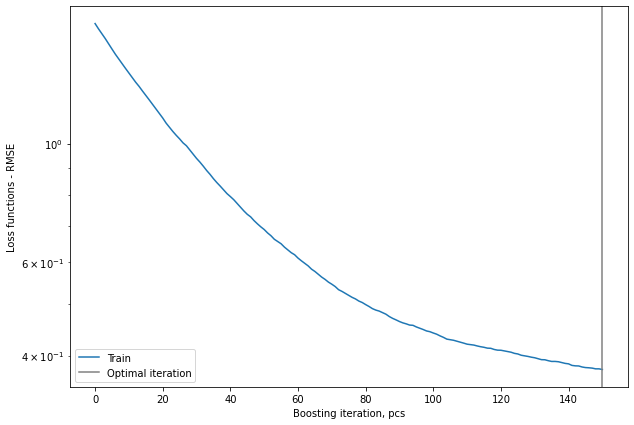

In [29]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [30]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [31]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  -4.61
RMSE: 0.4
Relative RMSE(%):  -0.369
MSE: 0.1
R square: 77.8%


In [32]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: -0.301
a1: 0.661
R^2: 0.809
Uncertainty
a0: -0.30+/-0.04
a1: 0.661+/-0.032


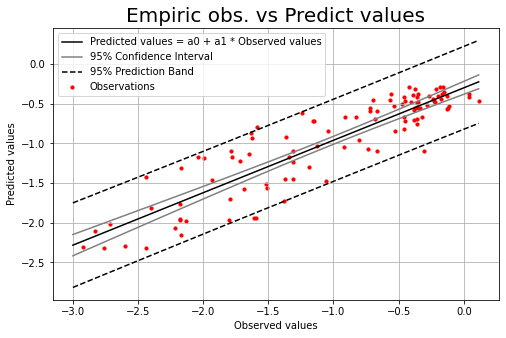

In [34]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-3, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

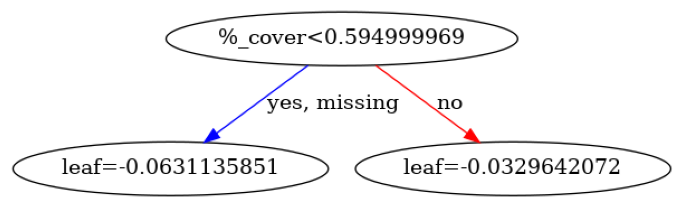

In [36]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

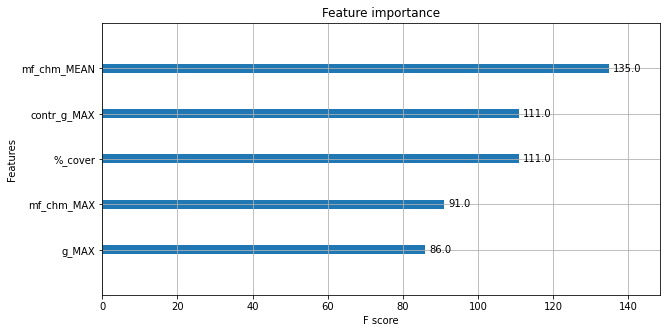

In [38]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

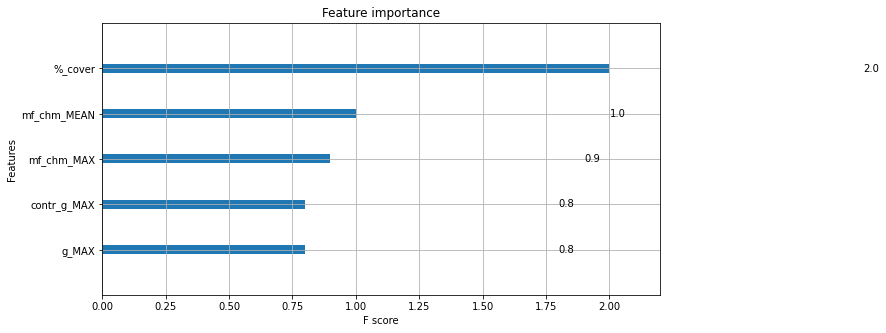

In [39]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

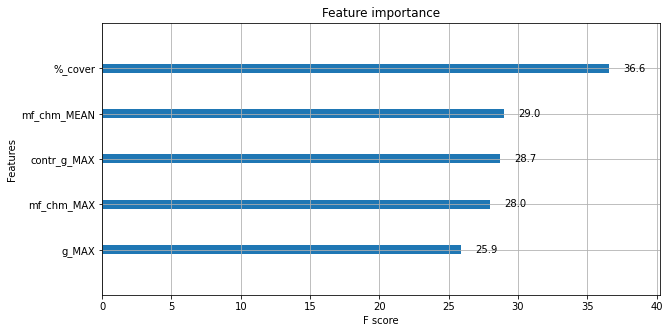

In [40]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [41]:
# Load SHAP`s library
import shap

In [42]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


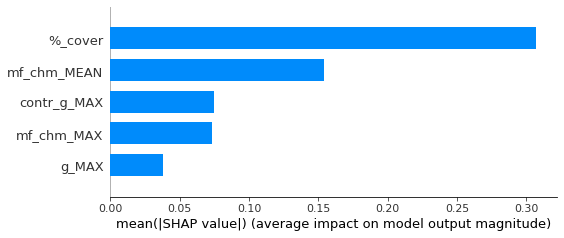

In [43]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

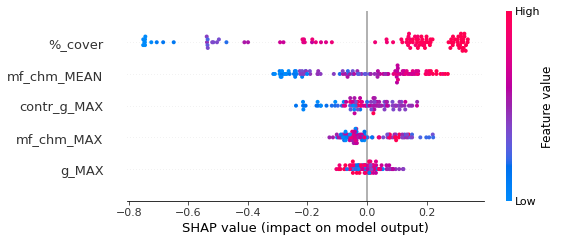

In [44]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

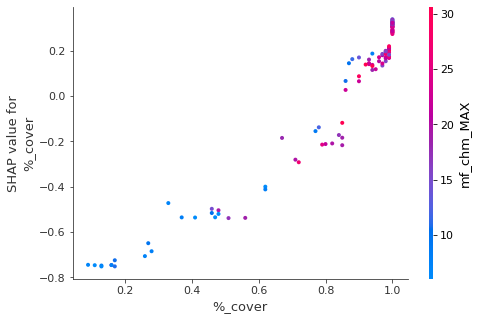

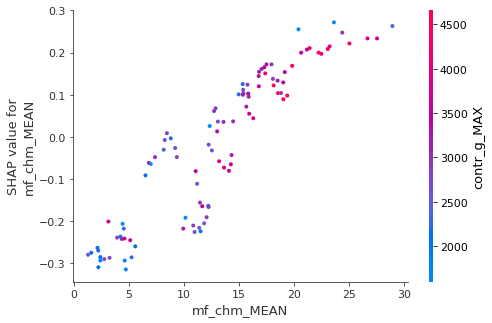

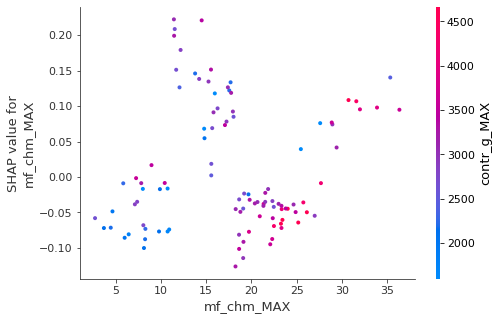

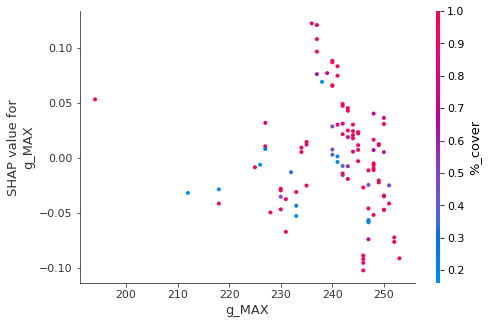

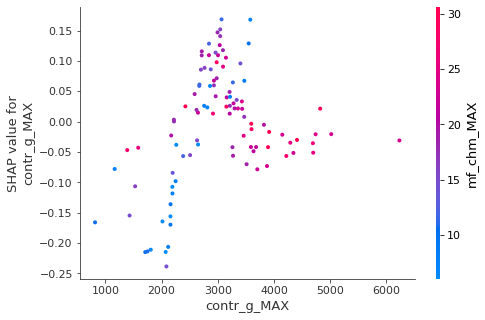

In [45]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [46]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_Mfoliage_XGB_model_with_texture.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_Mfoliage_XGB_model_with_texture.txt")